In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Cases in U.S.

### Extract Files 

In [2]:
confirmed = pd.read_csv('files/time_series_covid19_confirmed_US.csv')
death = pd.read_csv('files/time_series_covid19_deaths_US.csv')

In [3]:
confirmed

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3335  84056039   US  USA    840  56039.0       Teton        Wyoming   
3336  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3337  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3338  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3339  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 8/3/20  8/4/20  8/5/20  \
0                US  32.539527  -86.644082  ...   1024    1030    1030   
1                US  30.727750  -87.722071  ...   3210    3263    3322   
2                US  31.868263  -85.387129  ...    563     563     564   
3                US  32.996421  -87.125115  ...    374     381     384   
4                US  33.982109  -86.567906  ...    736     741     745   
...             ...        ...         ...  ...    ...     ...     ...   
3335             US  43.935225 -110.589080  ...    358     362     363   
3336             US  41.287818 -110.547578  ...    265     267     268   
3337             US   0.000000    0.000000  ...      0       0       0   
3338             US  43.904516 -107.680187  ...     49      54      58   
3339             US  43.839612 -104.567488  ...      5       5       5   

      8/6/20  8/7/20  8/8/20  8/9/20  8/10/20  8/11/20  8/12/20  
0       1050    1065    1086    1169     1174     1162     1188  
1       3380    3443    3502    3544     3651     3670     3710  
2        565     569     573     575      576      579      581  
3        413     416     426     438      442      444      453  
4        759     774     788     800      812      816      825  
...      ...     ...     ...     ...      ...      ...      ...  
3335     367     371     370     374      370      372      373  
3336     272     274     274     278      277      279      278  
3337       0       0       0       0        0        0        0  
3338      59      69      70      77       77       79       82  
3339       5       5       5       5        6        5        5  

[3340 rows x 215 columns]

### Data Wrangling

In [4]:
dates = [x for x in list(confirmed.columns) if re.search('/',x)]

In [5]:
confirmed_clean = confirmed.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Cases'})
confirmed_clean['Date'] = pd.to_datetime(confirmed_clean['Date'], errors ='coerce')
confirmed_clean.set_index('Date',inplace = True)
confirmed_clean

County Province_State Country_Region        Lat       Long_  \
Date                                                                          
2020-01-22     Autauga        Alabama             US  32.539527  -86.644082   
2020-01-22     Baldwin        Alabama             US  30.727750  -87.722071   
2020-01-22     Barbour        Alabama             US  31.868263  -85.387129   
2020-01-22        Bibb        Alabama             US  32.996421  -87.125115   
2020-01-22      Blount        Alabama             US  33.982109  -86.567906   
...                ...            ...            ...        ...         ...   
2020-08-12       Teton        Wyoming             US  43.935225 -110.589080   
2020-08-12       Uinta        Wyoming             US  41.287818 -110.547578   
2020-08-12  Unassigned        Wyoming             US   0.000000    0.000000   
2020-08-12    Washakie        Wyoming             US  43.904516 -107.680187   
2020-08-12      Weston        Wyoming             US  43.839612 -104.567488   

                       Combined_Key  Total Cases  
Date                                              
2020-01-22     Autauga, Alabama, US            0  
2020-01-22     Baldwin, Alabama, US            0  
2020-01-22     Barbour, Alabama, US            0  
2020-01-22        Bibb, Alabama, US            0  
2020-01-22      Blount, Alabama, US            0  
...                             ...          ...  
2020-08-12       Teton, Wyoming, US          373  
2020-08-12       Uinta, Wyoming, US          278  
2020-08-12  Unassigned, Wyoming, US            0  
2020-08-12    Washakie, Wyoming, US           82  
2020-08-12      Weston, Wyoming, US            5  

[681360 rows x 7 columns]

In [6]:
death_clean = death.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Death'})
death_clean['Date'] = pd.to_datetime(death_clean['Date'])
death_clean.set_index('Date',inplace = True)
death_clean

County Province_State Country_Region        Lat       Long_  \
Date                                                                          
2020-01-22     Autauga        Alabama             US  32.539527  -86.644082   
2020-01-22     Baldwin        Alabama             US  30.727750  -87.722071   
2020-01-22     Barbour        Alabama             US  31.868263  -85.387129   
2020-01-22        Bibb        Alabama             US  32.996421  -87.125115   
2020-01-22      Blount        Alabama             US  33.982109  -86.567906   
...                ...            ...            ...        ...         ...   
2020-08-12       Teton        Wyoming             US  43.935225 -110.589080   
2020-08-12       Uinta        Wyoming             US  41.287818 -110.547578   
2020-08-12  Unassigned        Wyoming             US   0.000000    0.000000   
2020-08-12    Washakie        Wyoming             US  43.904516 -107.680187   
2020-08-12      Weston        Wyoming             US  43.839612 -104.567488   

                       Combined_Key  Total Death  
Date                                              
2020-01-22     Autauga, Alabama, US            0  
2020-01-22     Baldwin, Alabama, US            0  
2020-01-22     Barbour, Alabama, US            0  
2020-01-22        Bibb, Alabama, US            0  
2020-01-22      Blount, Alabama, US            0  
...                             ...          ...  
2020-08-12       Teton, Wyoming, US            0  
2020-08-12       Uinta, Wyoming, US            0  
2020-08-12  Unassigned, Wyoming, US           28  
2020-08-12    Washakie, Wyoming, US            0  
2020-08-12      Weston, Wyoming, US            0  

[681360 rows x 7 columns]

In [7]:
states = list(confirmed_clean['Province_State'].unique())

In [8]:
data = {}

for state in states:
    
    ### New cases
    state_new = confirmed_clean.loc[confirmed_clean['Province_State'] == state]
    state_new_agg = state_new.groupby('Date')[['Total Cases']].sum().reset_index()
    state_new_agg['New Cases'] = [state_new_agg['Total Cases'][0]] + \
                 [y-x if y>x else 0 for x,y in zip(state_new_agg['Total Cases'][:-1],state_new_agg['Total Cases'][1:])]
    state_new_agg.set_index('Date',inplace = True)
    
    ### Death
    state_death = death_clean.loc[death_clean['Province_State']== state]
    state_death_agg = state_death.groupby('Date')[['Total Death']].sum().reset_index()
    state_death_agg['New Death'] =[state_death_agg['Total Death'][0]]+ \
                   [y-x if y>x else 0 for x,y in zip(state_death_agg['Total Death'][:-1],state_death_agg['Total Death'][1:])]
    state_death_agg.set_index('Date',inplace = True)
    
    data['%s' % state] = state_new_agg.merge(state_death_agg, left_index = True, right_index = True)
    data['%s' % state]['Fatality'] = (data['%s' % state]['Total Death']/data['%s' % state]['Total Cases']*100).fillna(0)
    data['%s' % state]['State'] = state
    data['%s' % state].reset_index(inplace = True)

### Trends of Daily New Cases and Death for Each State

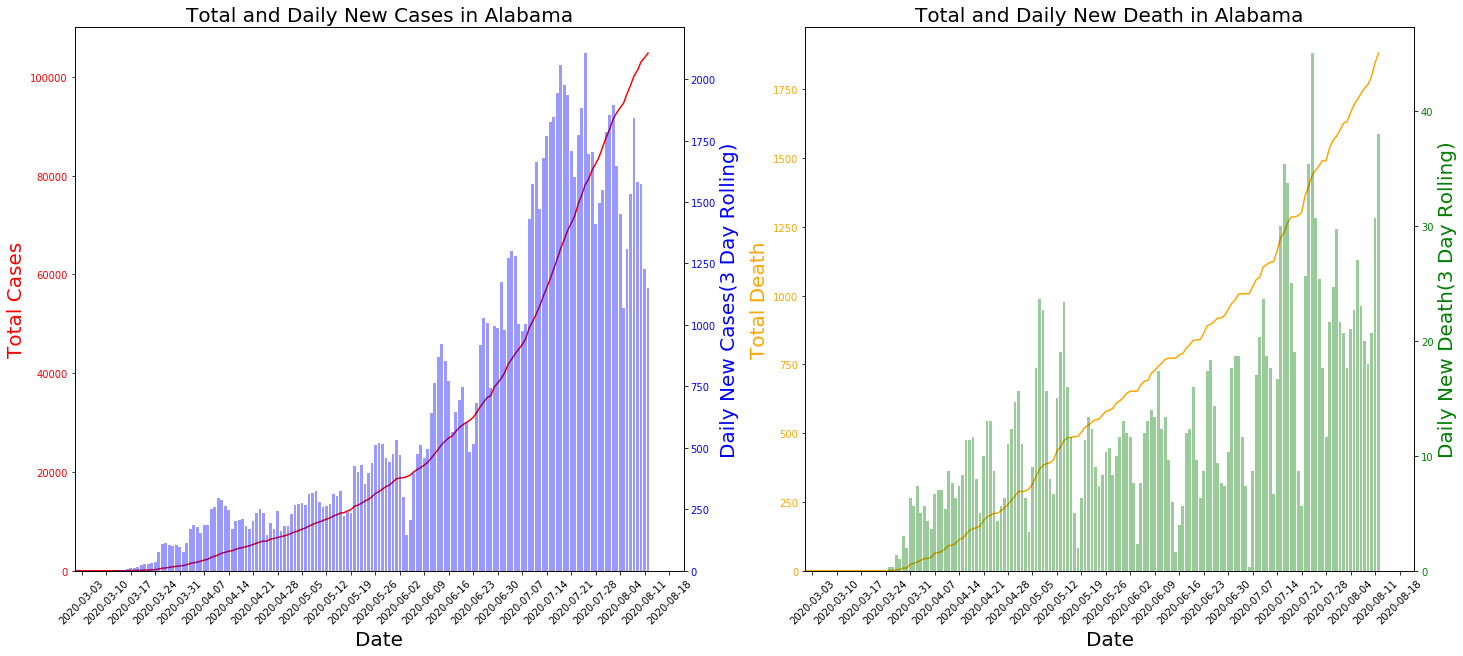

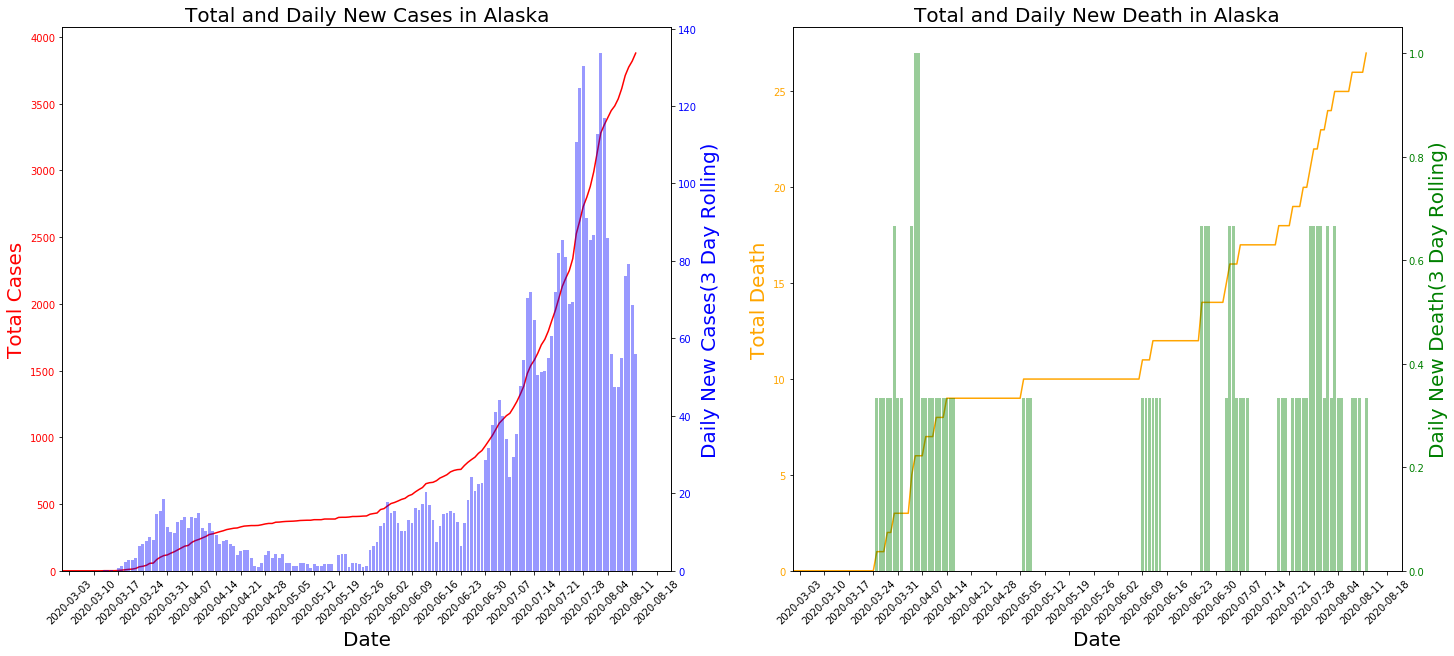

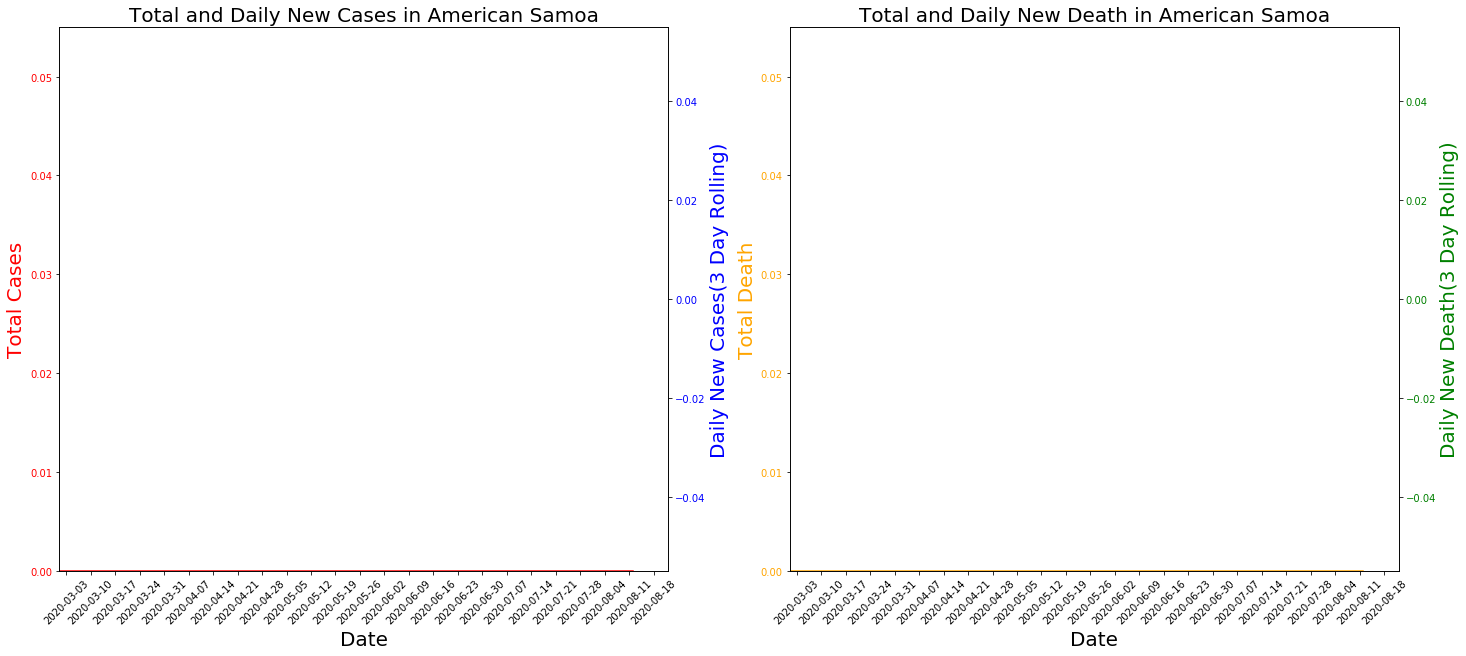

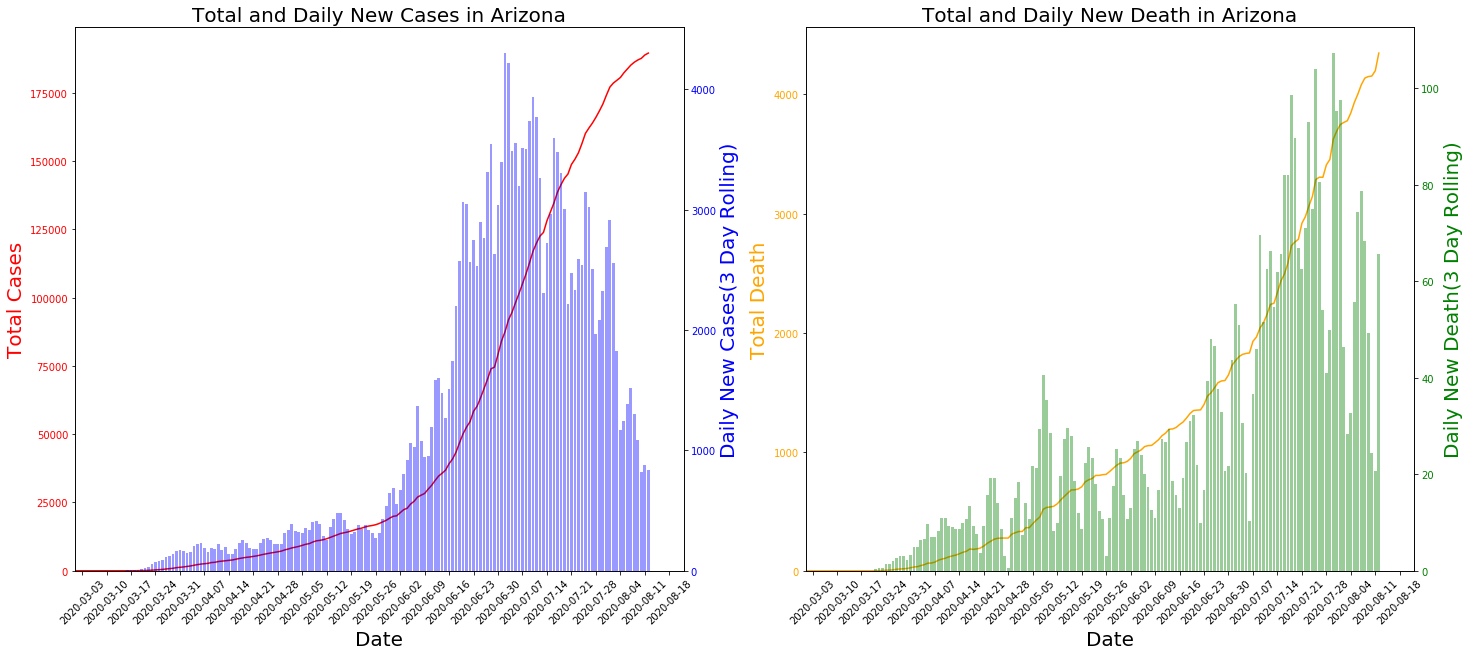

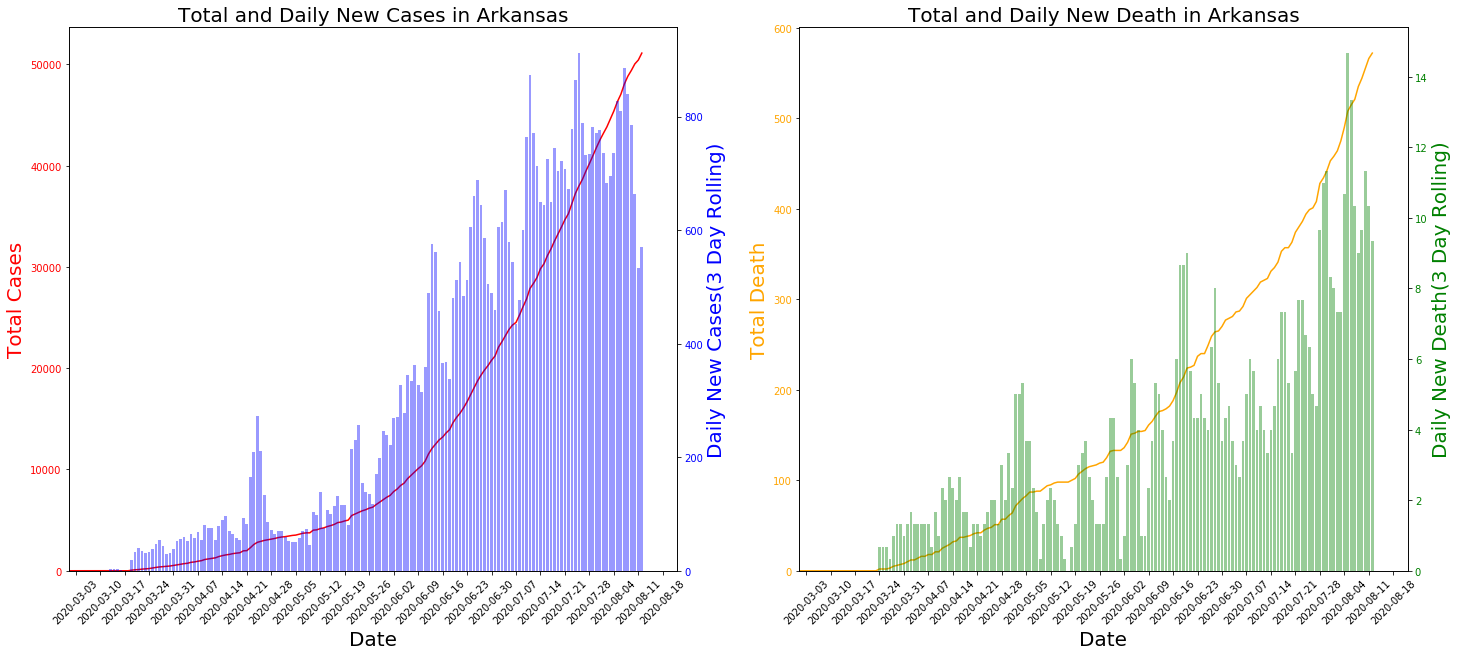

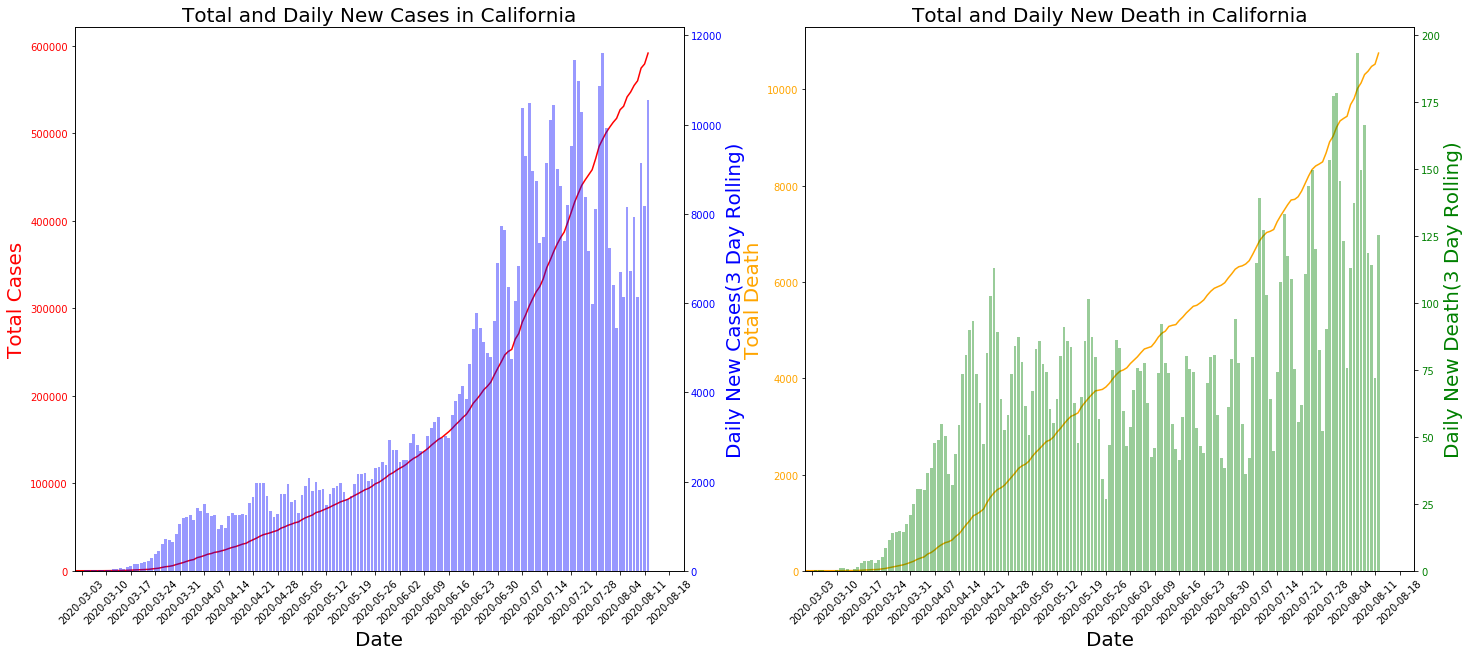

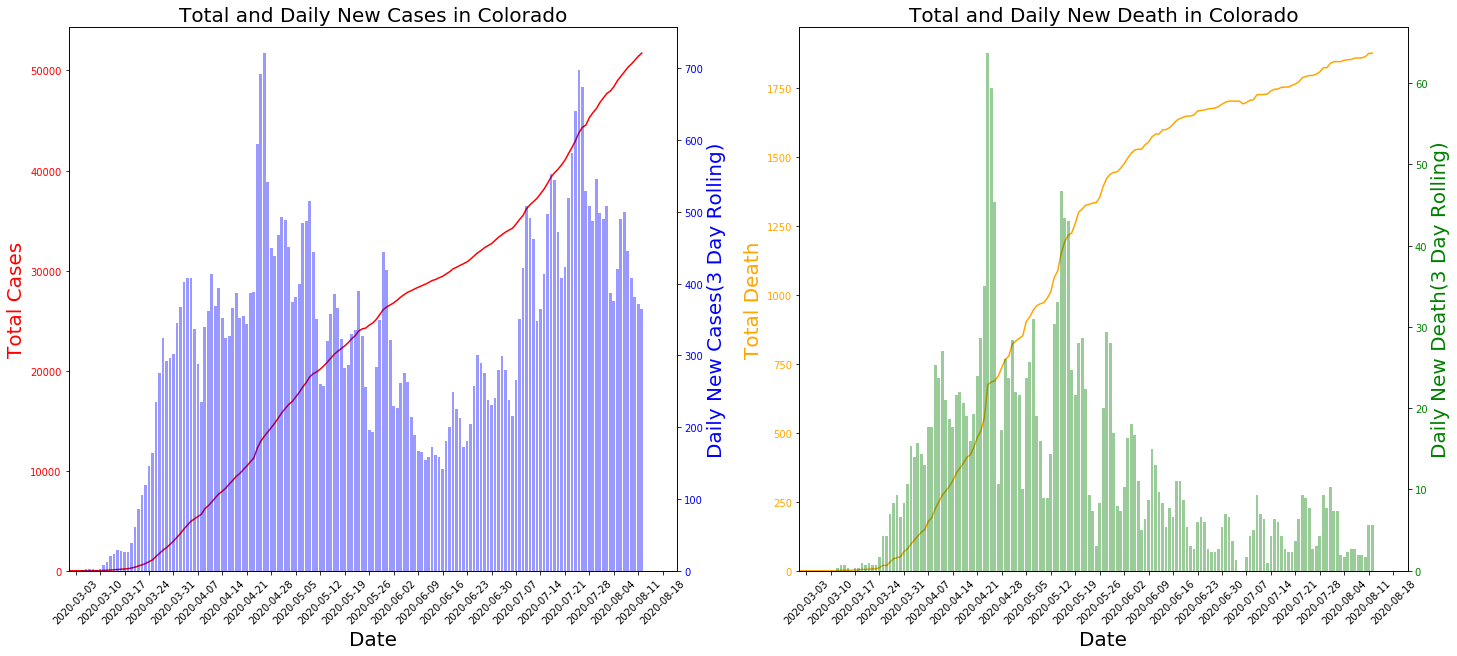

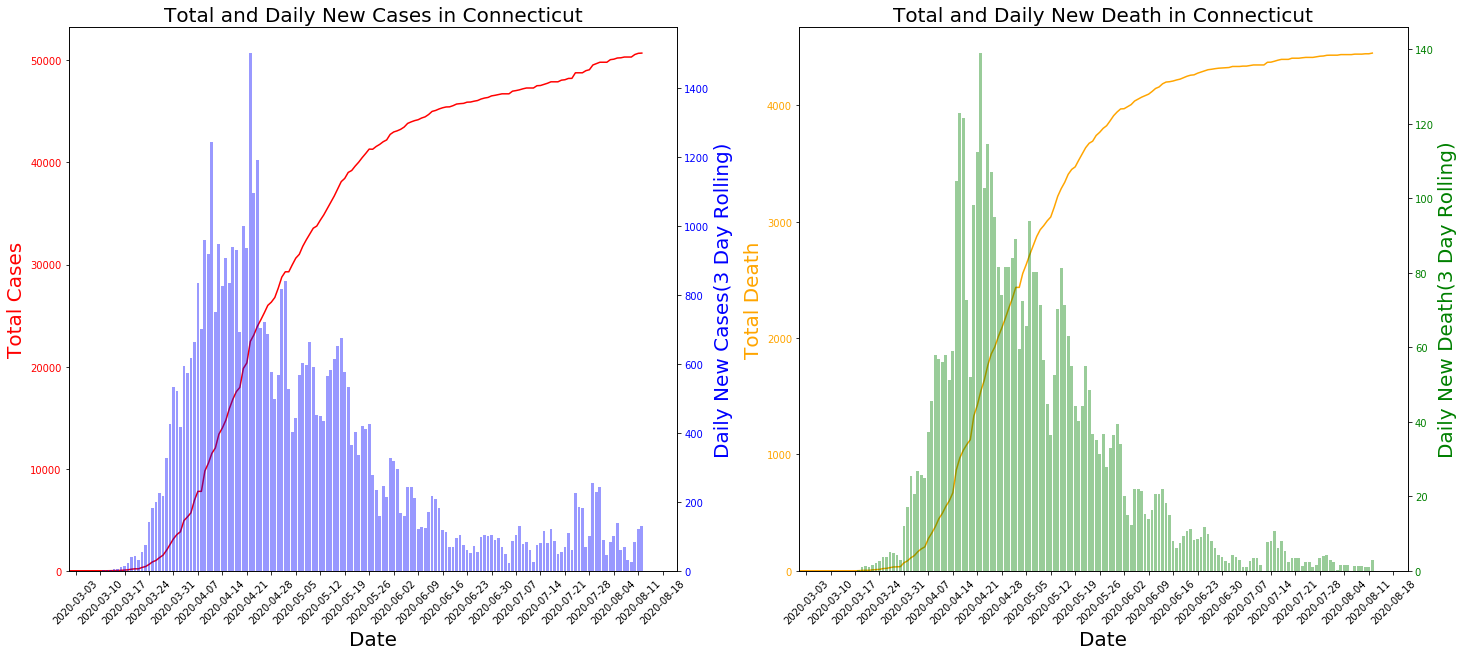

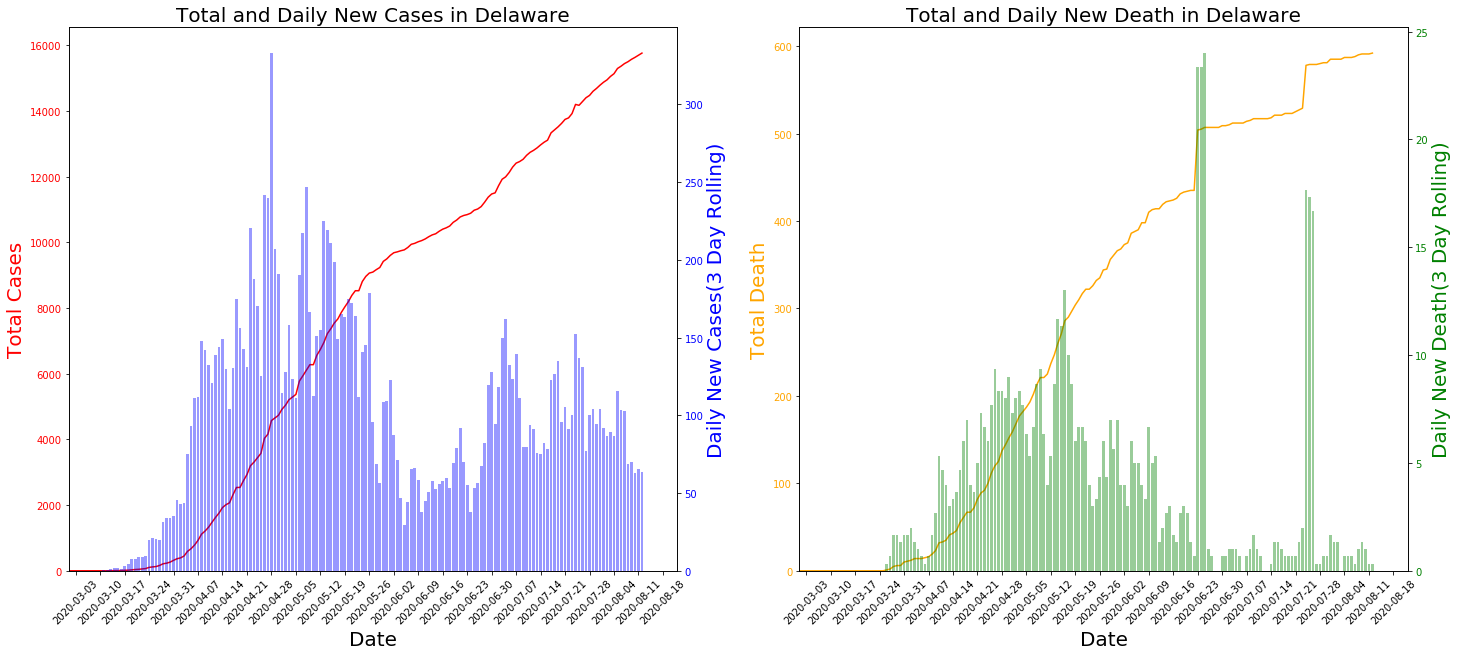

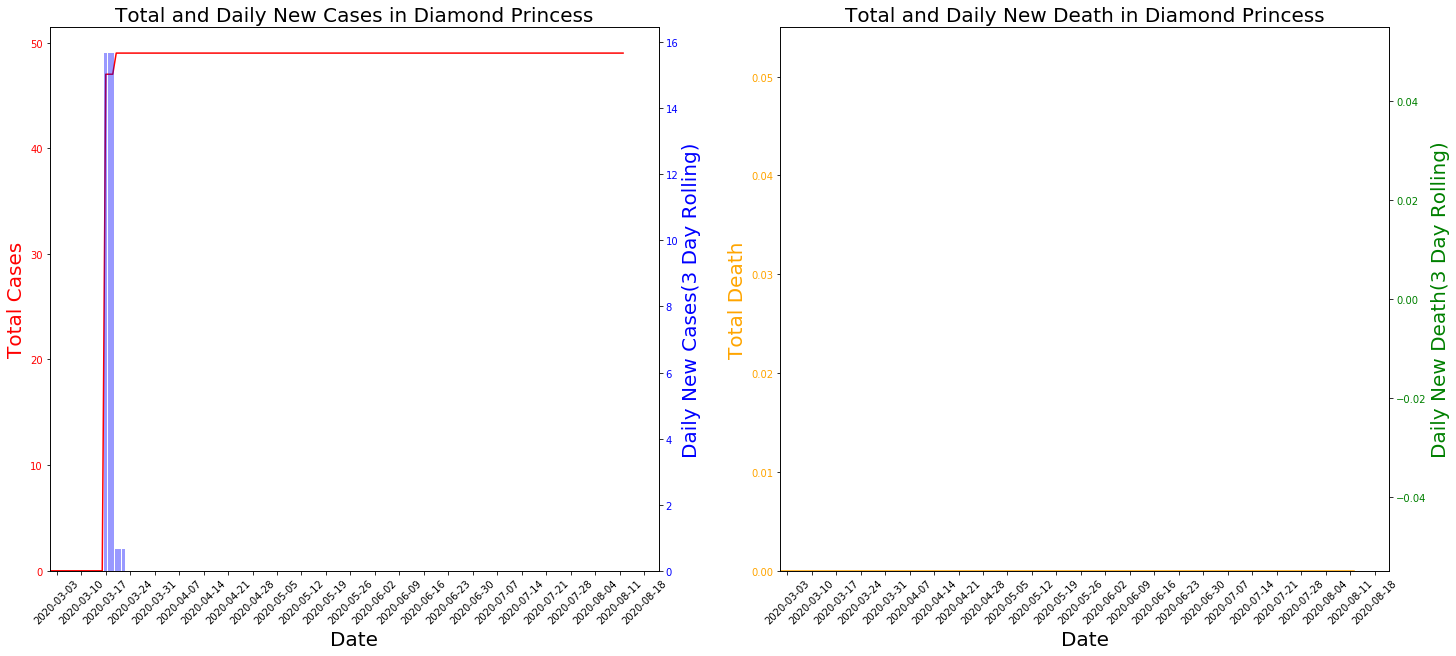

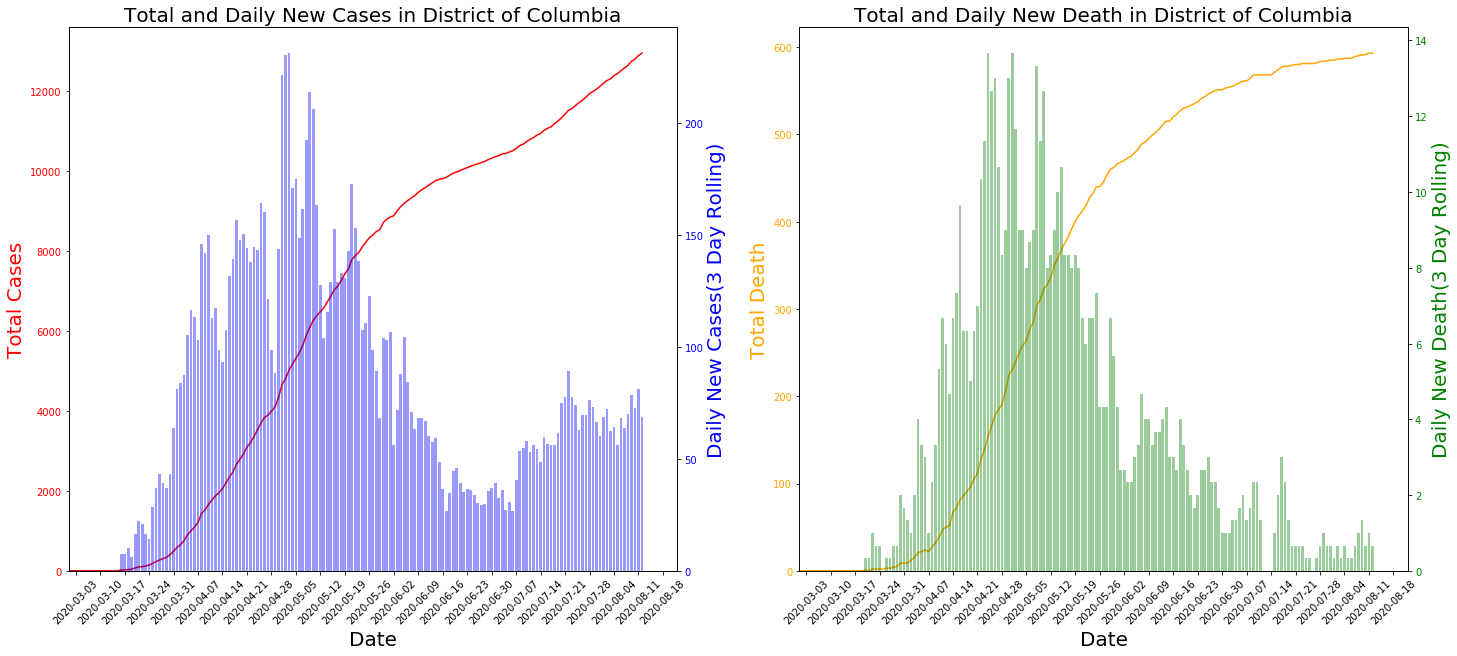

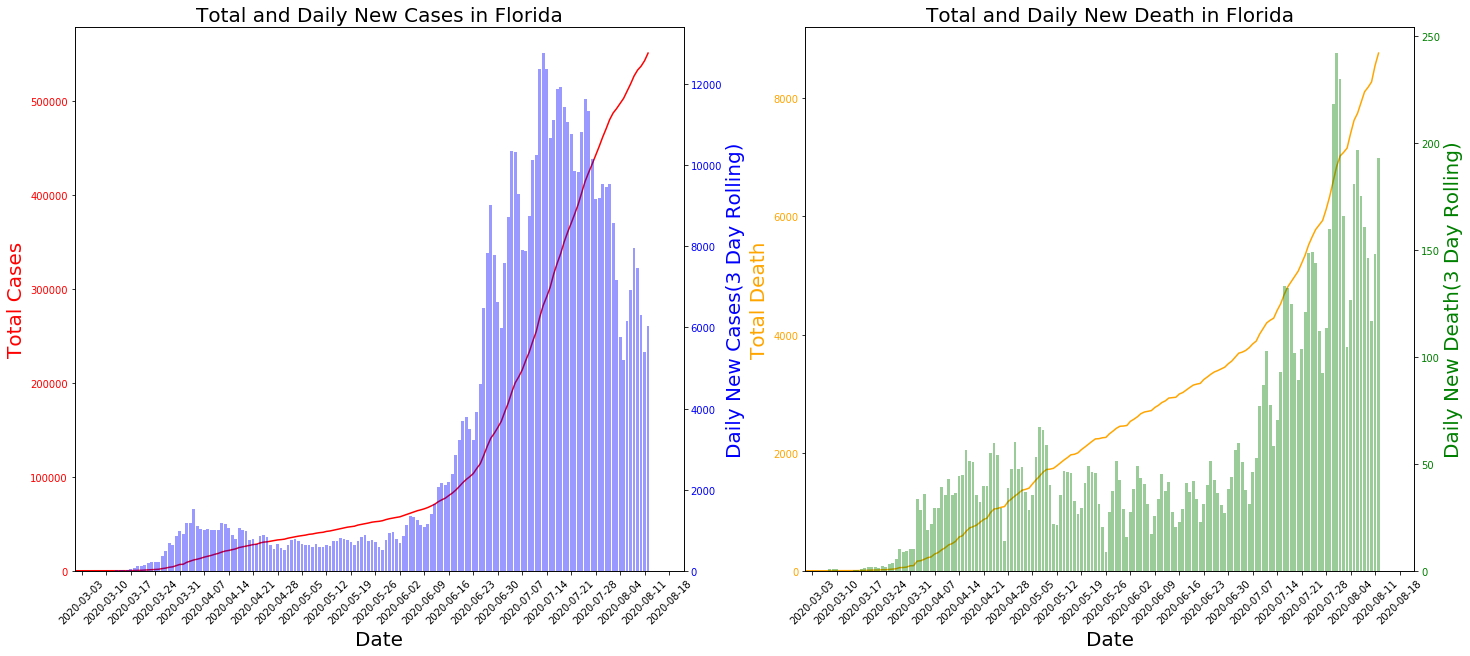

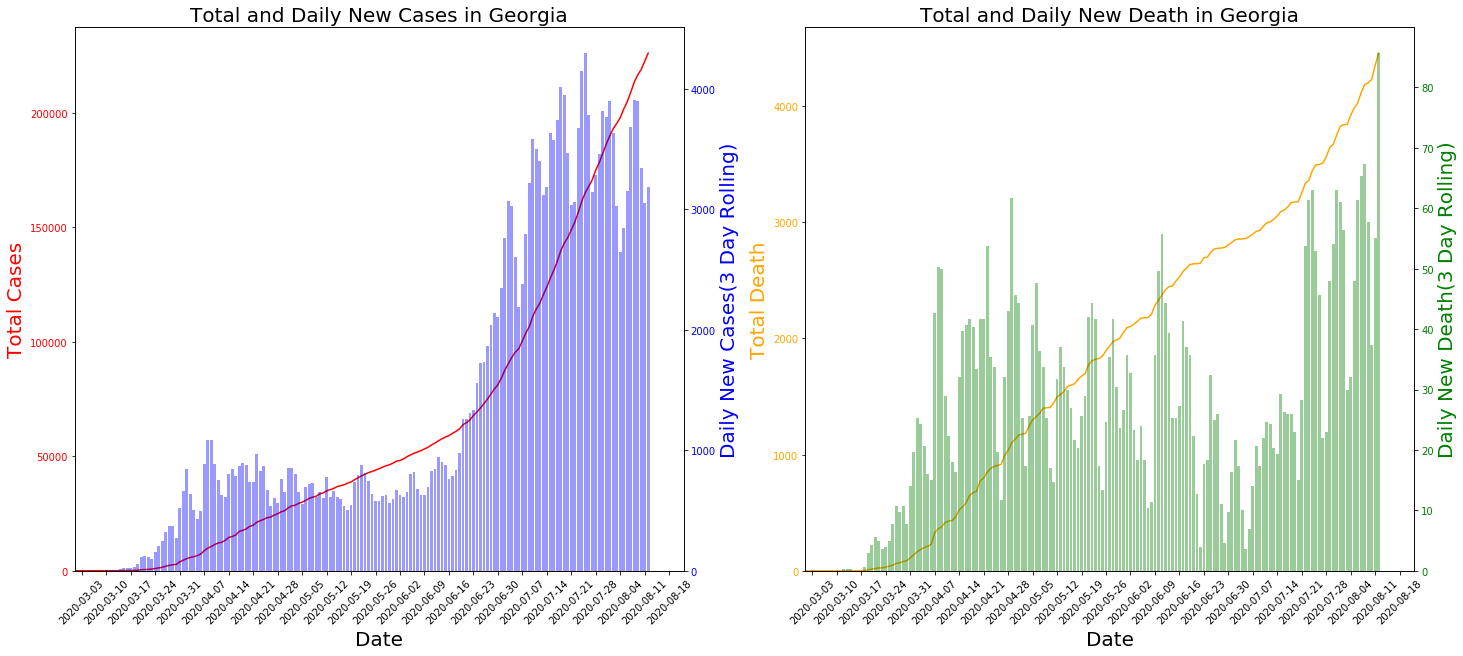

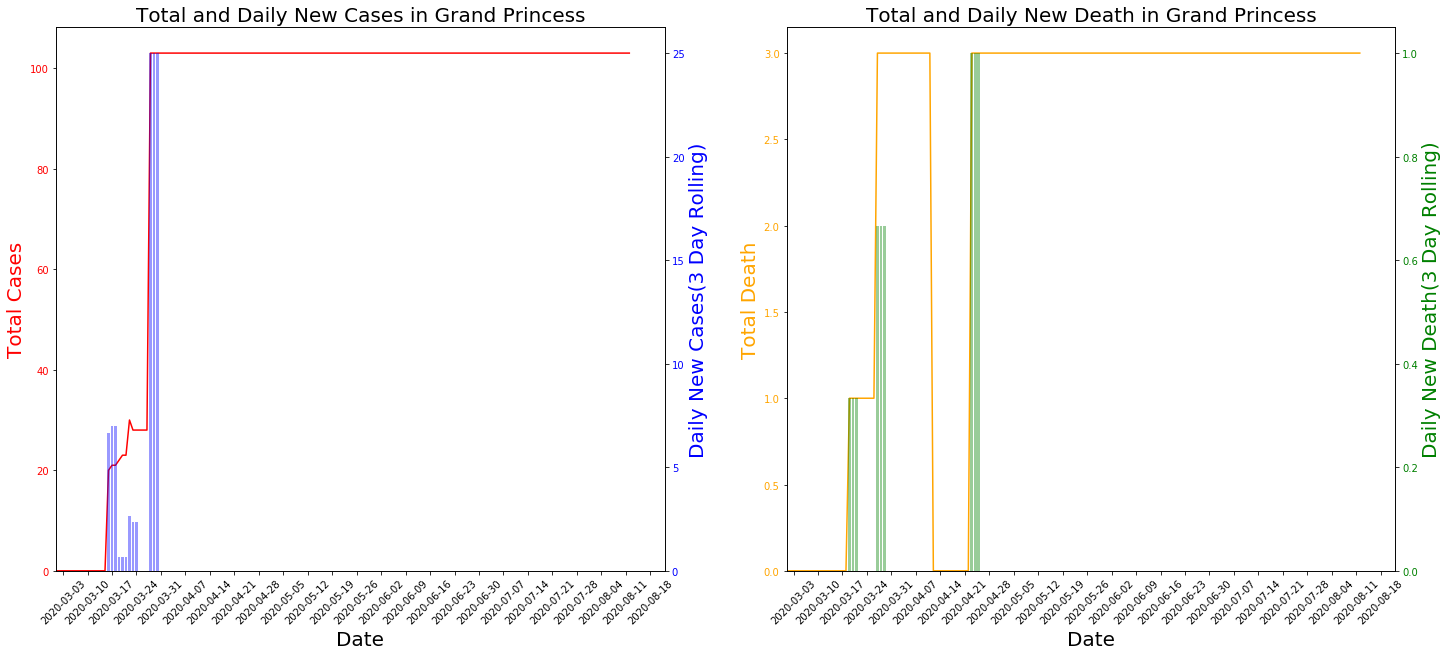

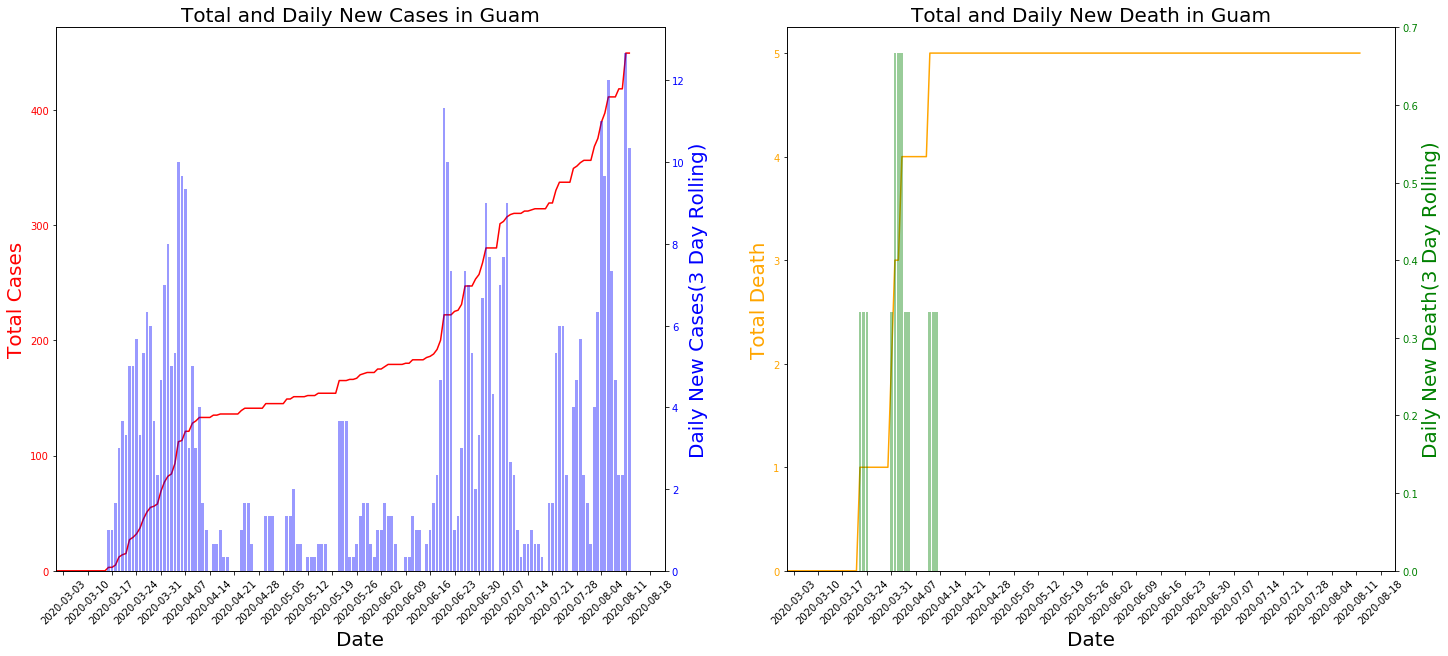

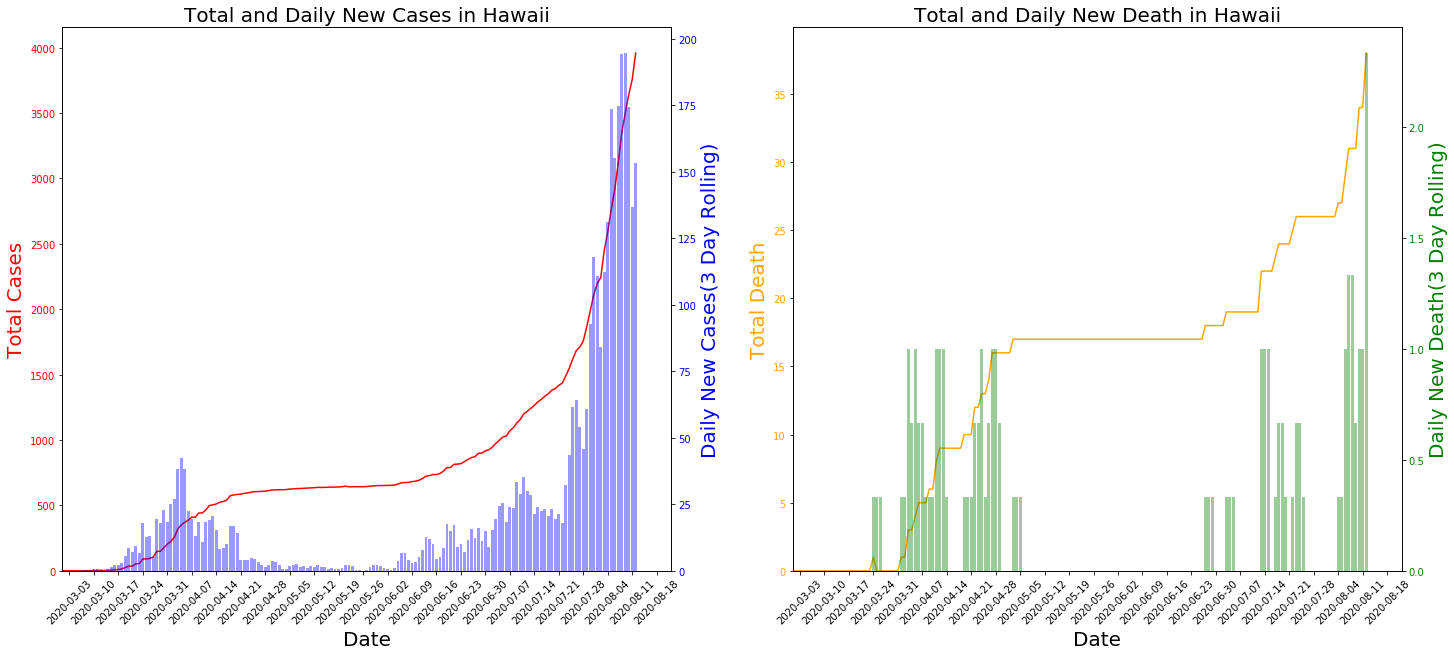

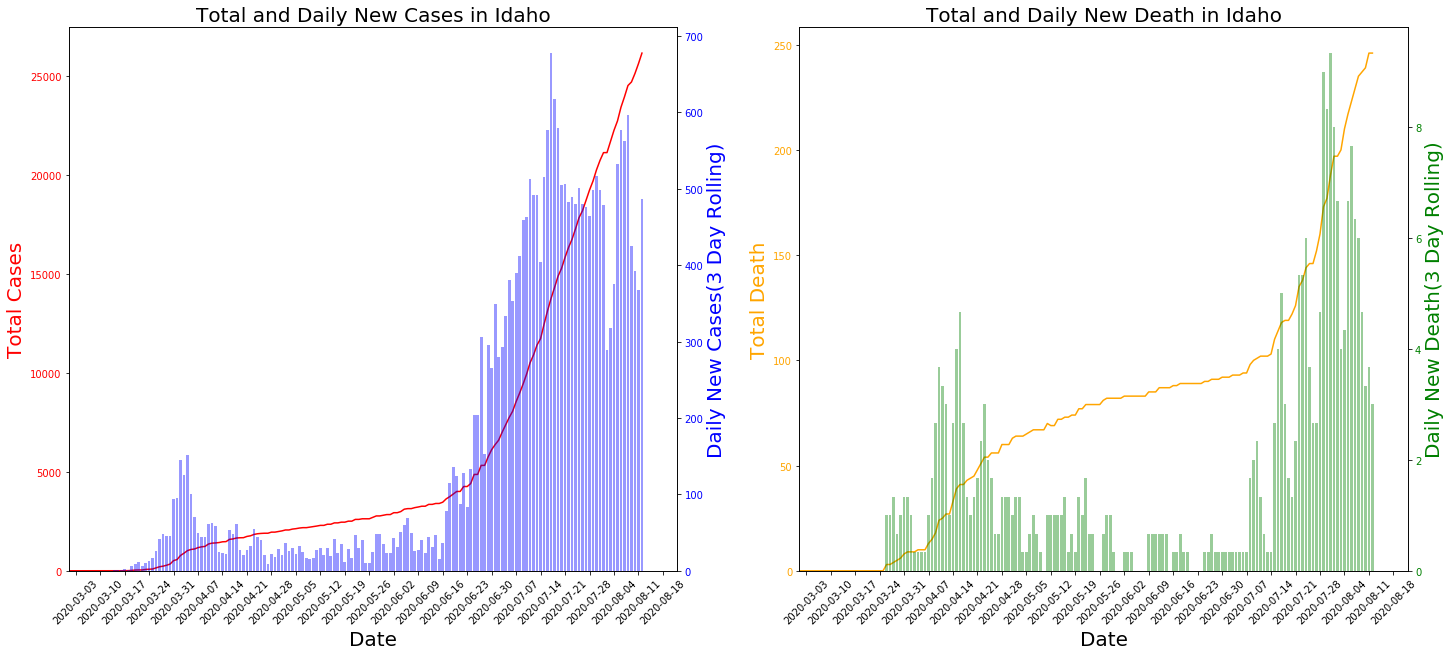

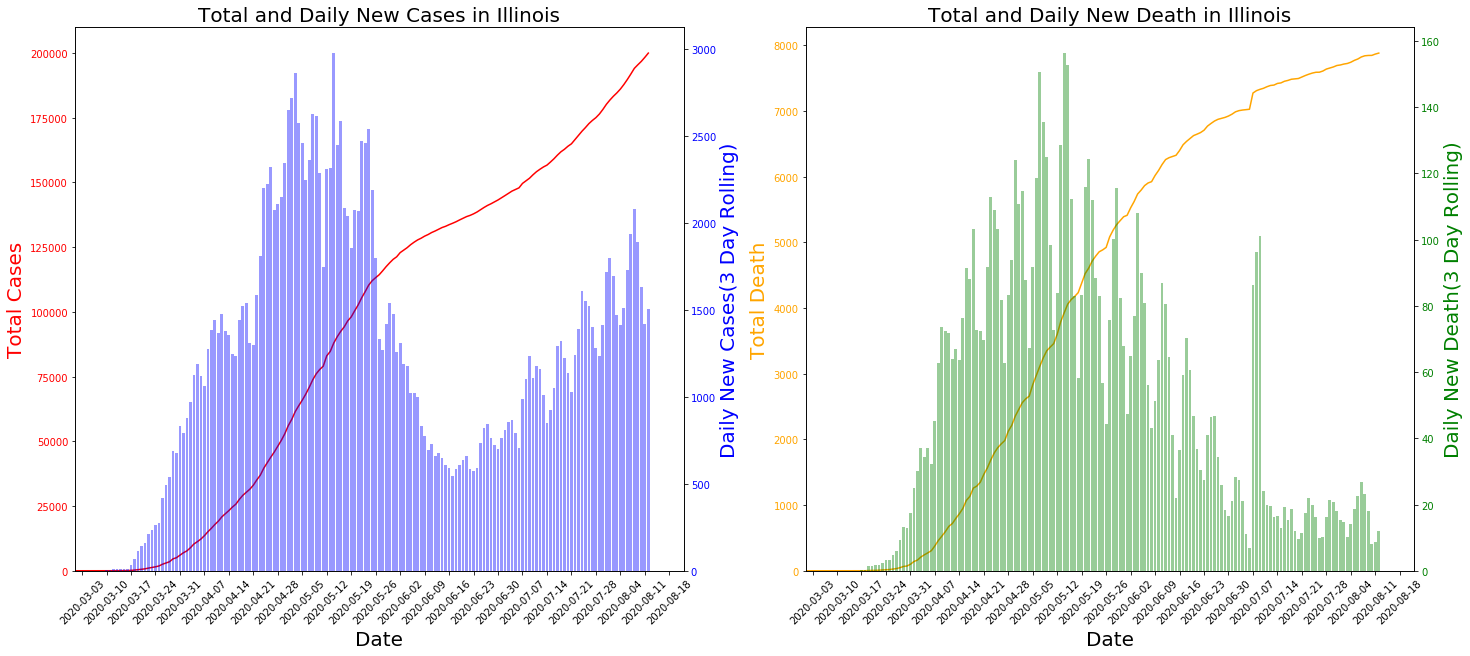

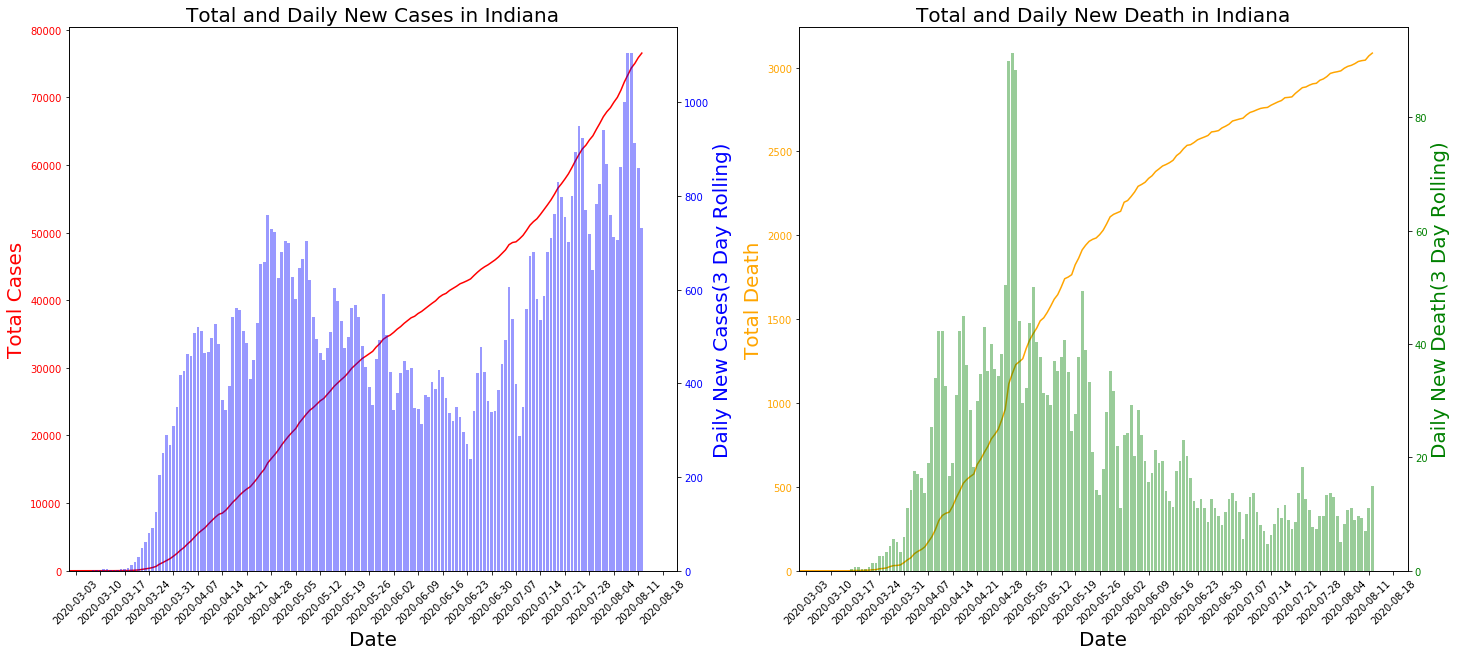

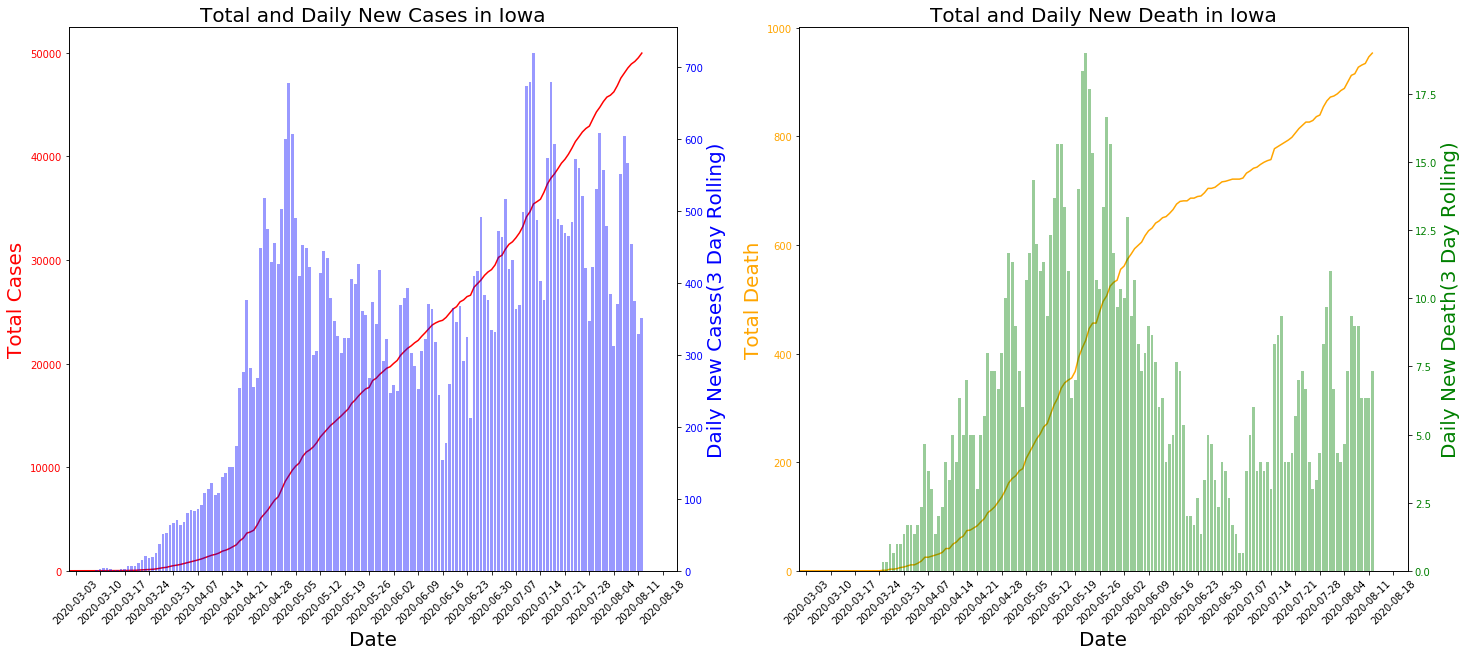

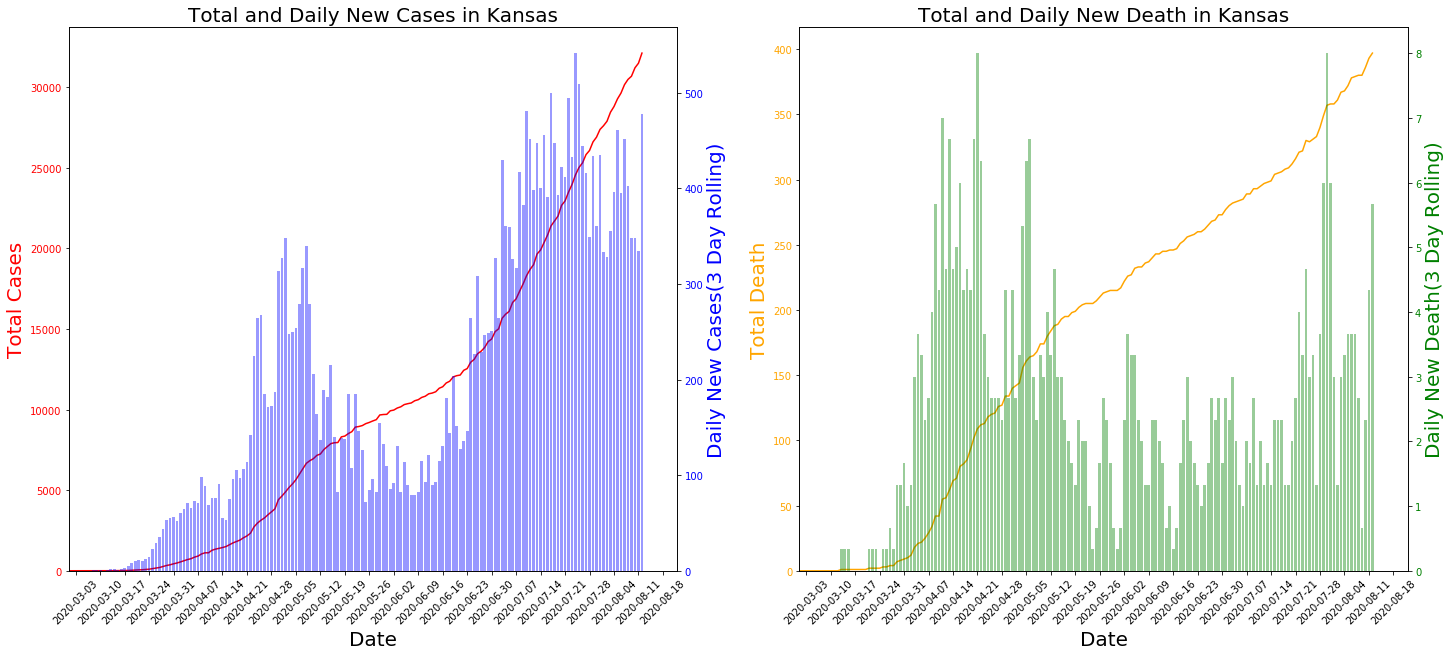

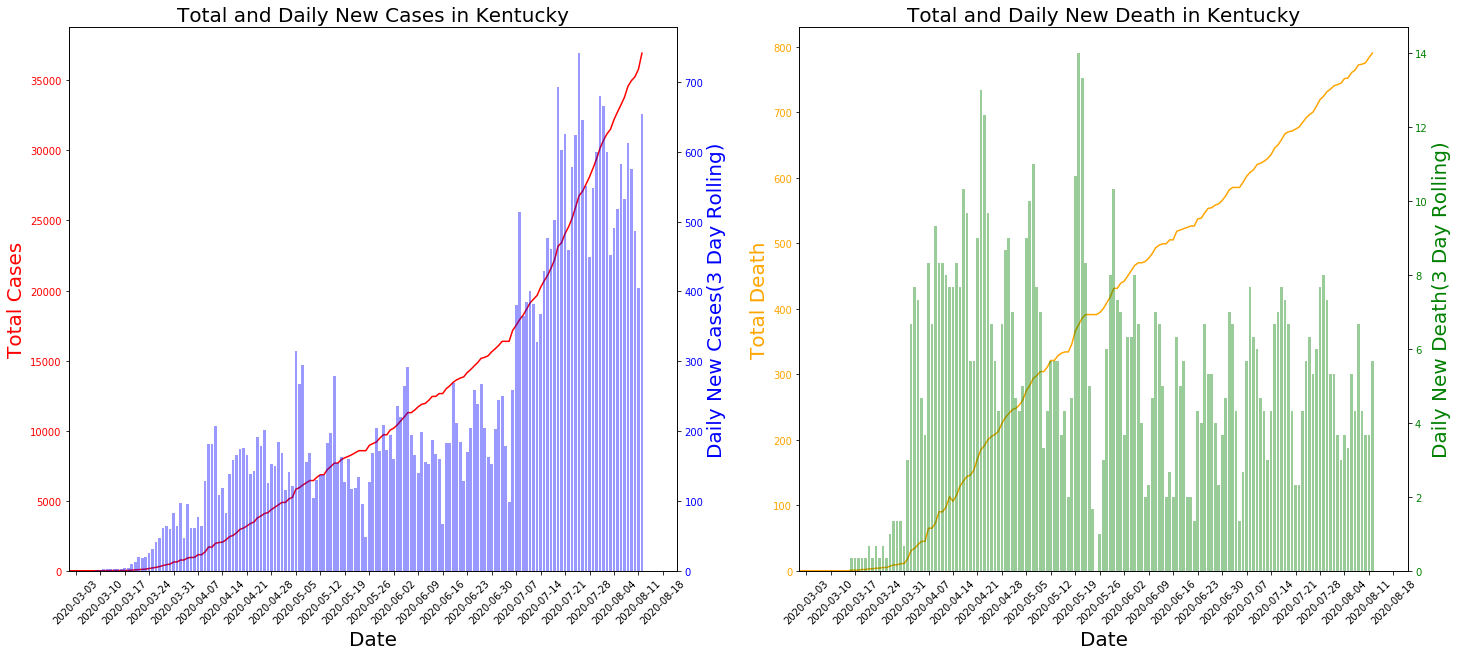

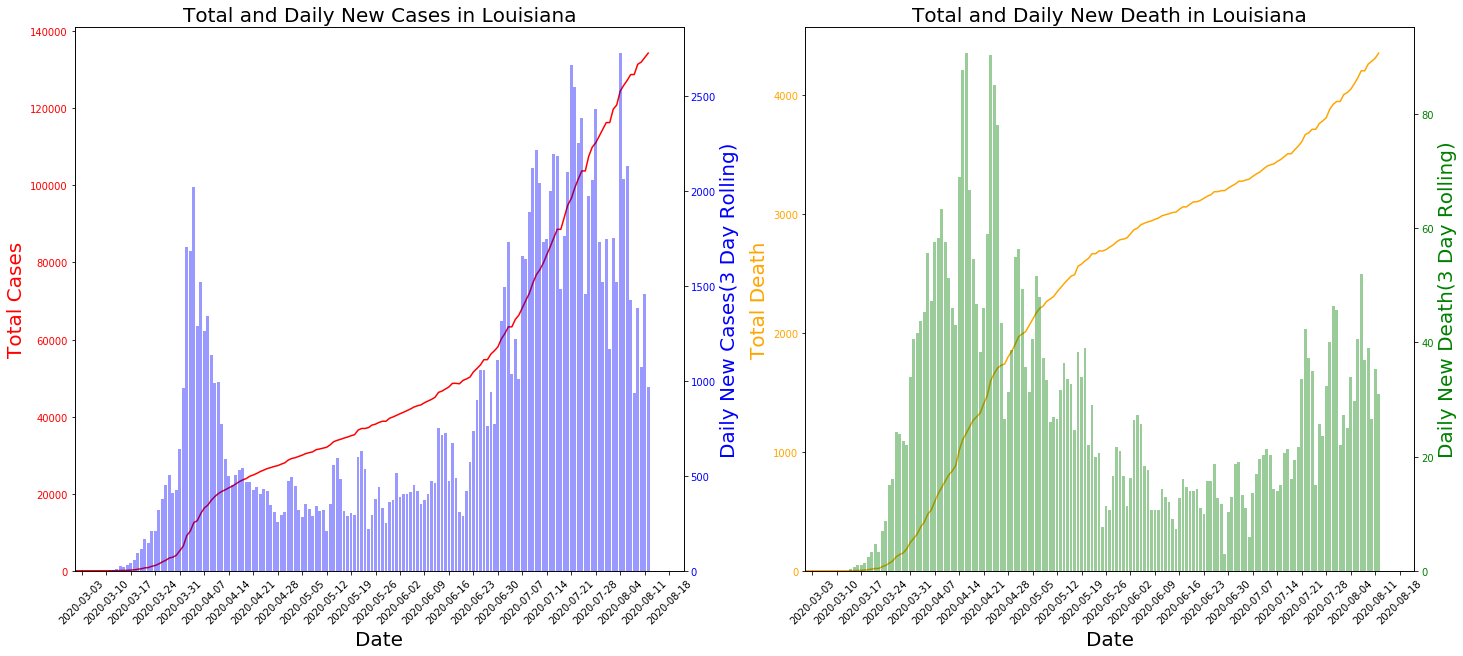

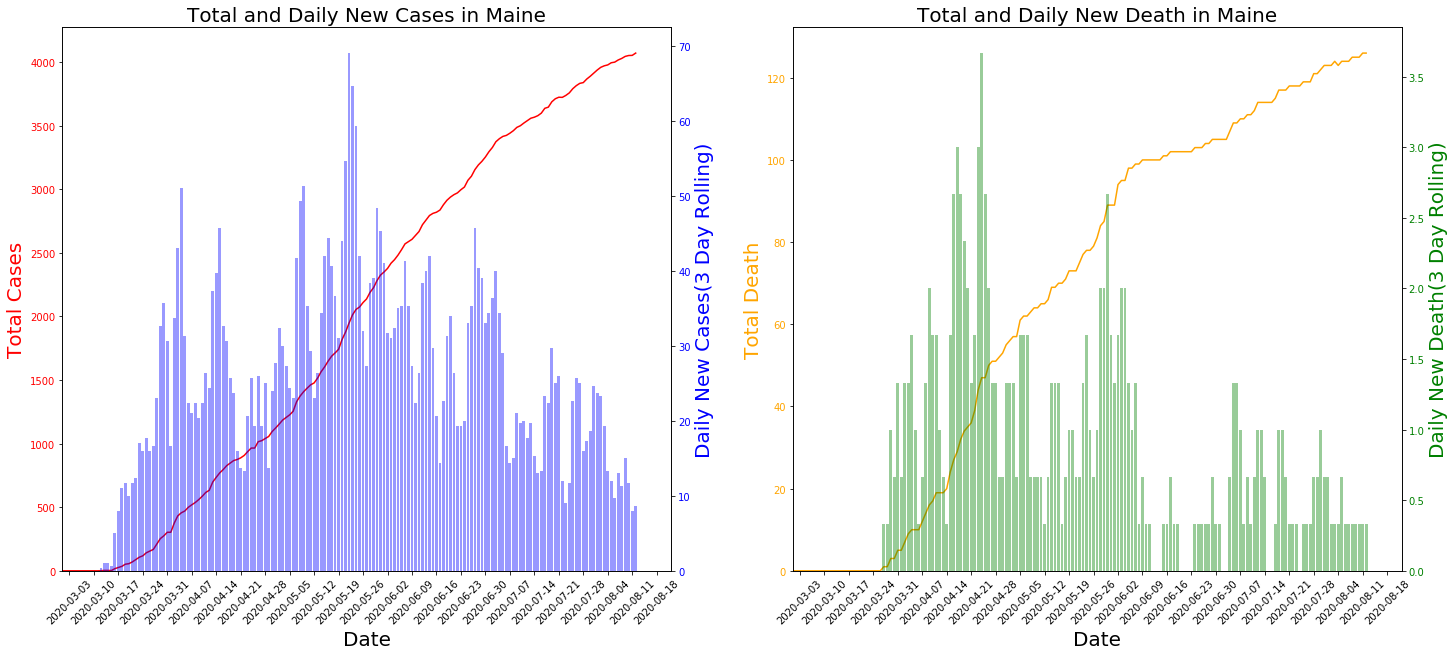

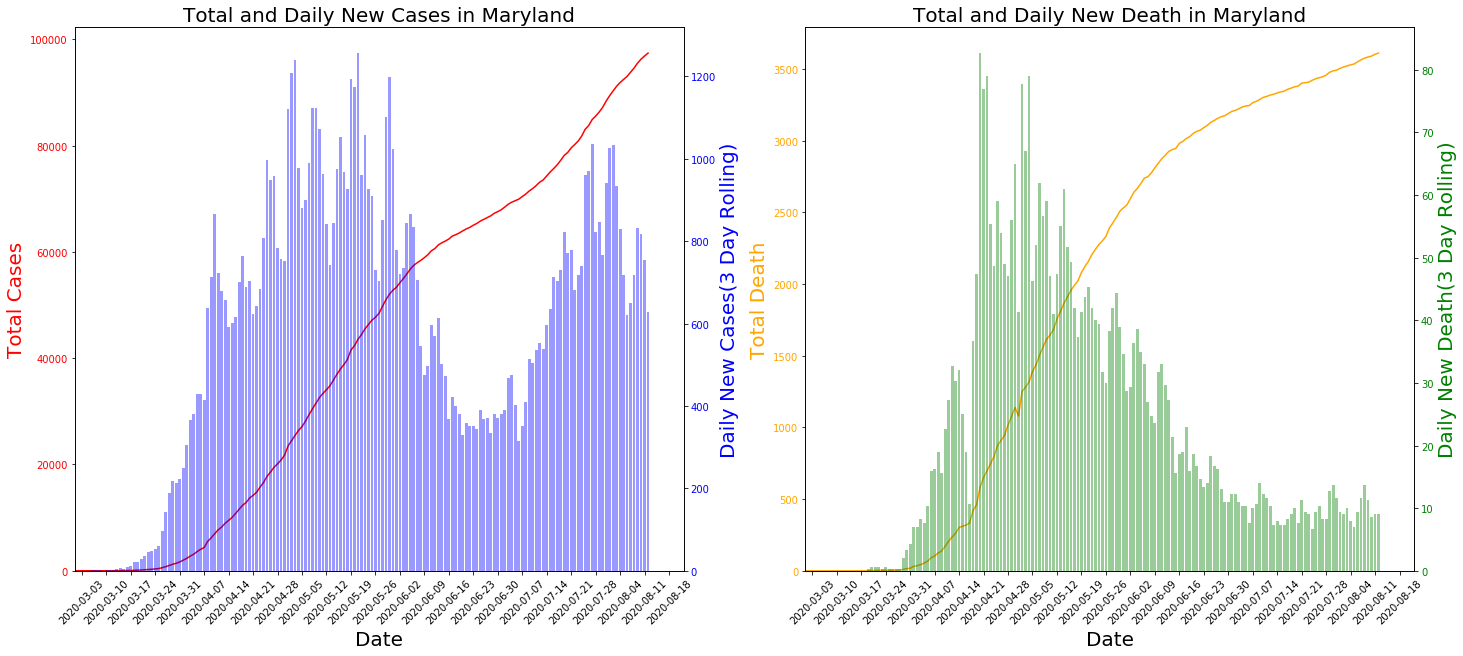

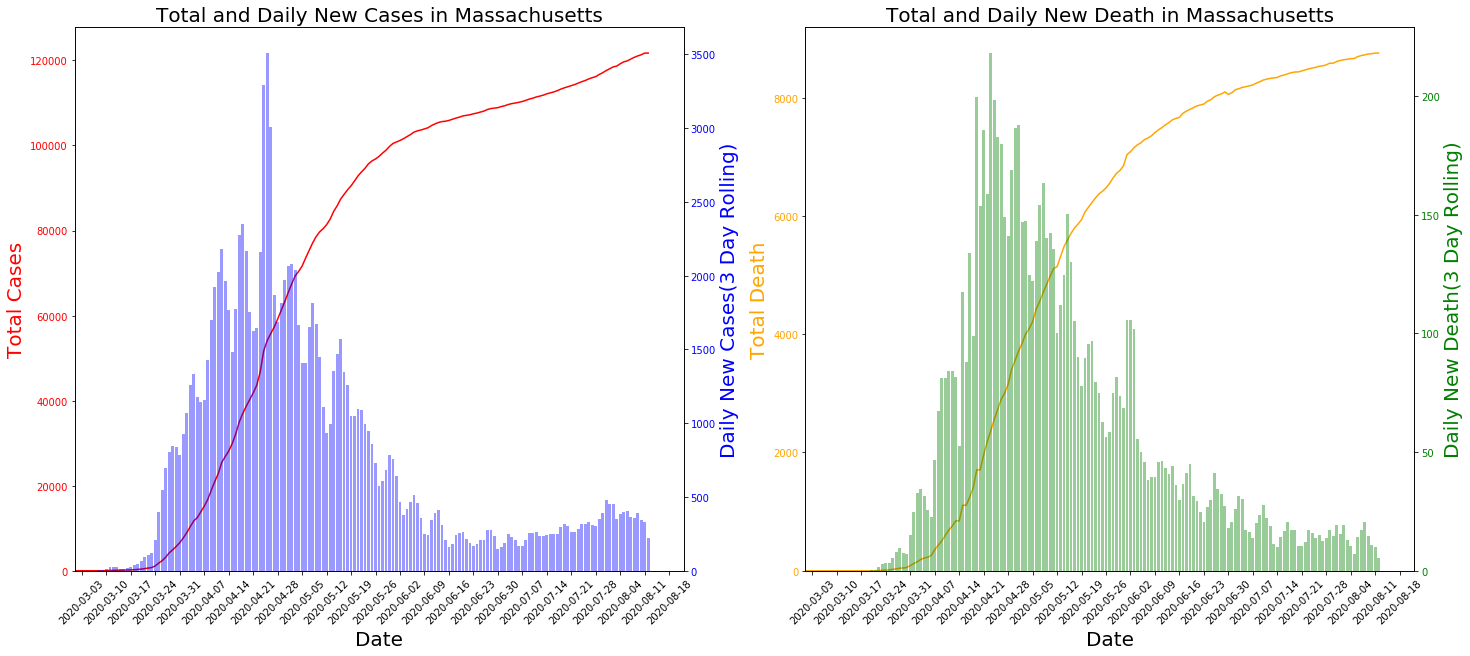

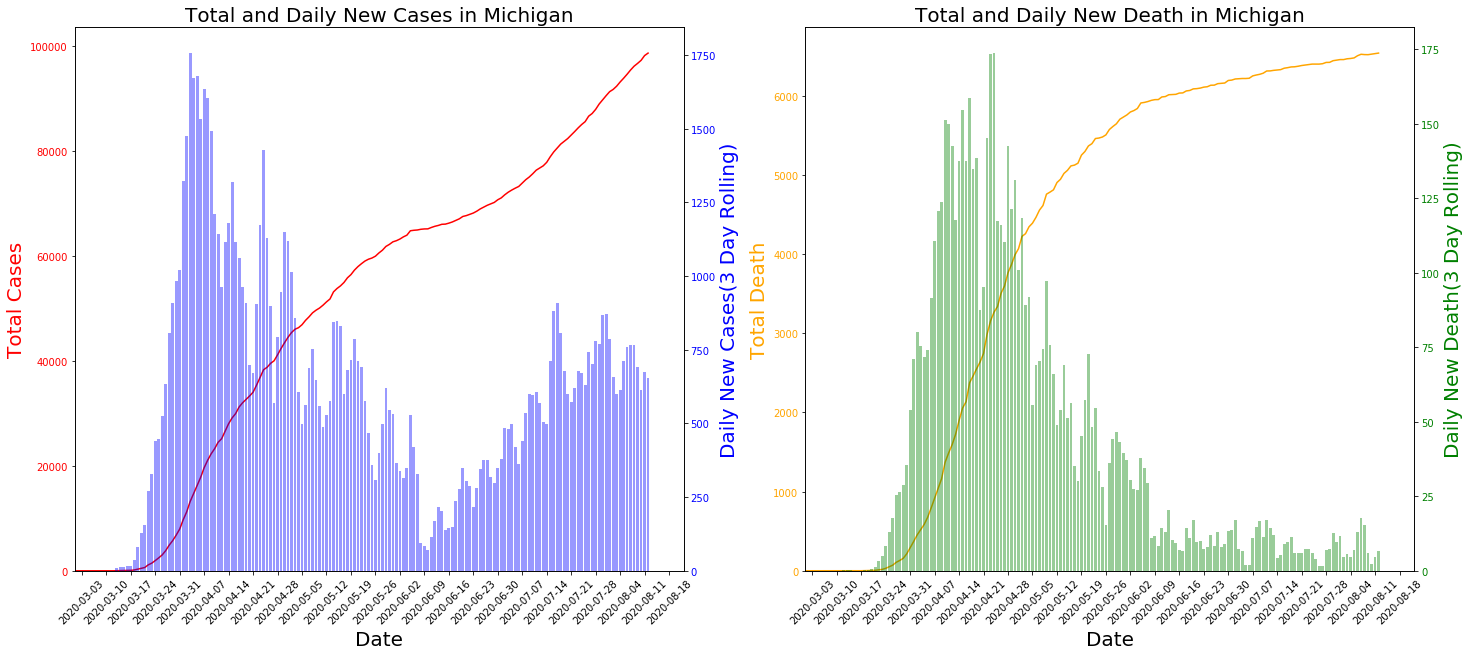

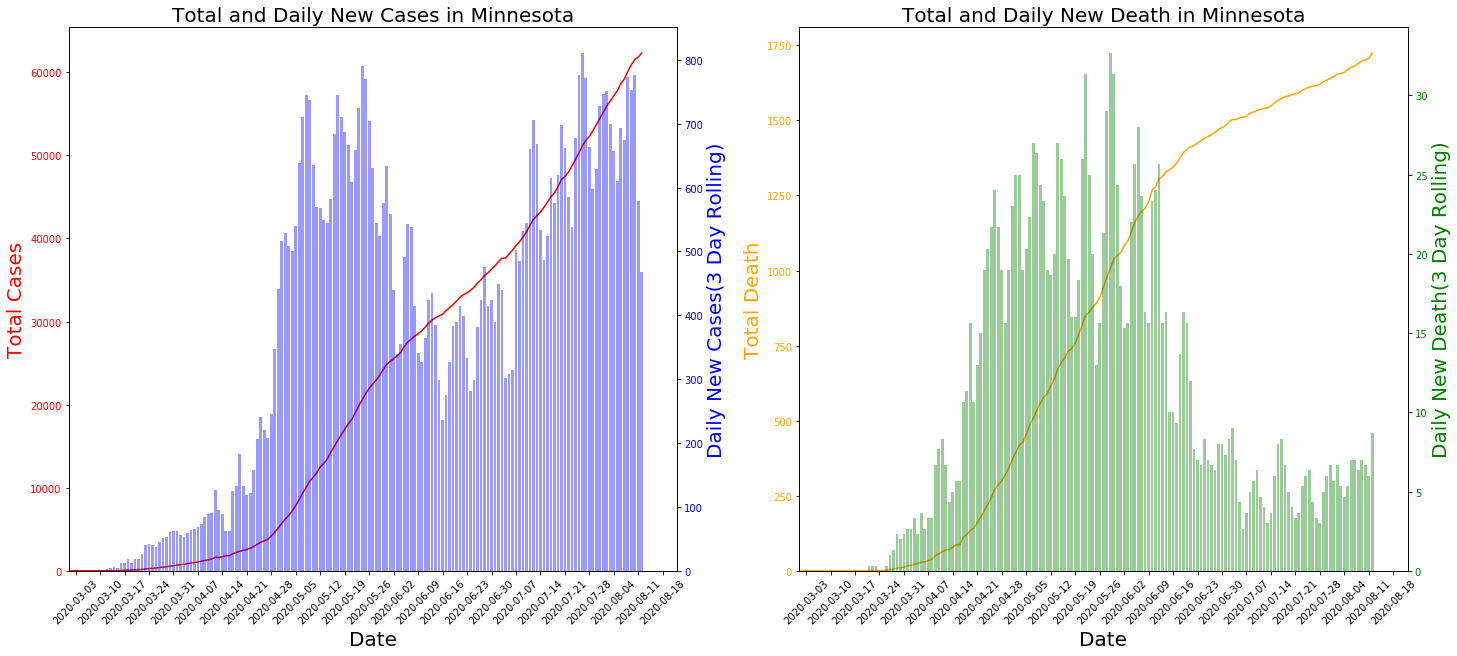

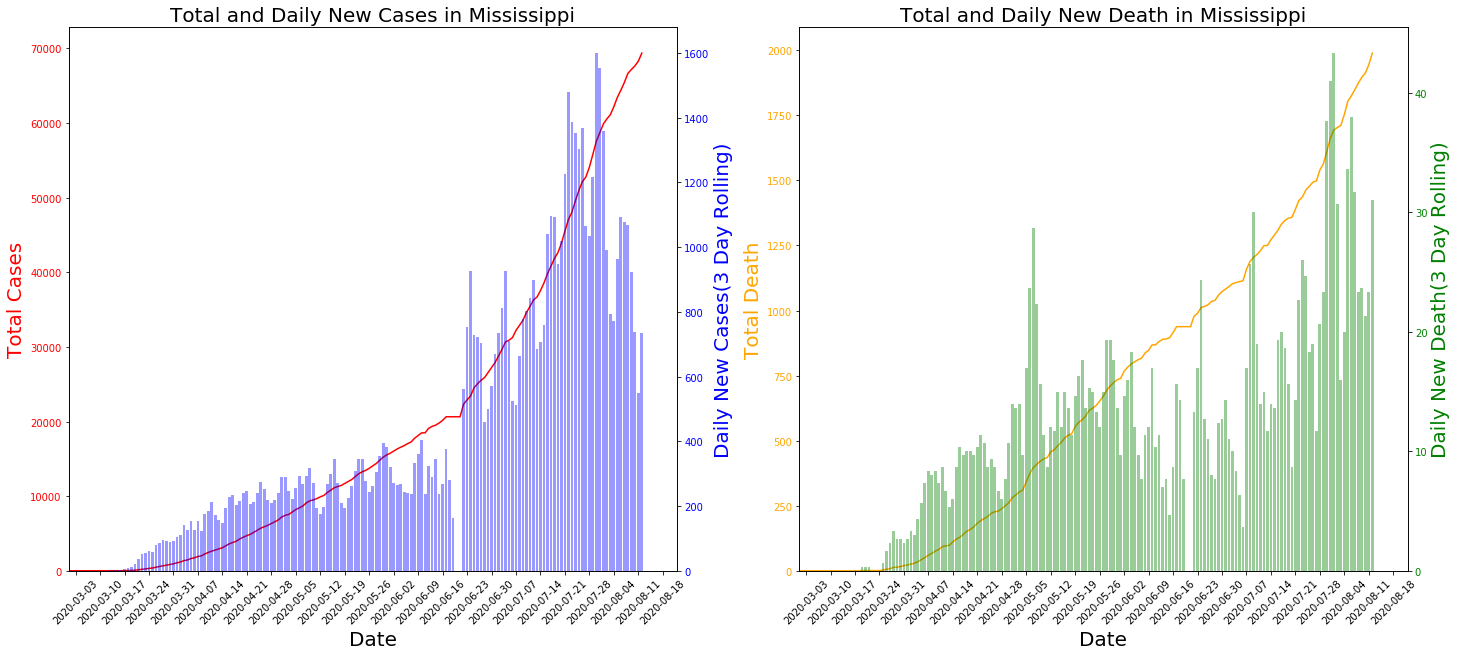

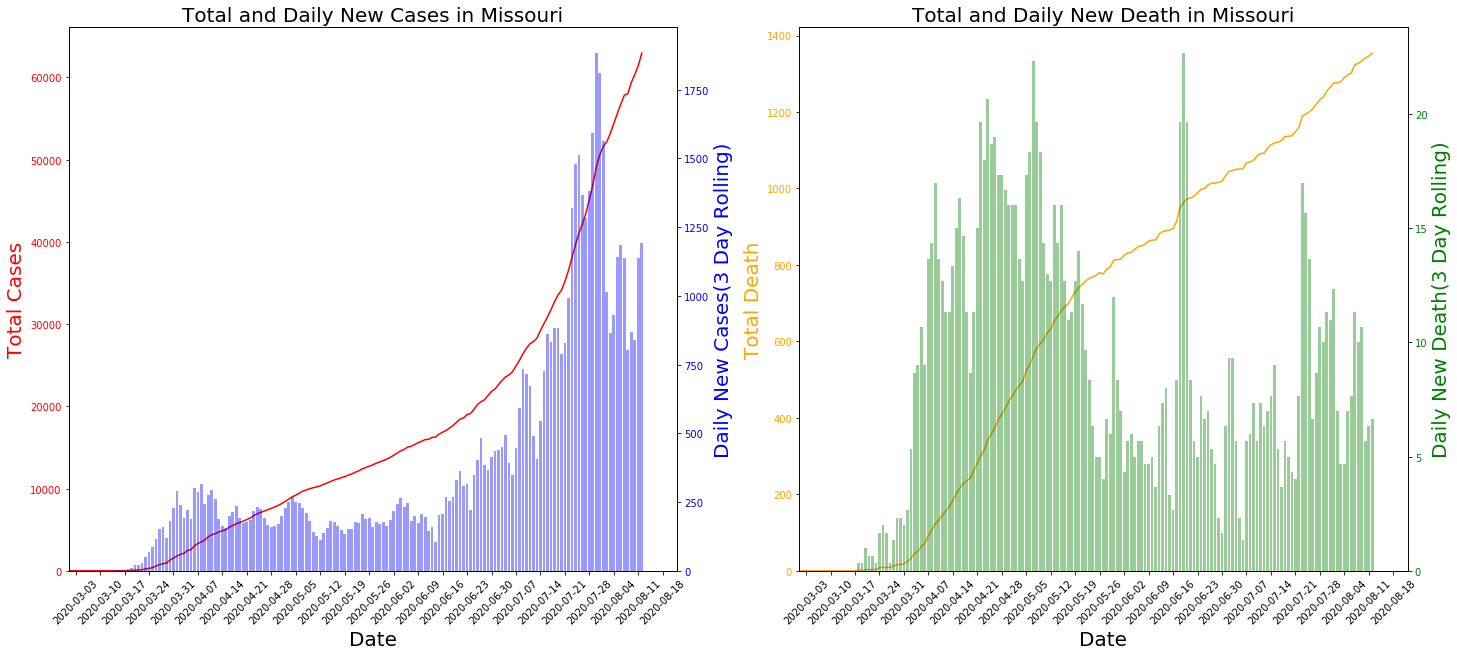

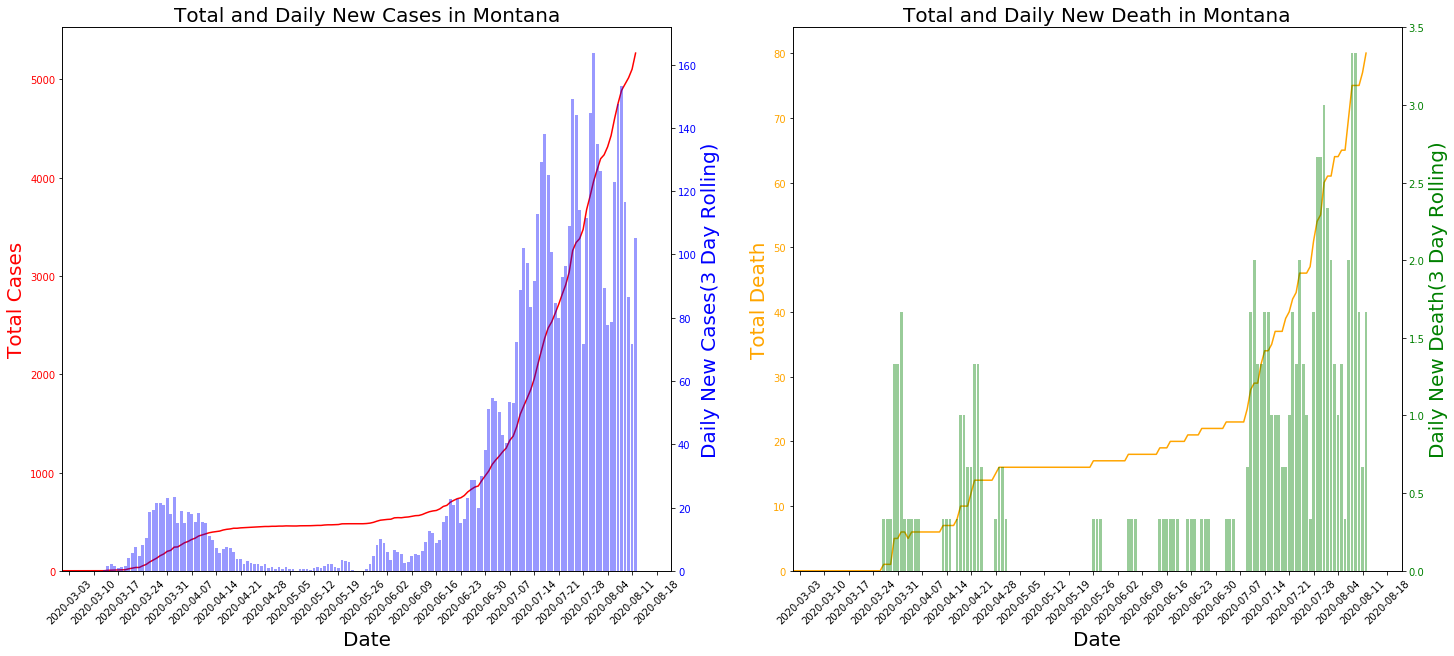

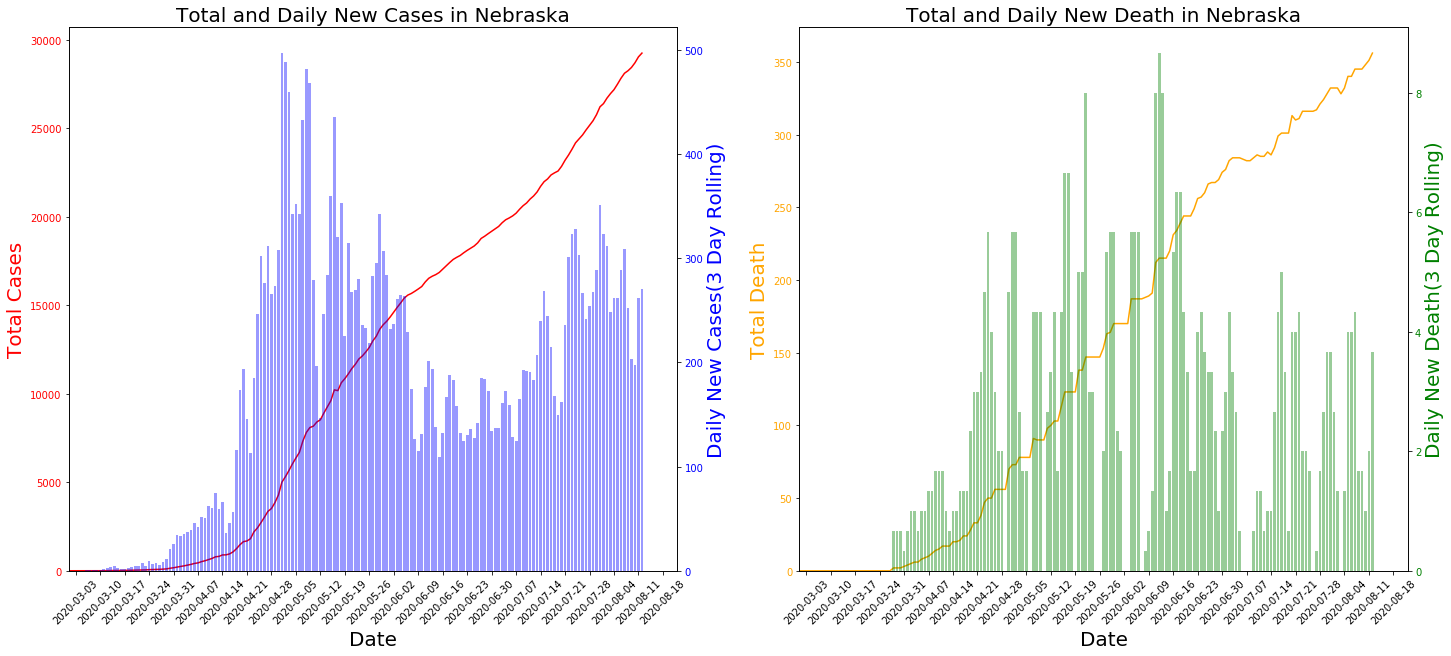

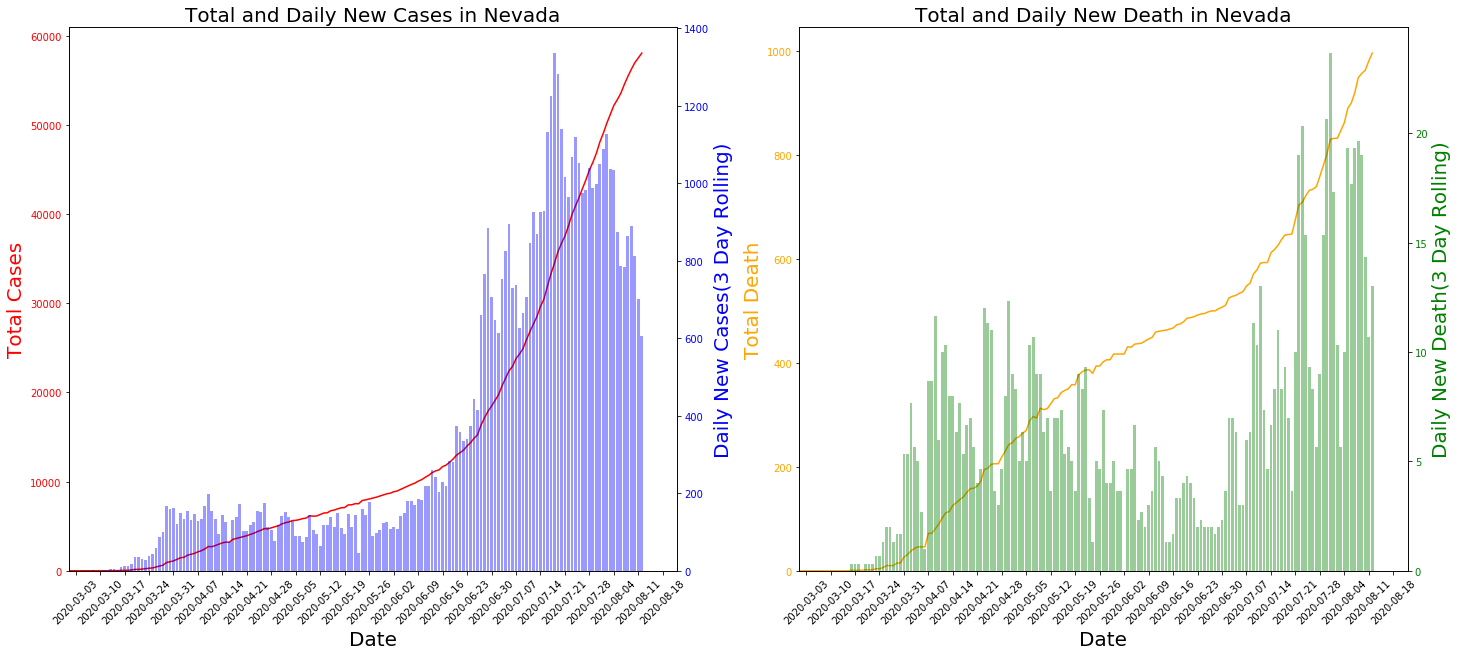

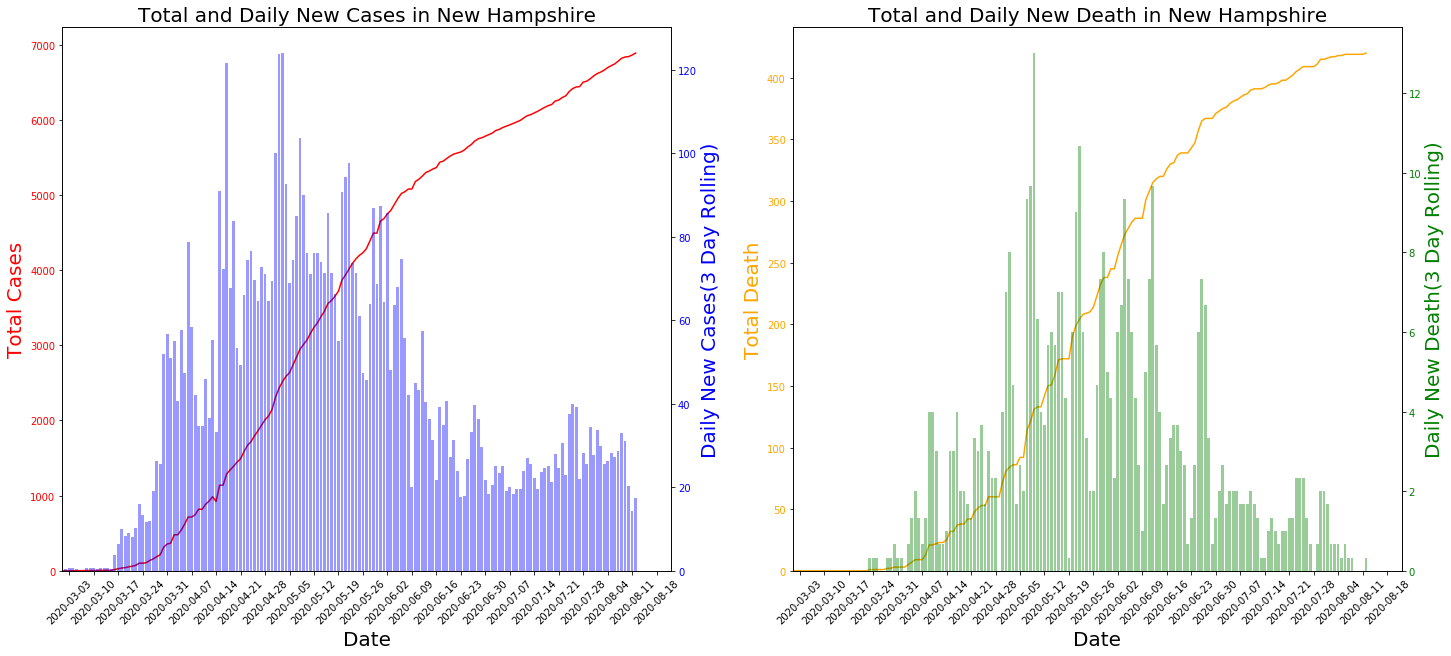

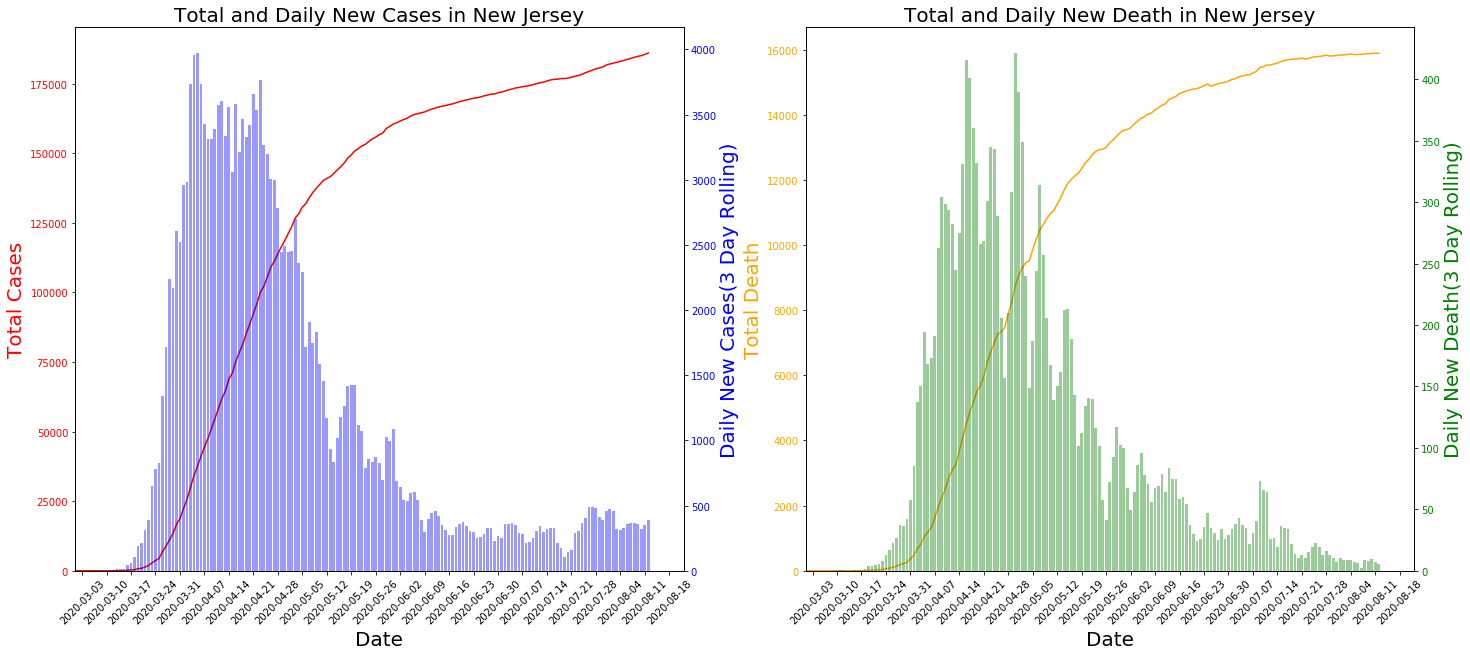

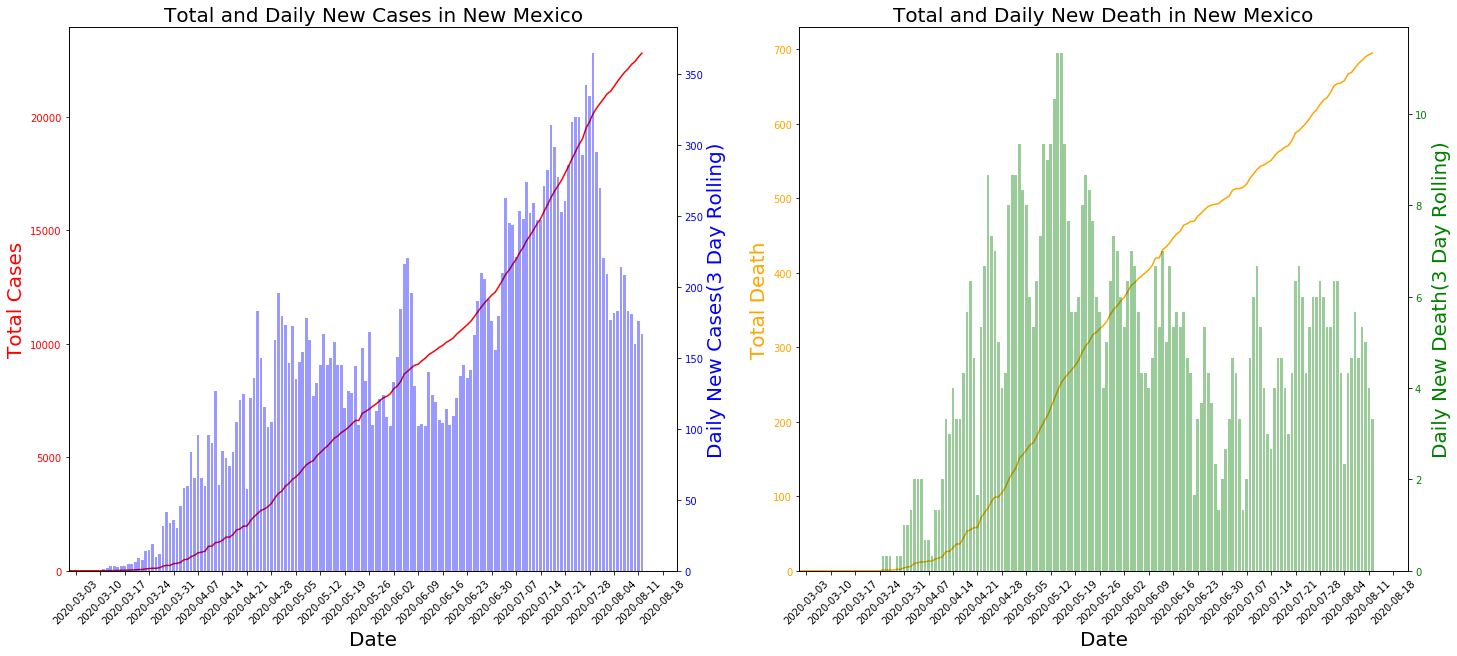

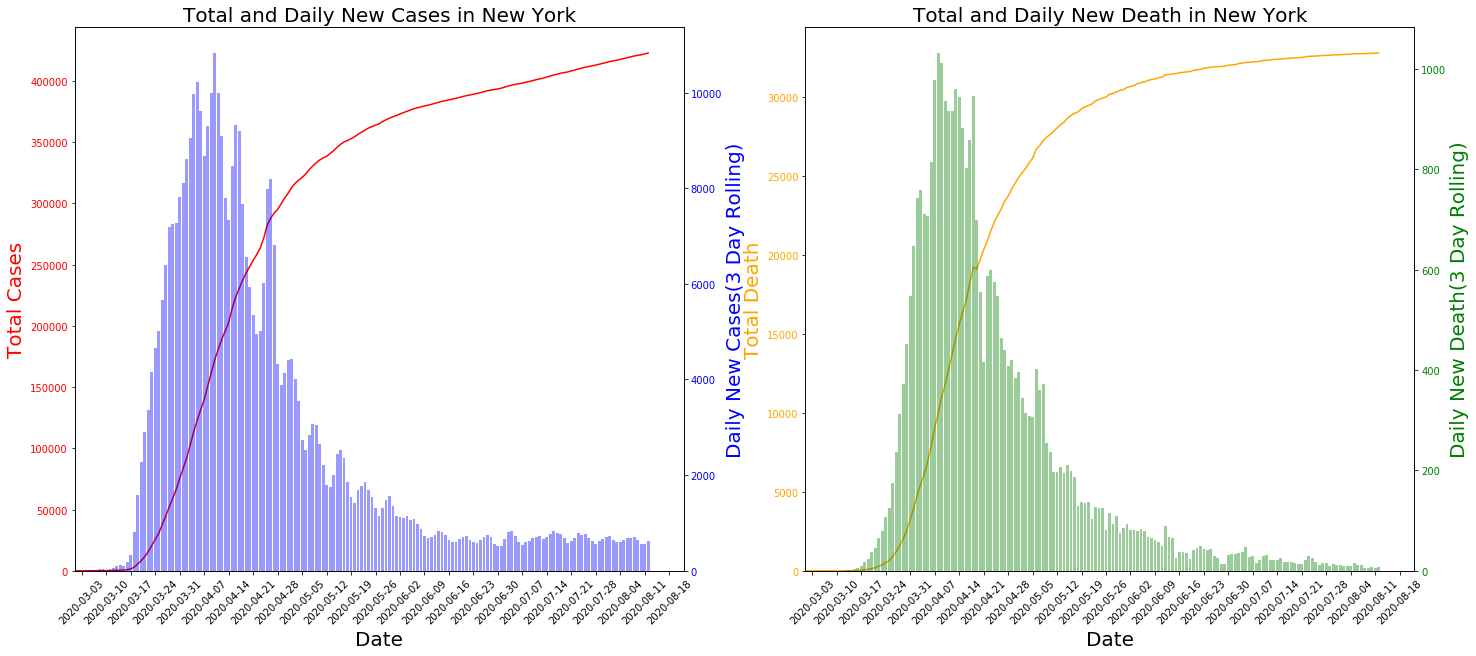

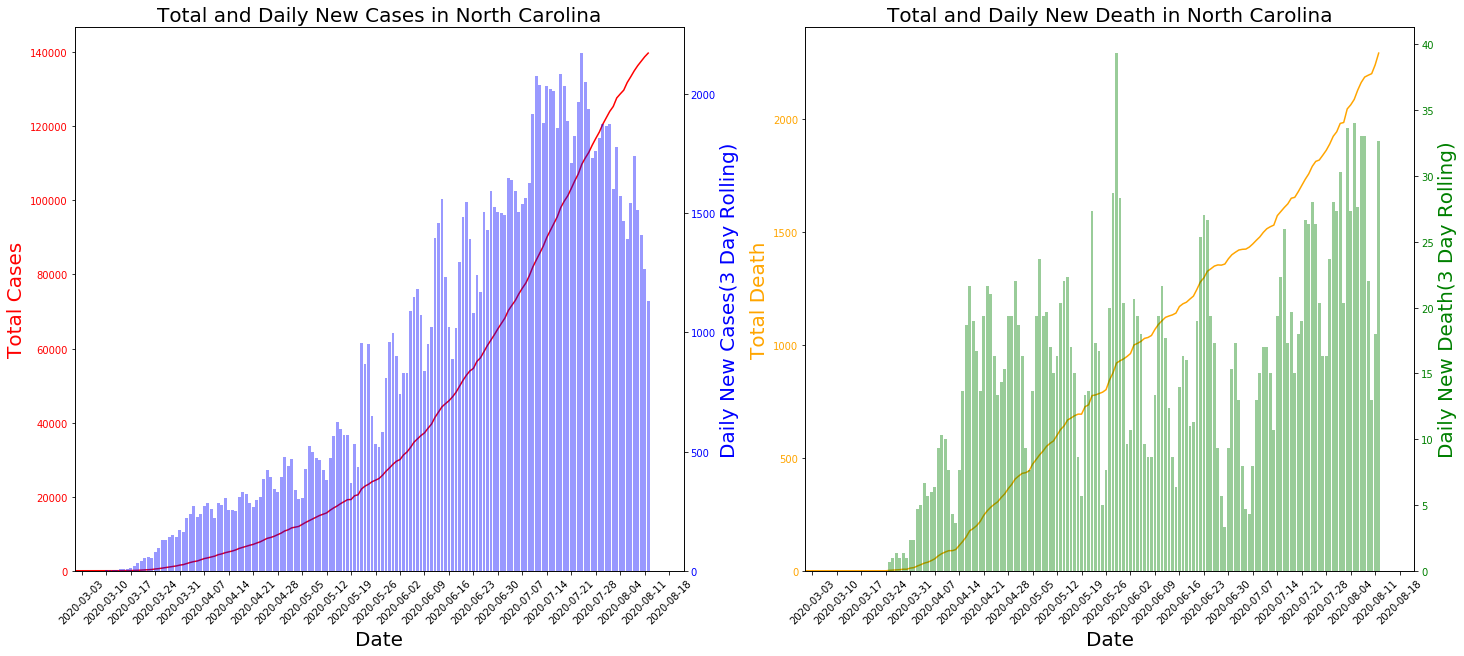

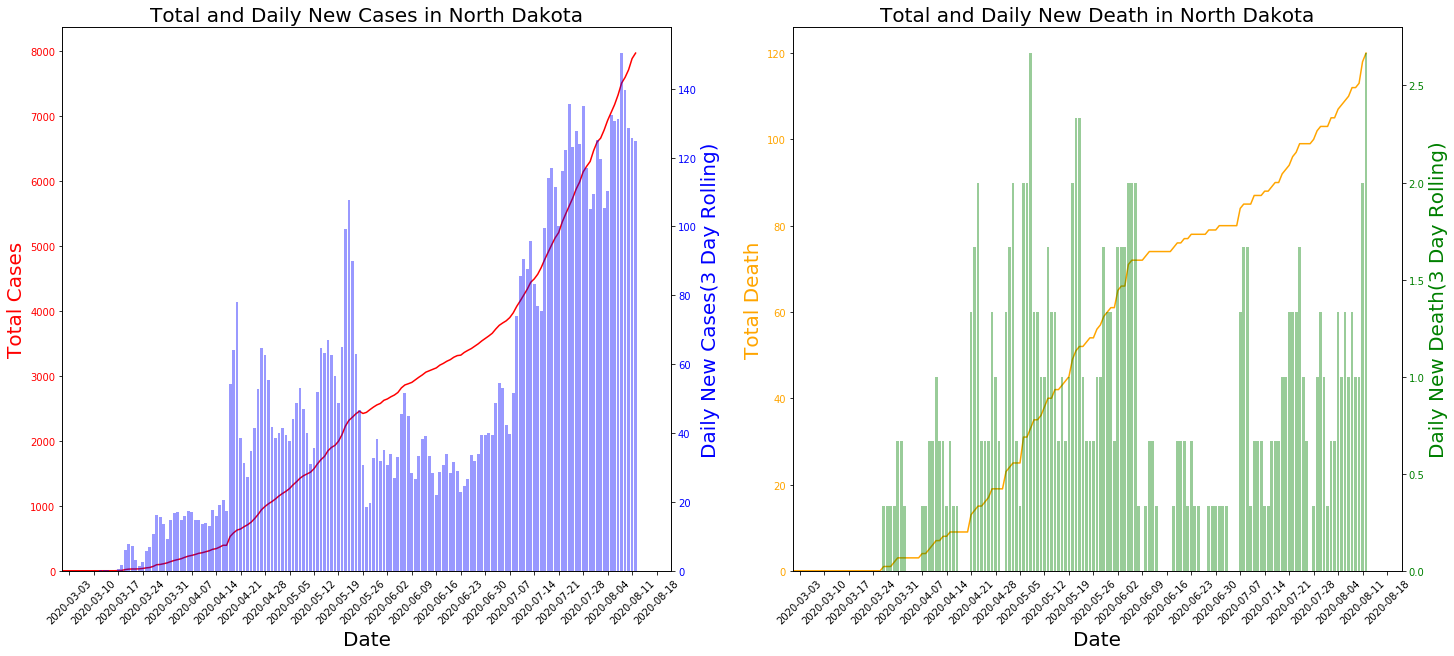

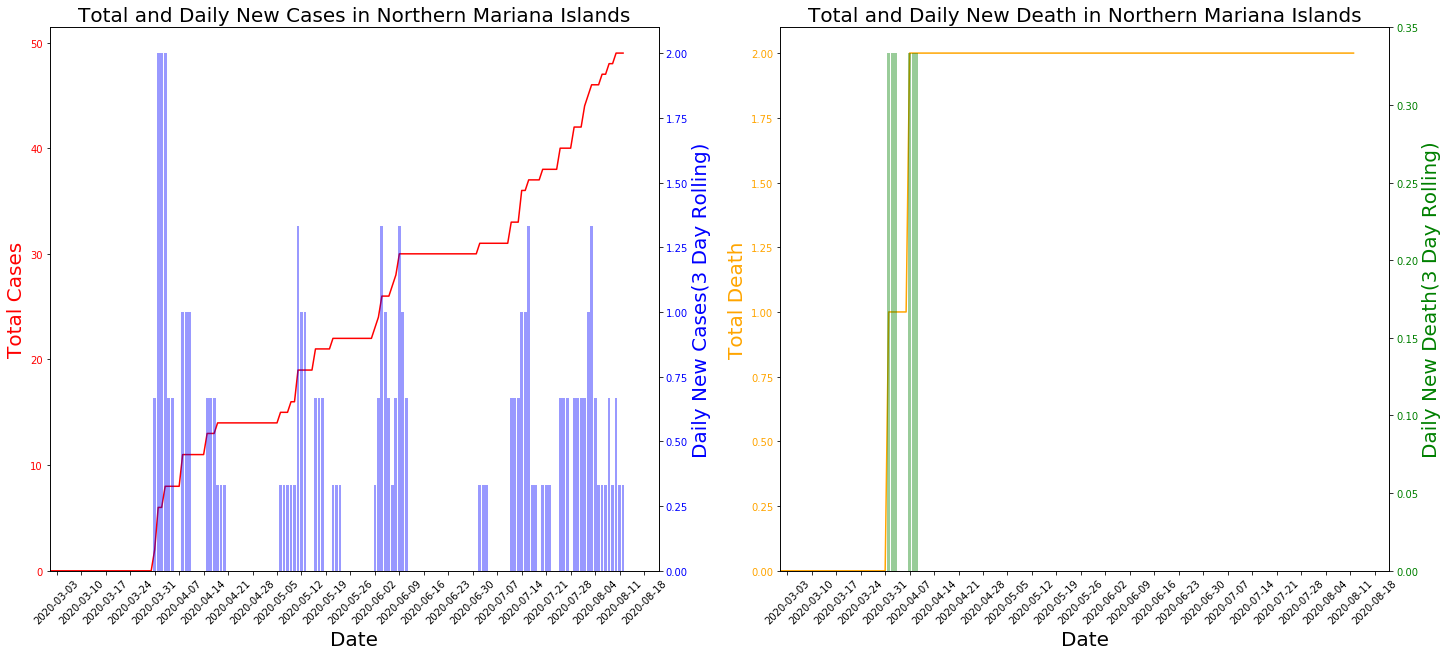

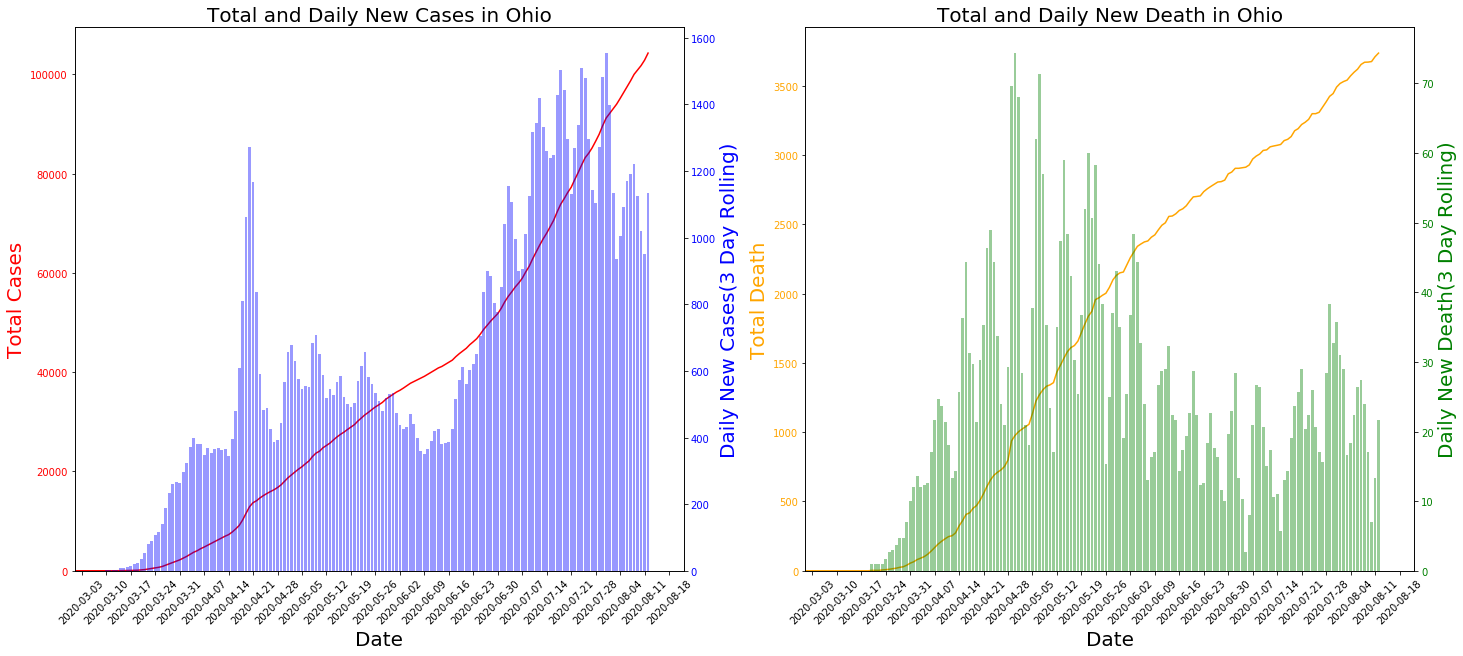

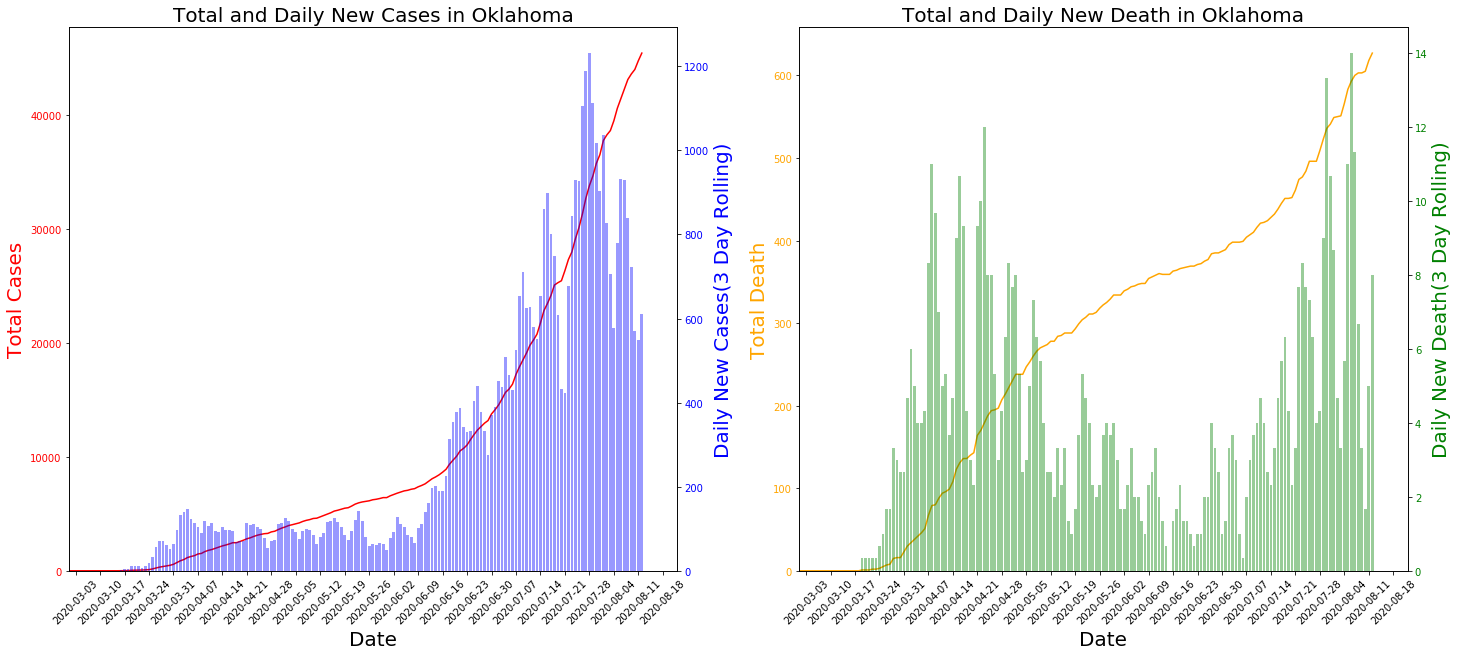

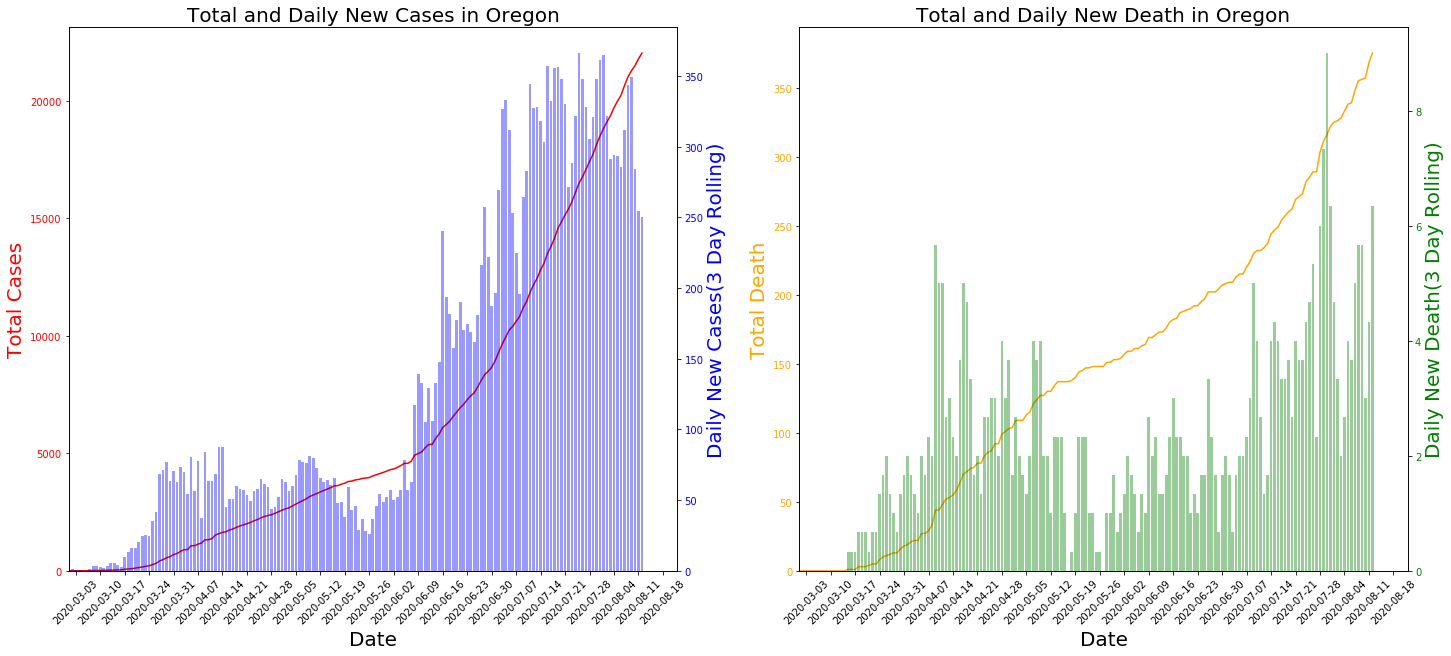

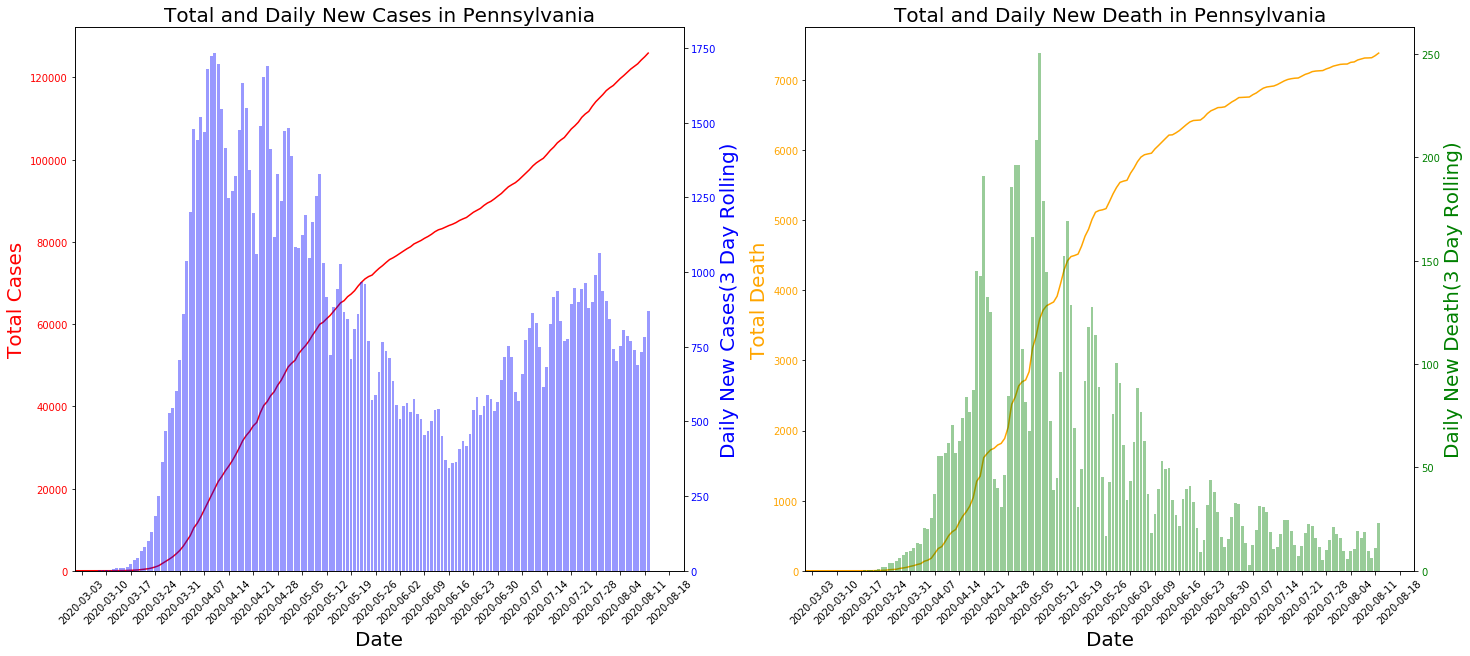

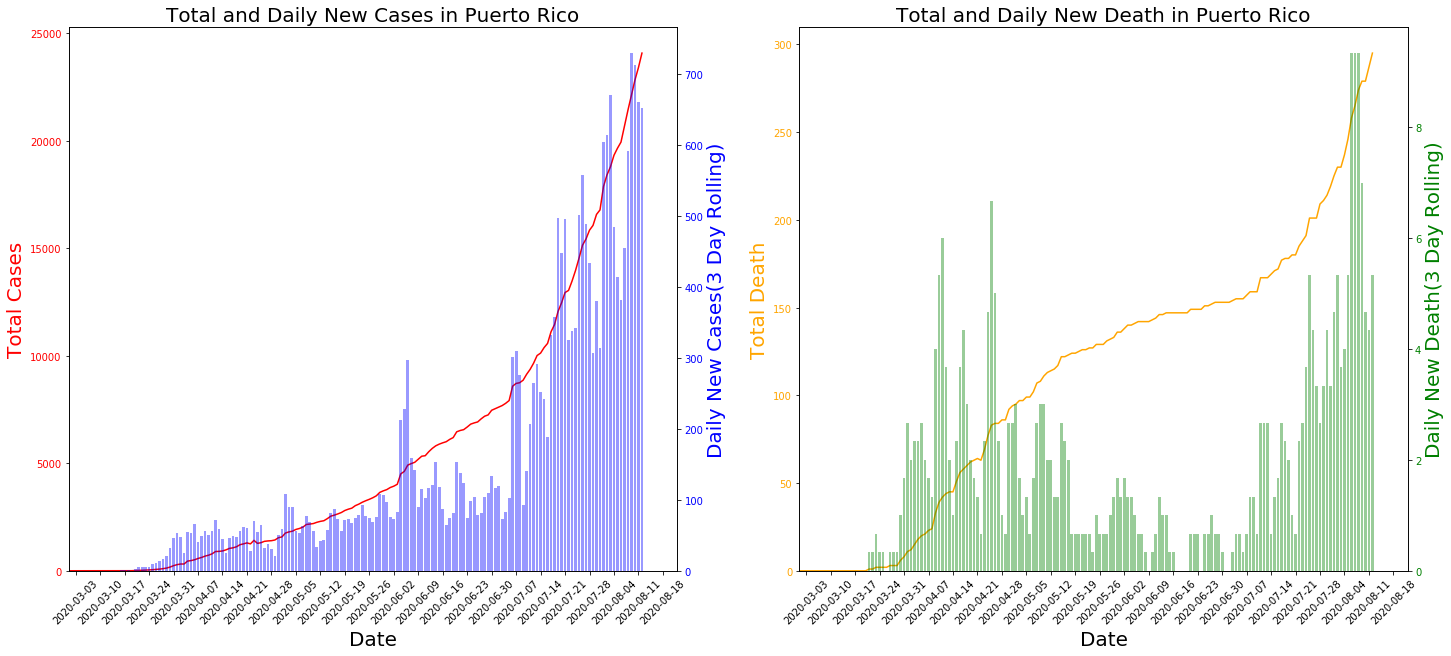

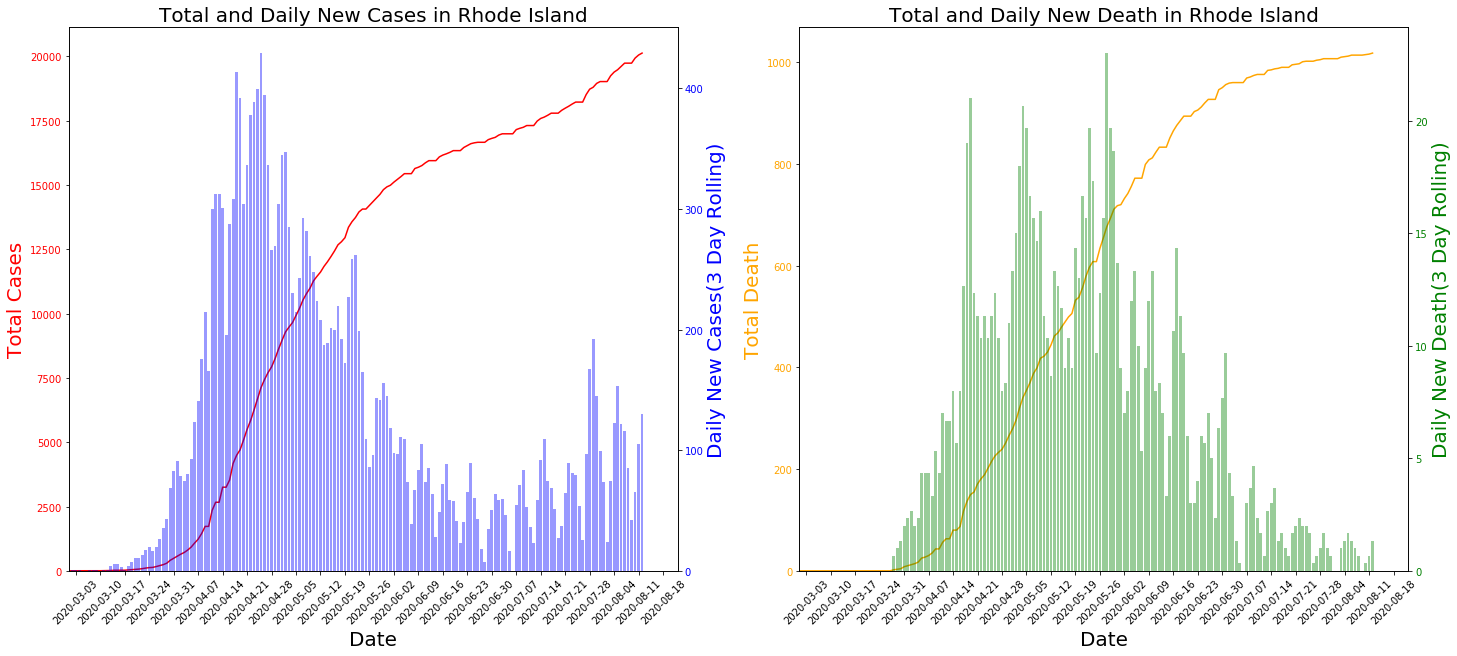

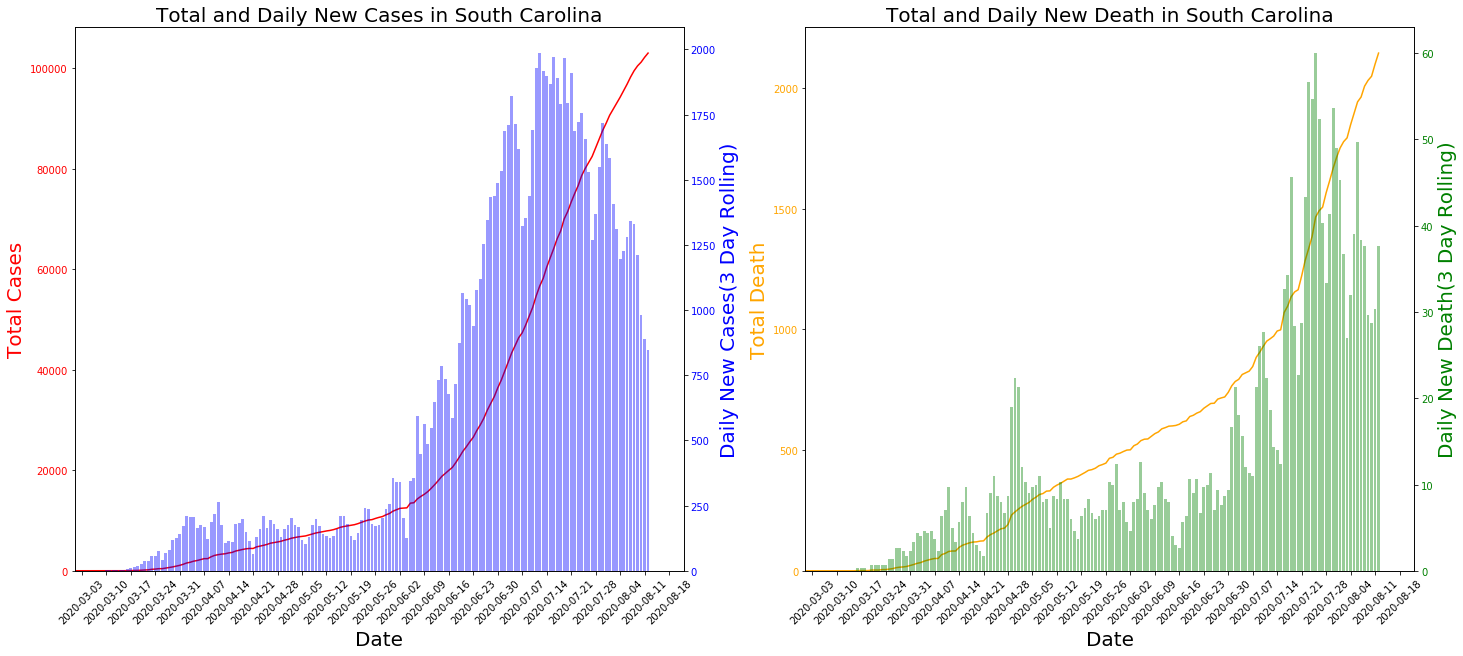

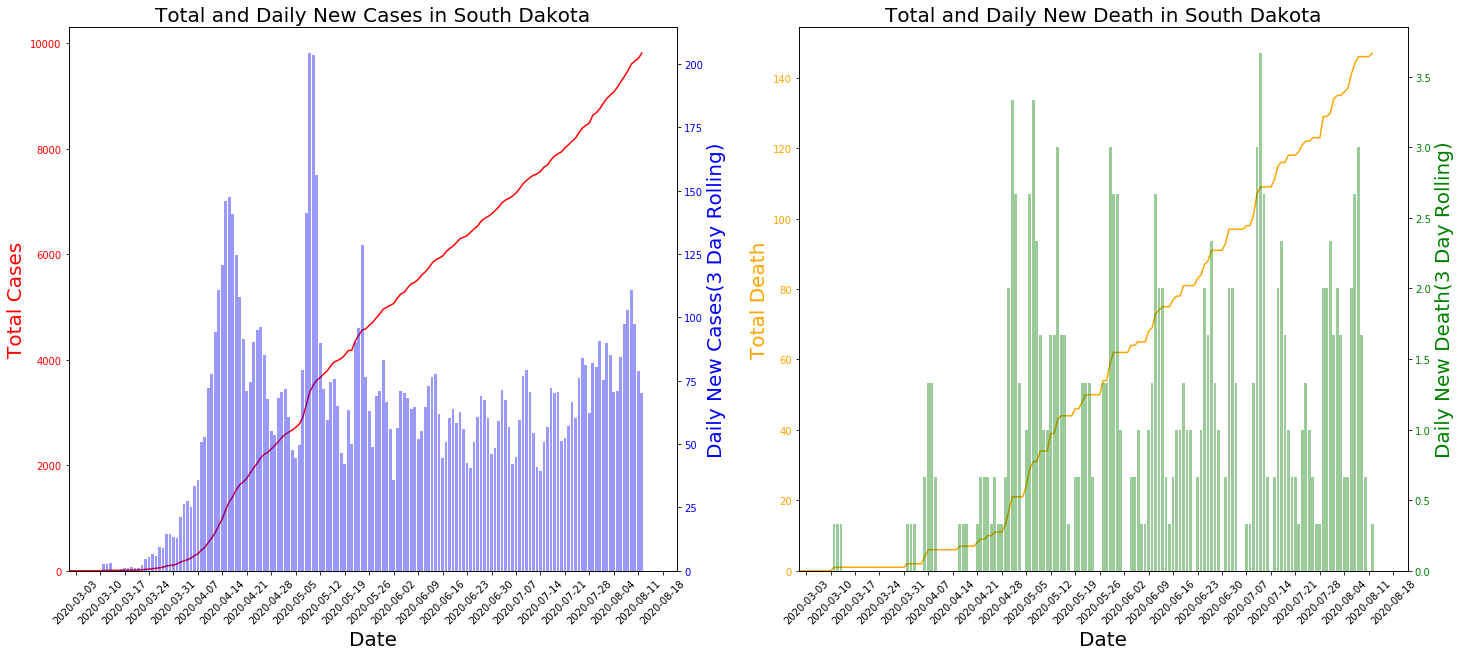

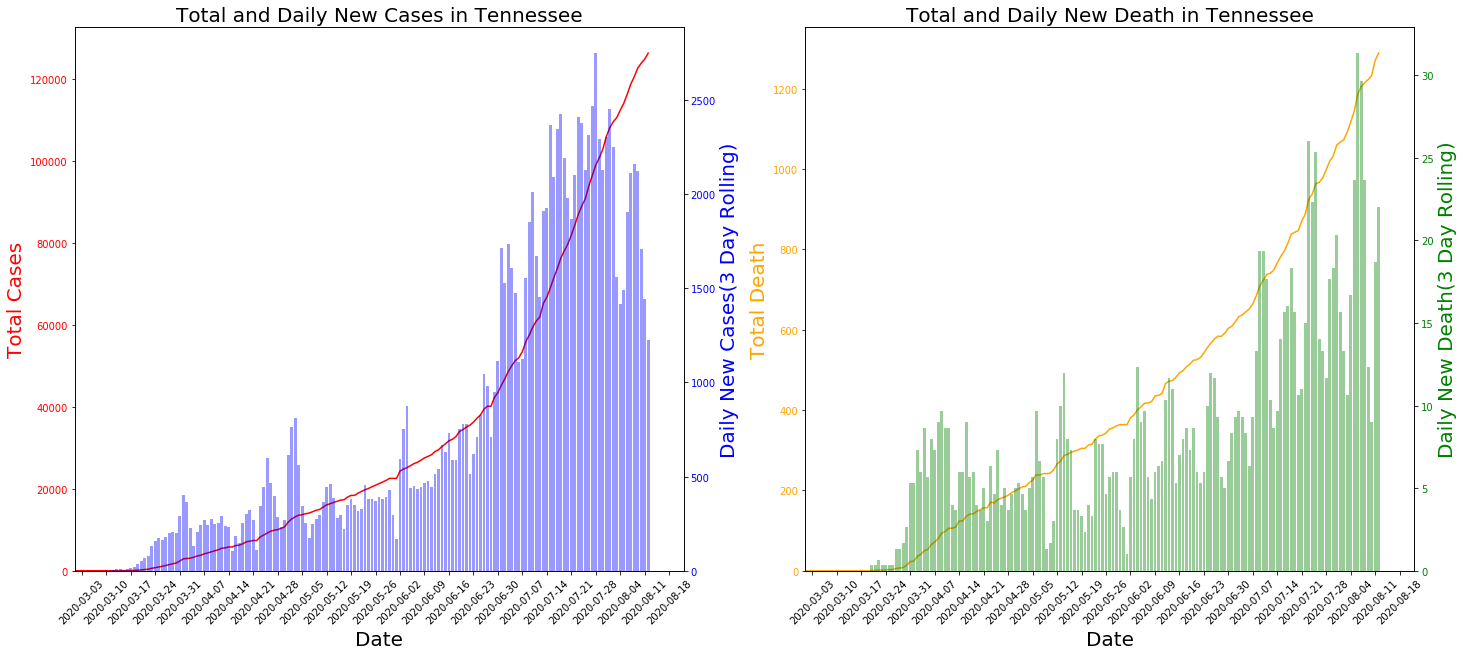

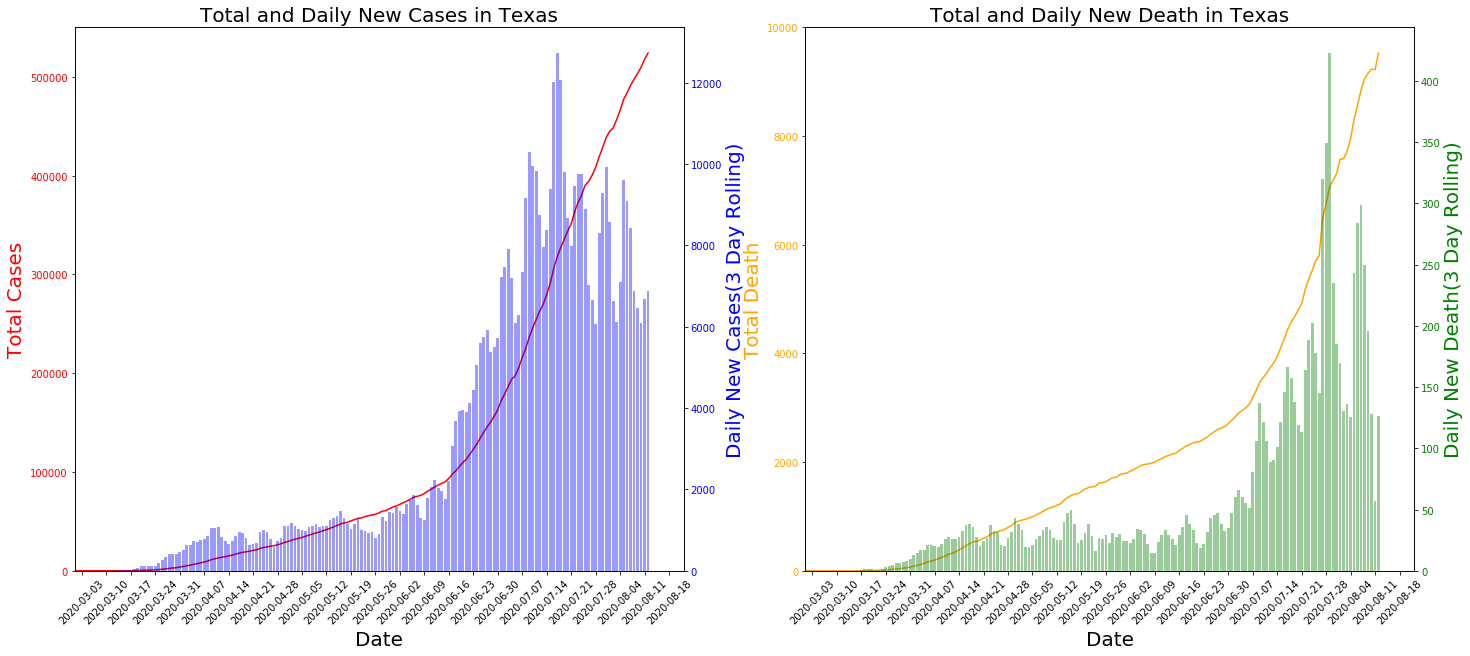

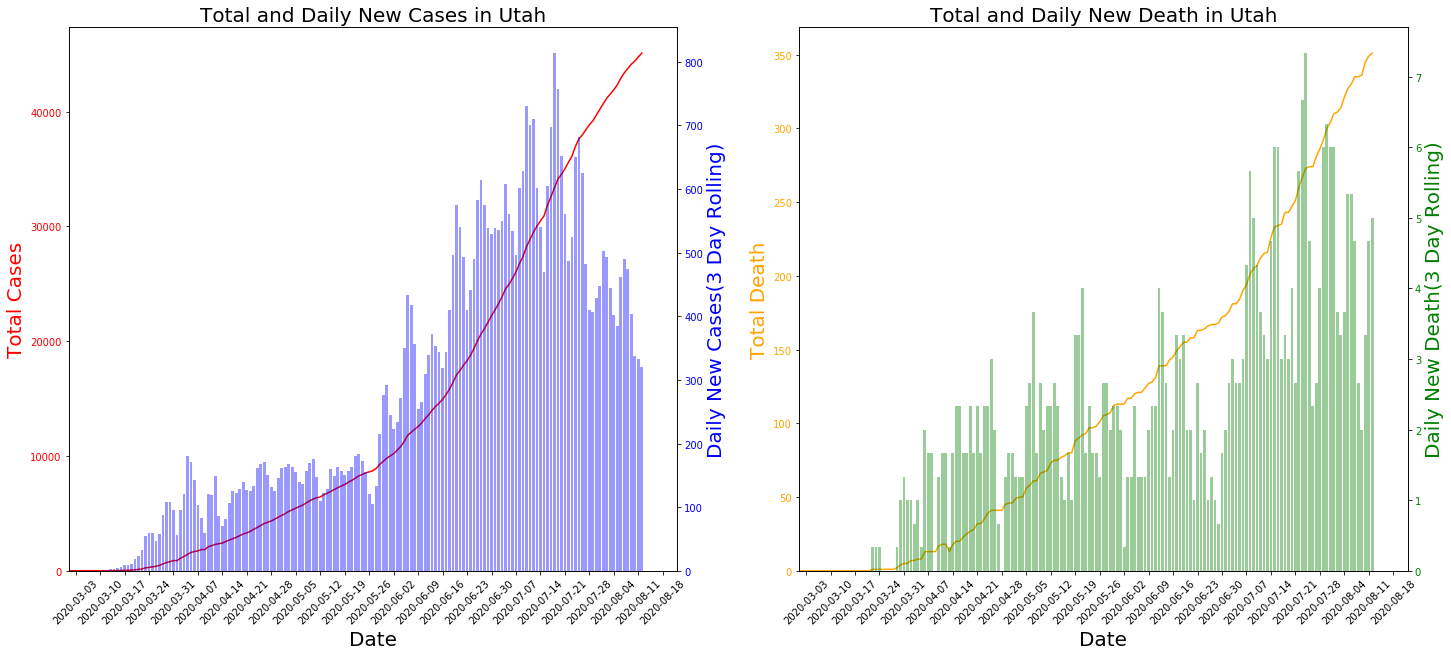

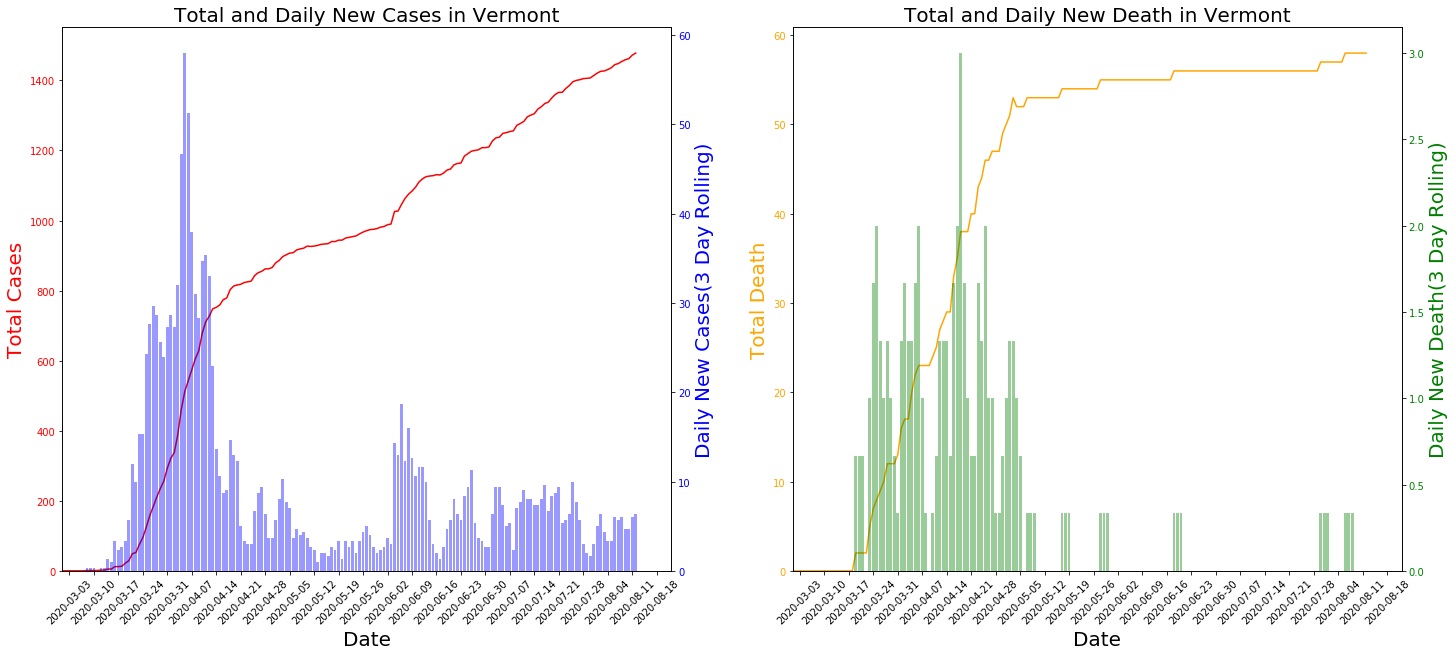

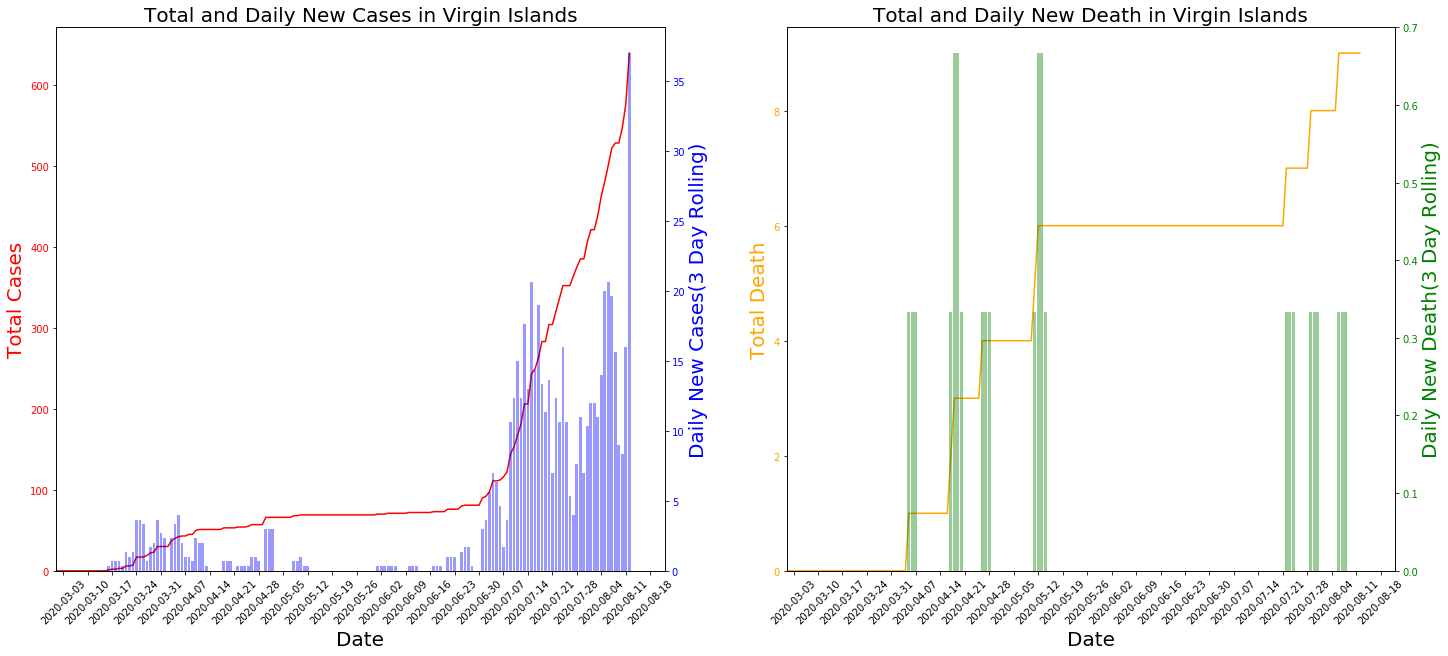

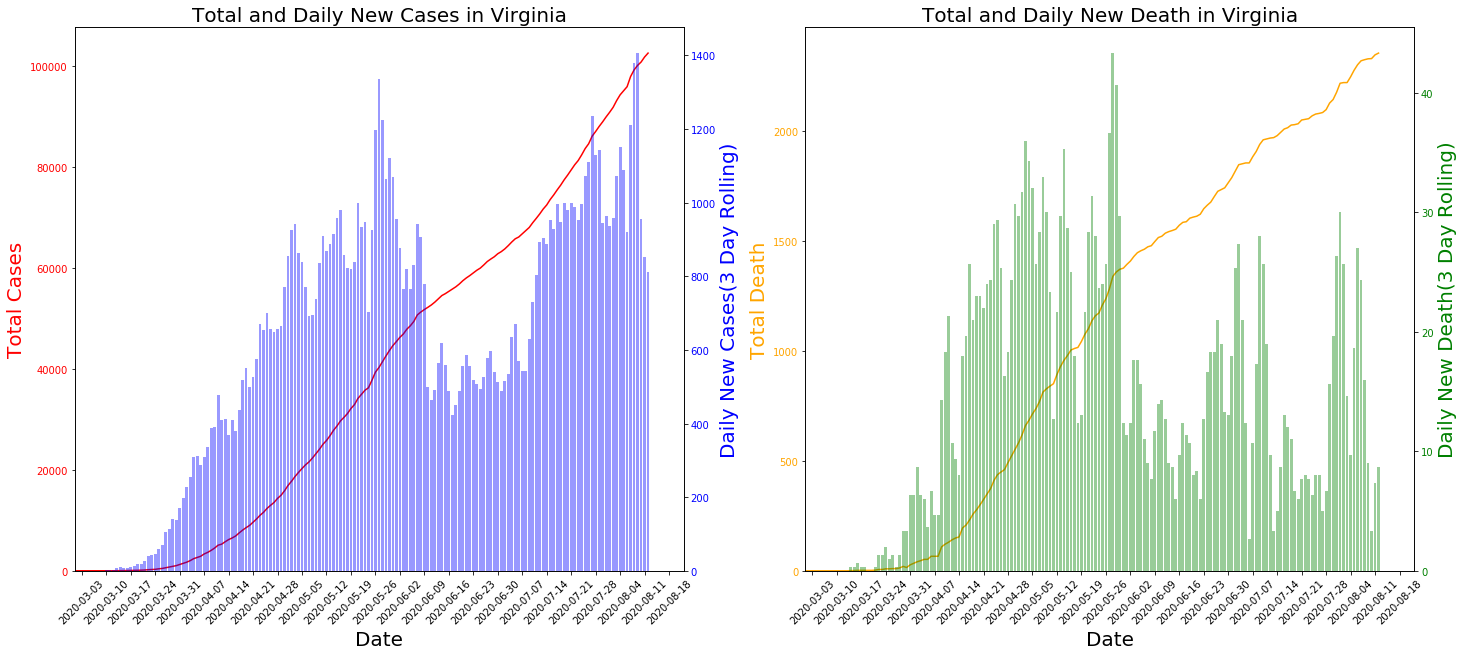

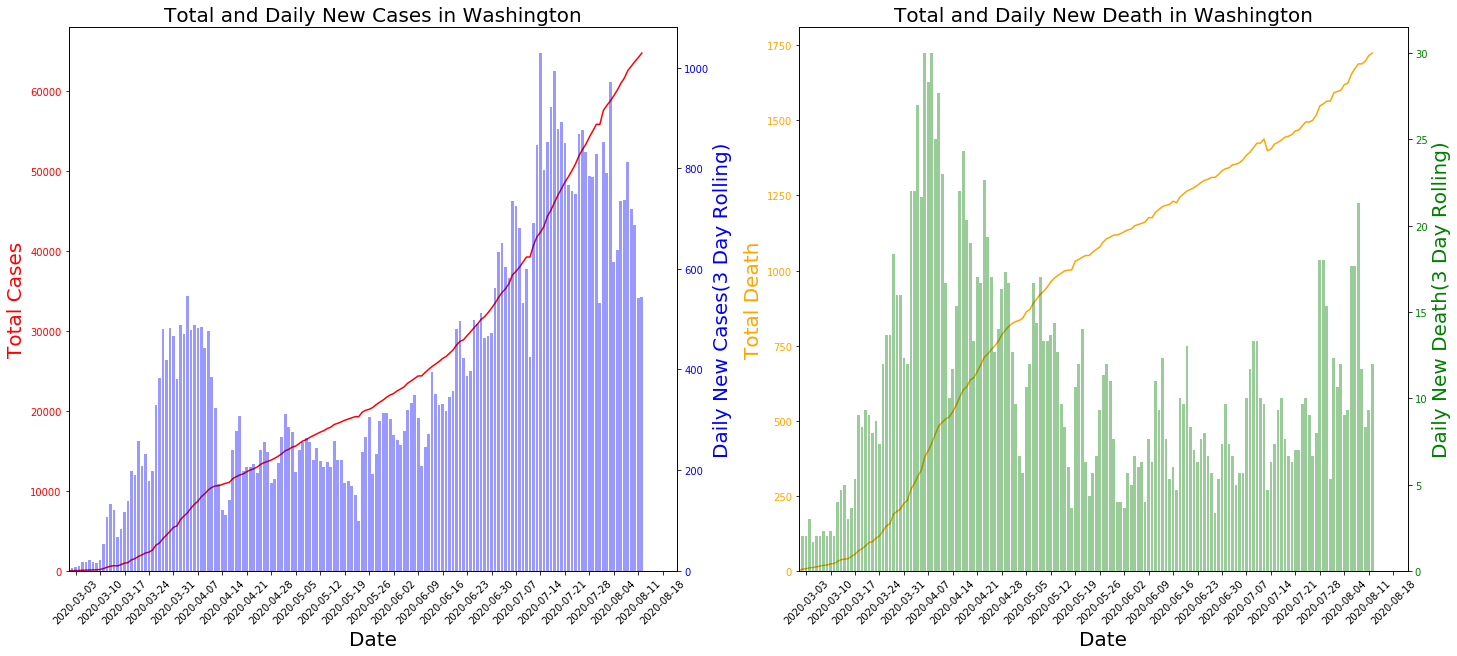

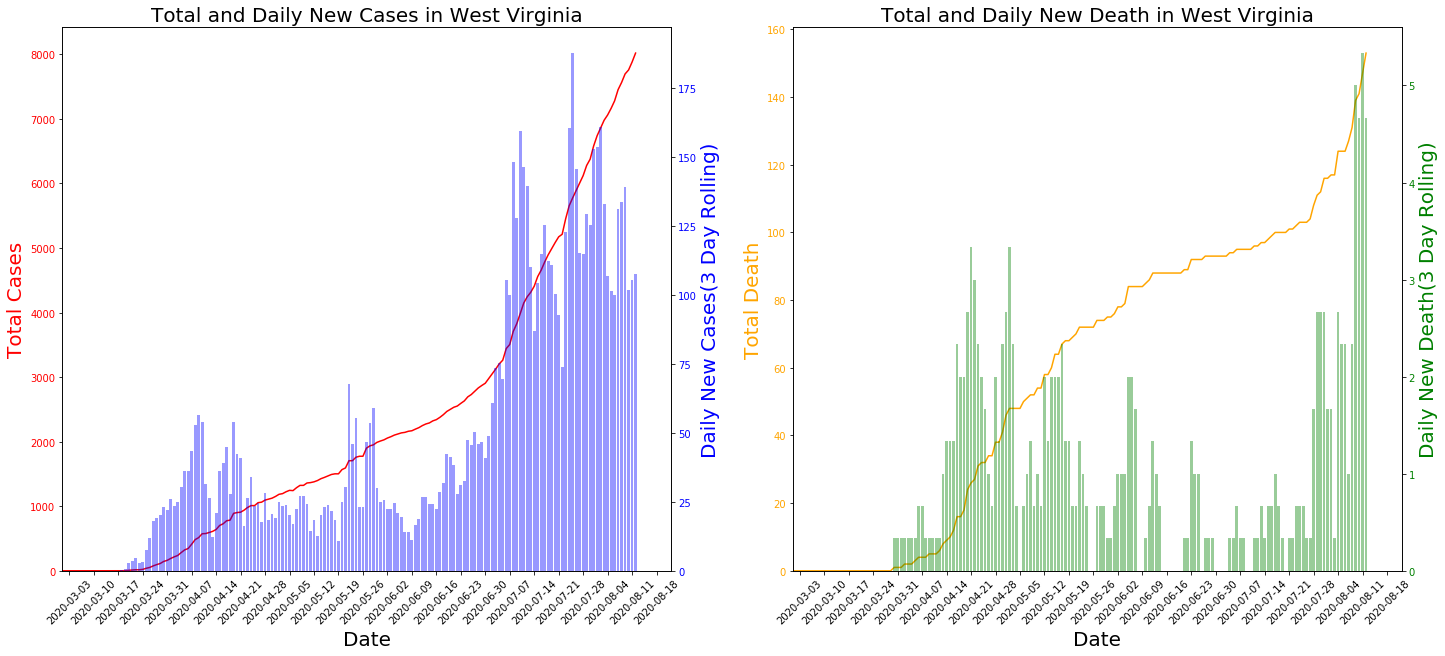

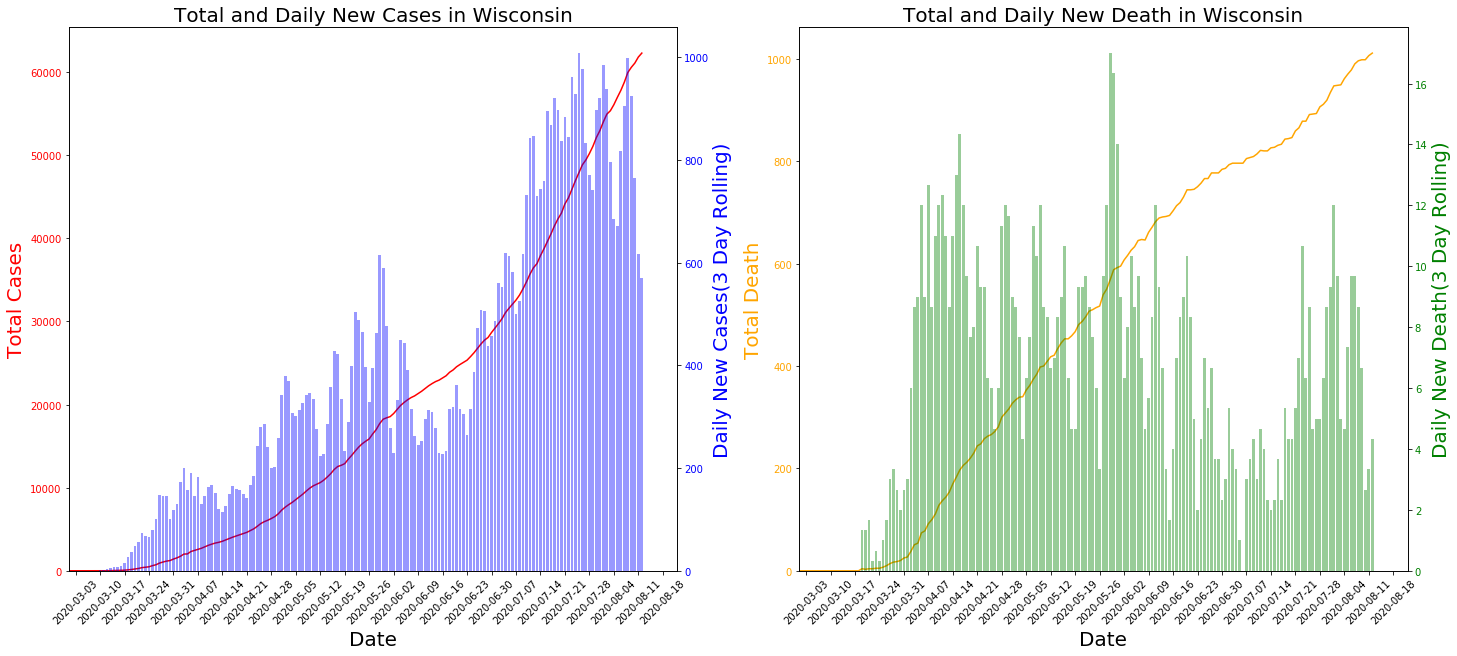

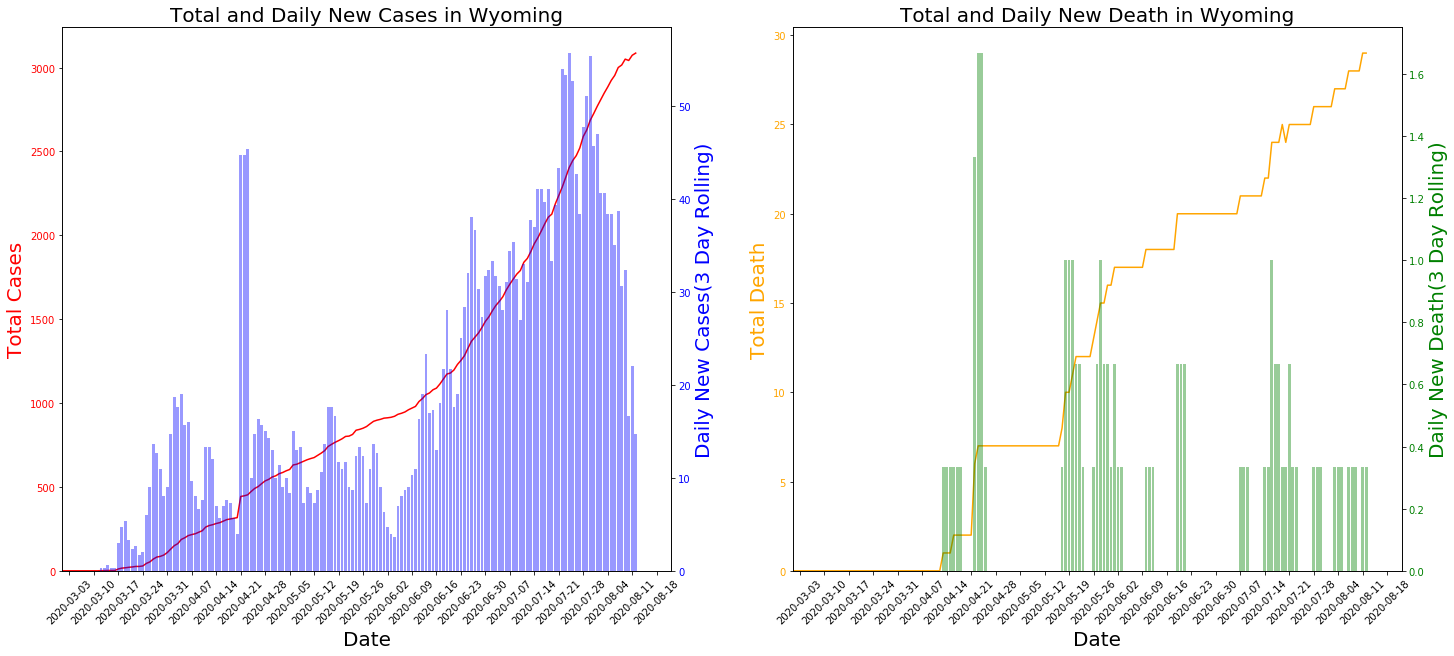

In [9]:
for state in states:
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(24,10))
    ax2 = axs[0].twinx()
    ax3 = axs[1].twinx()
    axs[0].plot(data['%s' % state]['Date'], data['%s' % state]['Total Cases'], 'r-')
    axs[0].tick_params(axis = 'y', labelcolor='r')
    axs[0].tick_params(axis = 'x', labelrotation = 45)
    axs[0].set_xlim(datetime.date(2020, 3, 1))
    axs[0].set_ylim(0)
    axs[0].set_xlabel('Date',fontsize = 20)
    axs[0].set_ylabel('Total Cases', color='r',fontsize = 20)
    new_3d_rolling = data['%s' % state]['New Cases'].rolling(3).mean().fillna(0)
    ax2.bar(data['%s' % state]['Date'],new_3d_rolling, color = 'b', alpha= 0.4)
    ax2.tick_params(axis = 'y',labelcolor='b')
    ax2.set_ylabel('Daily New Cases(3 Day Rolling)', color='b',fontsize = 20)
    
    axs[0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[0].set_title('Total and Daily New Cases in %s' %state,fontsize = 20)

    
    axs[1].plot(data['%s' % state]['Date'], data['%s' % state]['Total Death'], '-',color = 'orange')
    axs[1].tick_params(axis = 'y', labelcolor='orange')
    axs[1].tick_params(axis = 'x', labelrotation = 45)
    axs[1].set_xlim(datetime.date(2020, 3, 1))
    axs[1].set_ylim(0)
    axs[1].set_xlabel('Date',fontsize = 20)
    axs[1].set_ylabel('Total Death', color='orange',fontsize = 20)
    death_3d_rolling = data['%s' % state]['New Death'].rolling(3).mean().fillna(0)
    ax3.bar(data['%s' % state]['Date'], death_3d_rolling, color = 'green', alpha= 0.4)
    ax3.tick_params(axis = 'y',labelcolor='green')
    ax3.set_ylabel('Daily New Death(3 Day Rolling)', color='green',fontsize = 20)
    
    axs[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[1].set_title('Total and Daily New Death in %s' %state,fontsize = 20)
    plt.show();

### Trends of Fatality Rate
- Total death as a percent of total cases

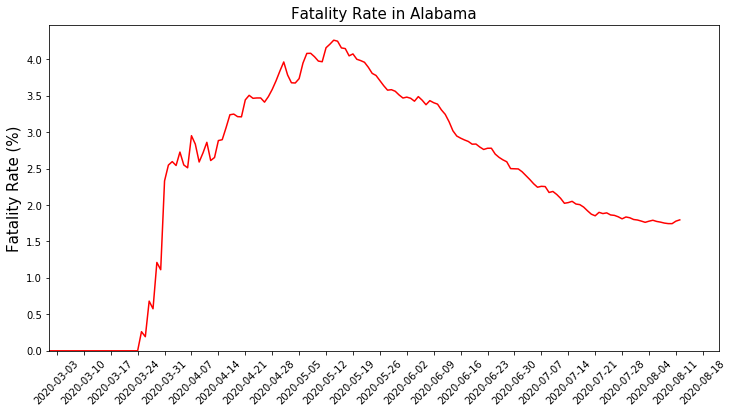

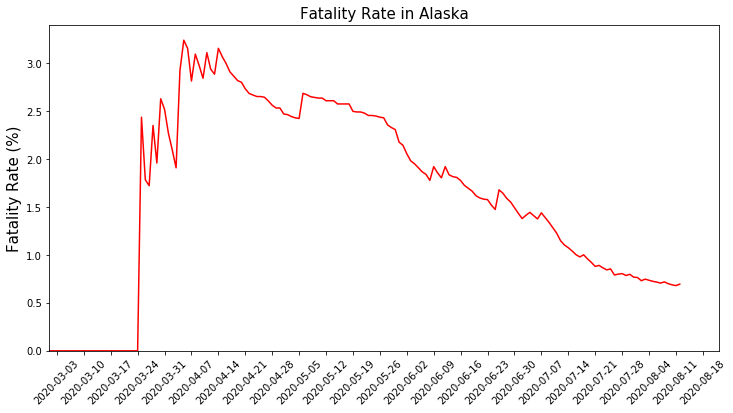

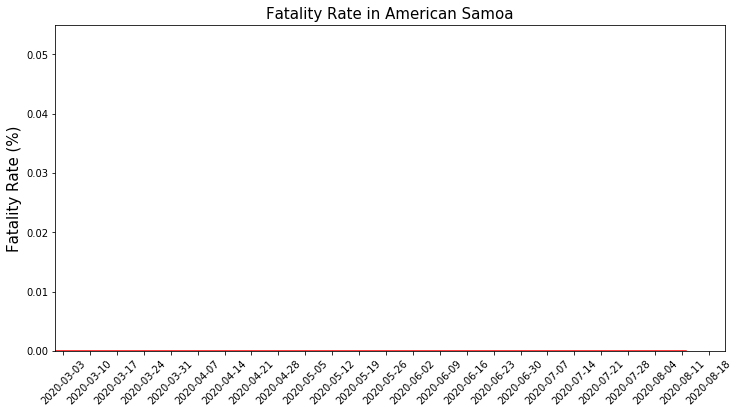

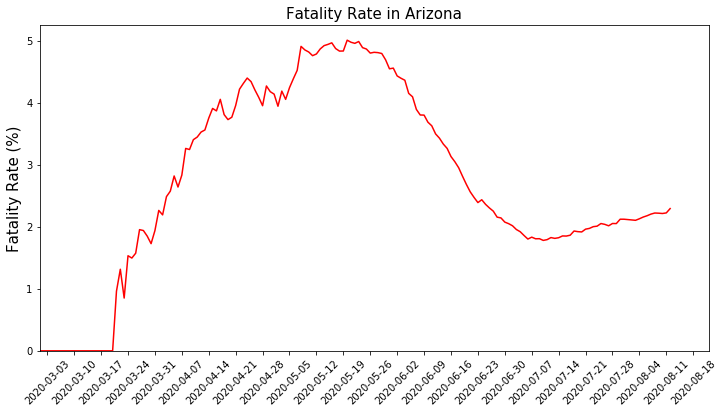

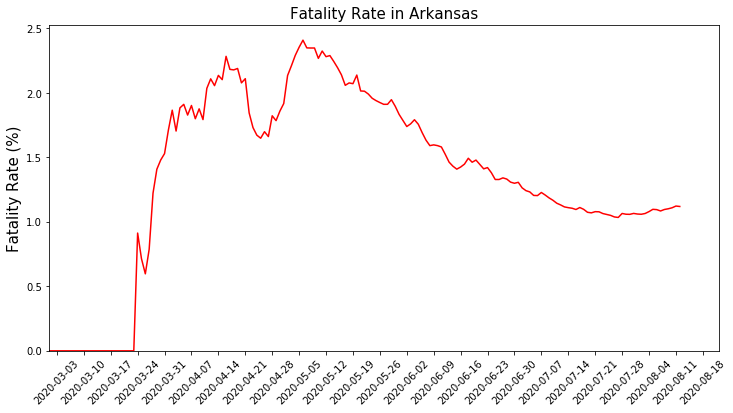

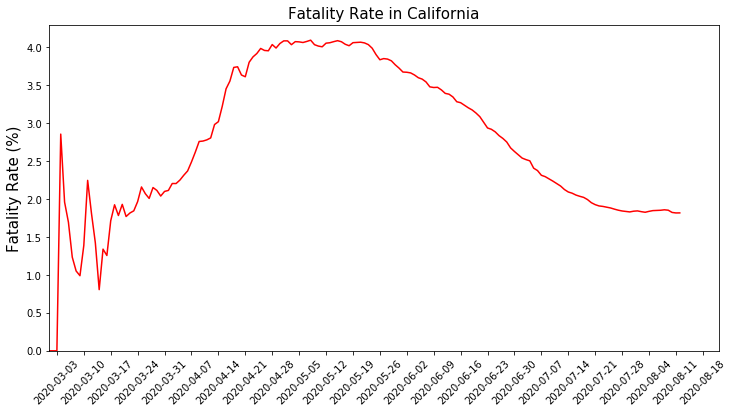

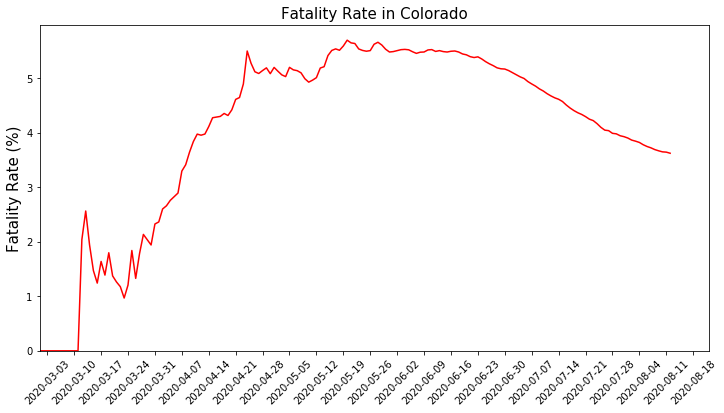

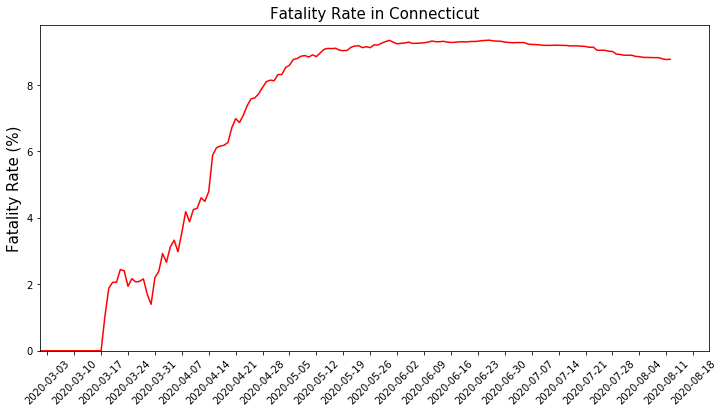

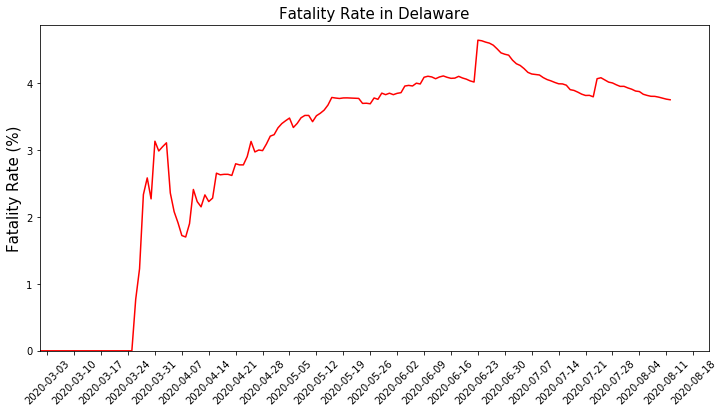

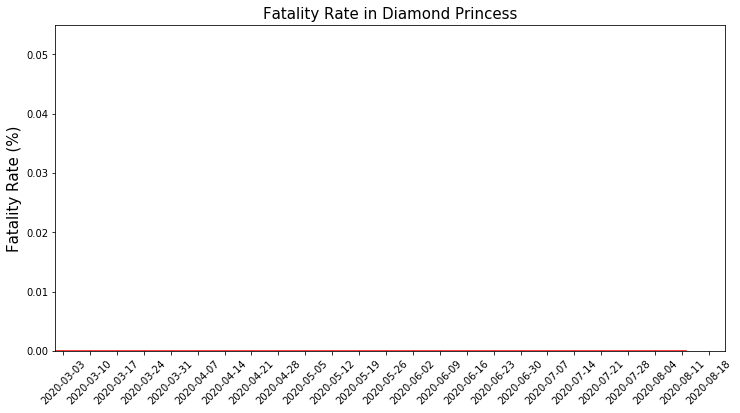

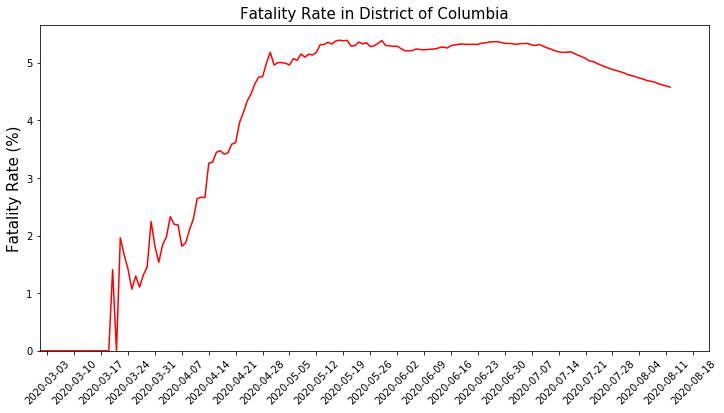

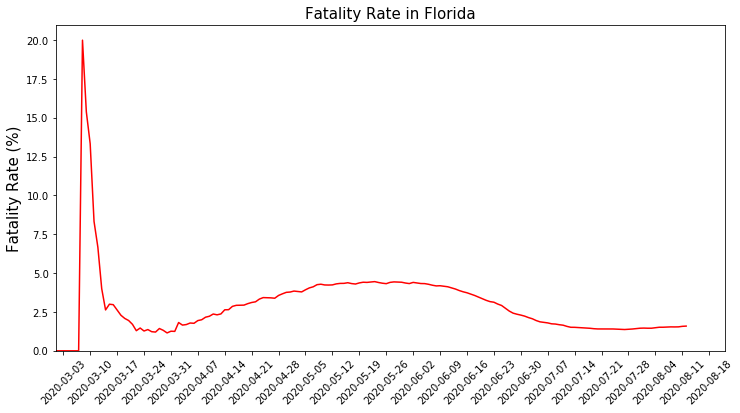

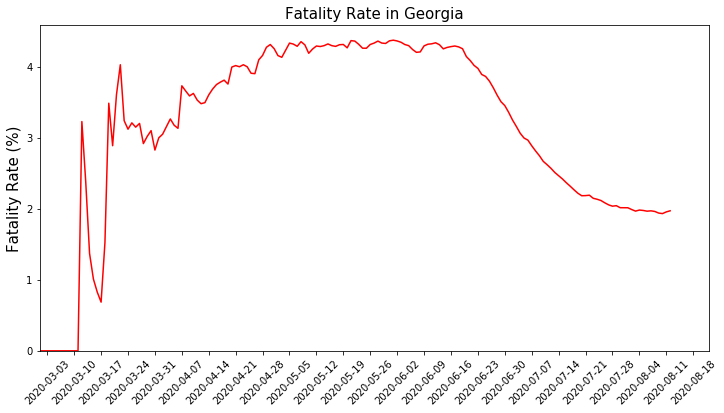

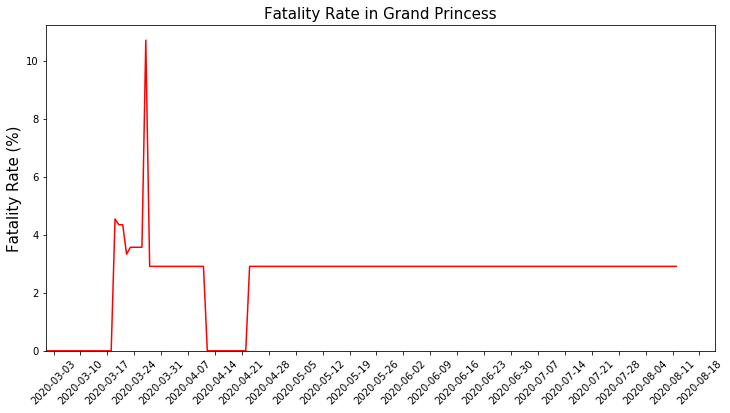

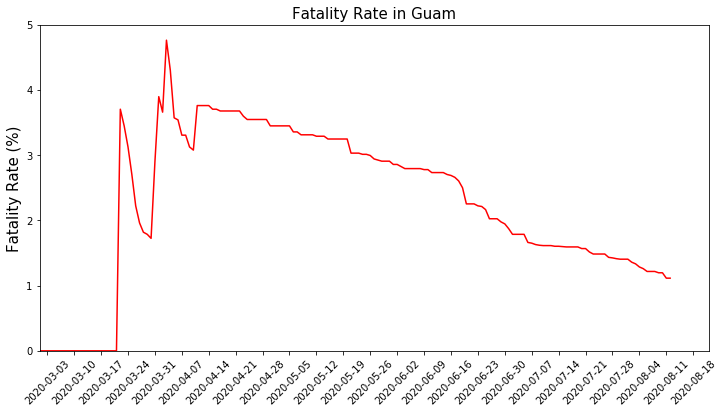

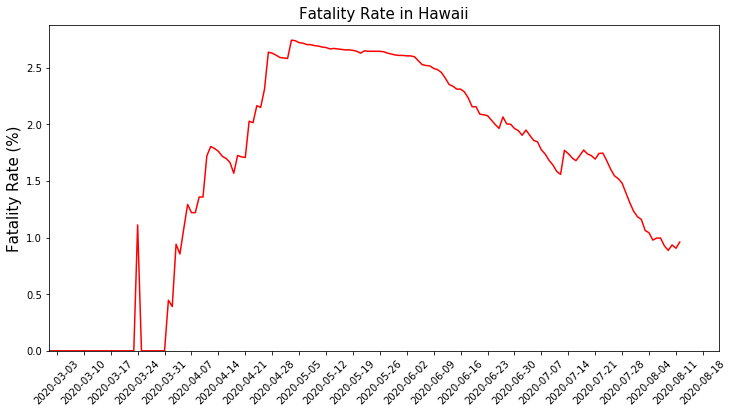

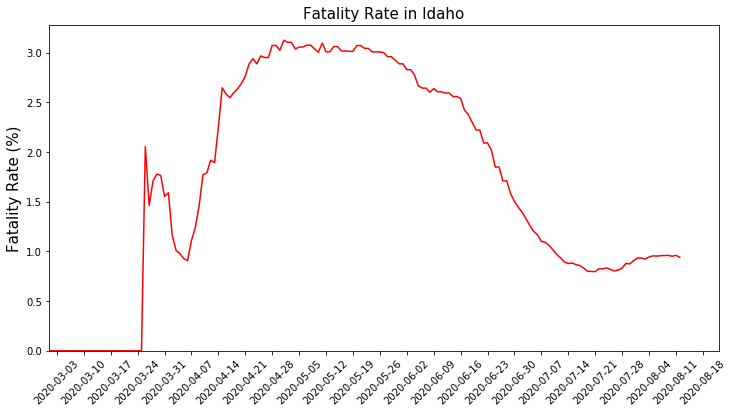

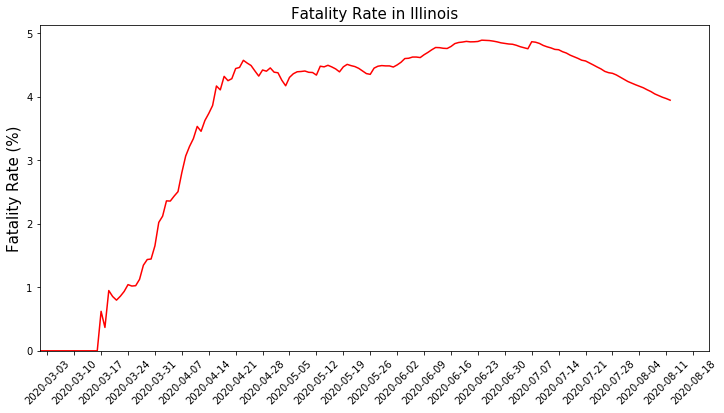

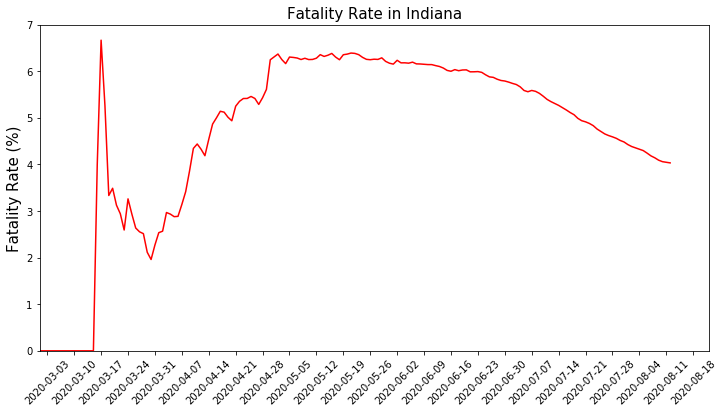

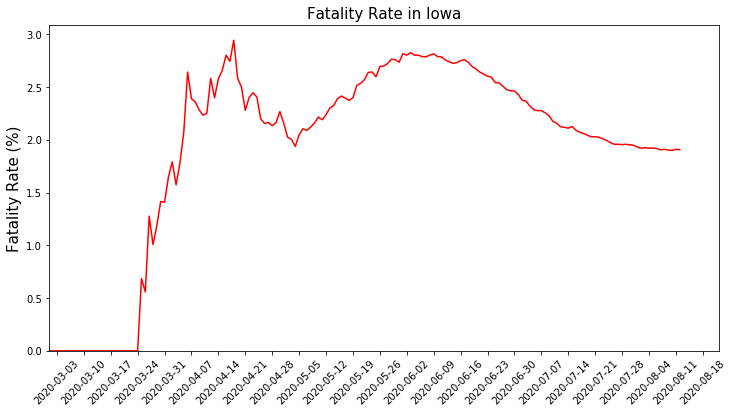

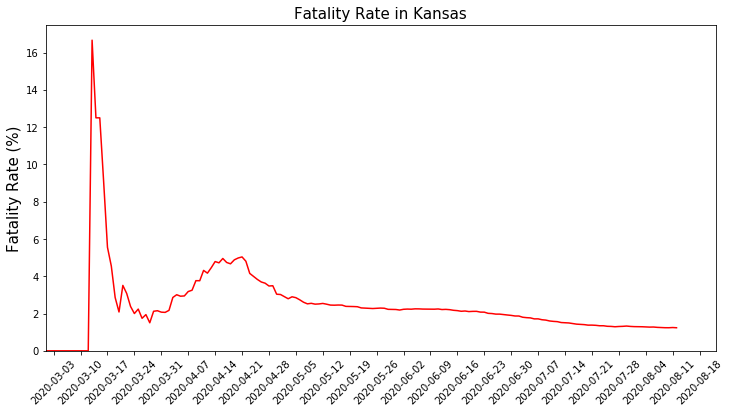

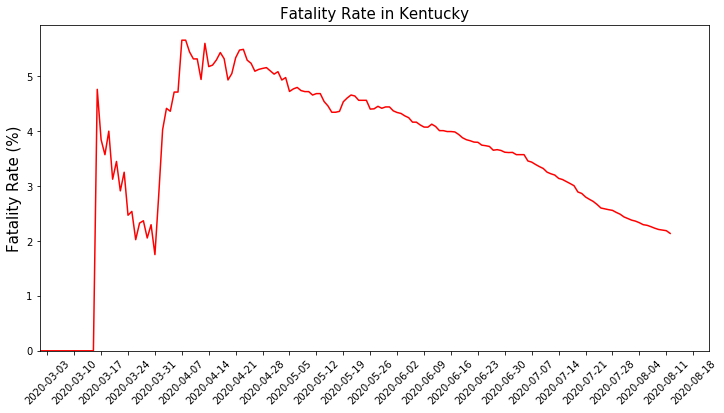

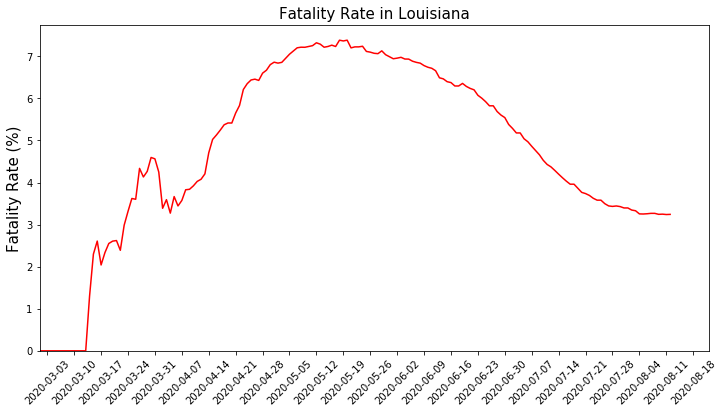

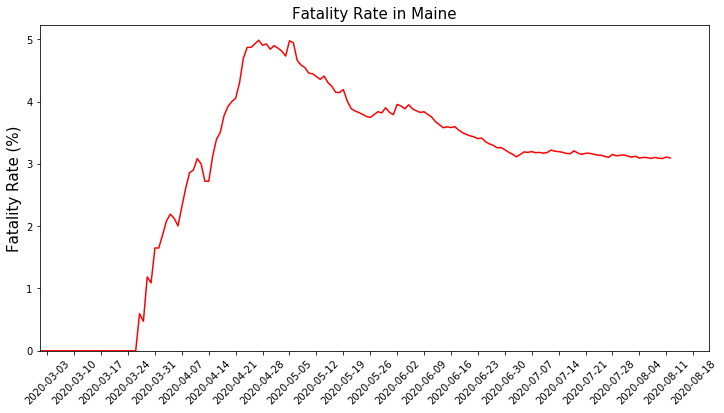

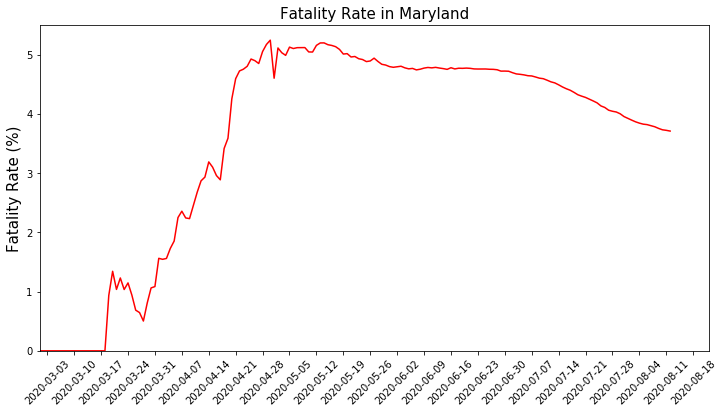

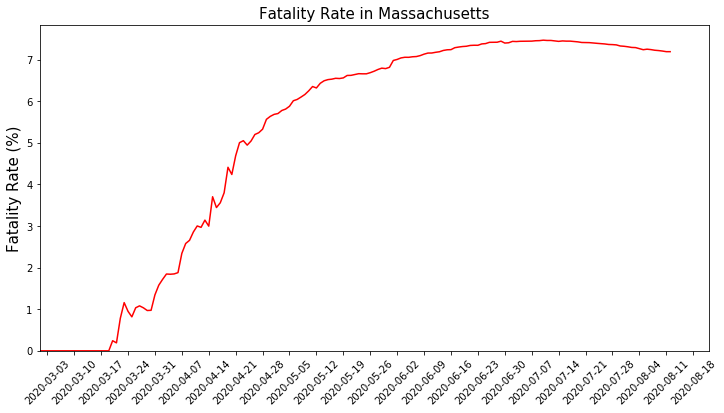

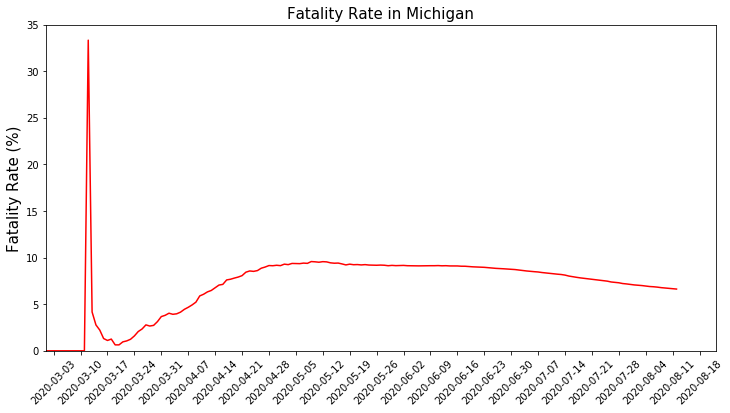

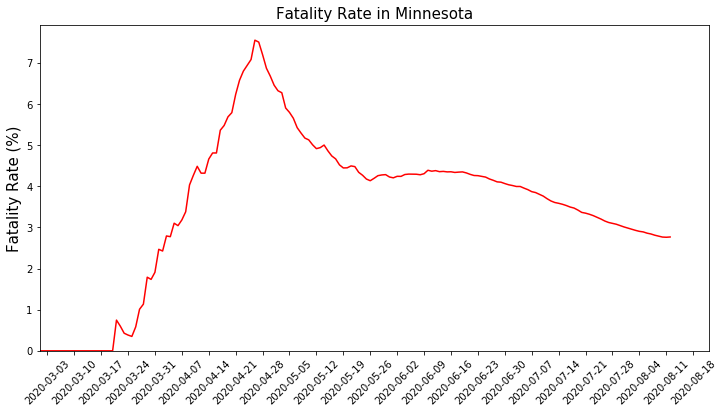

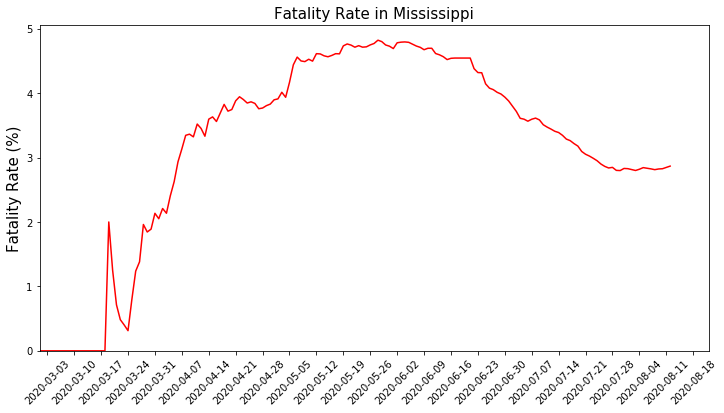

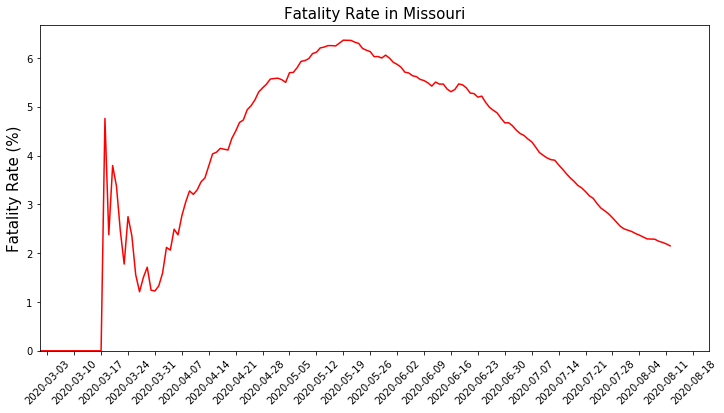

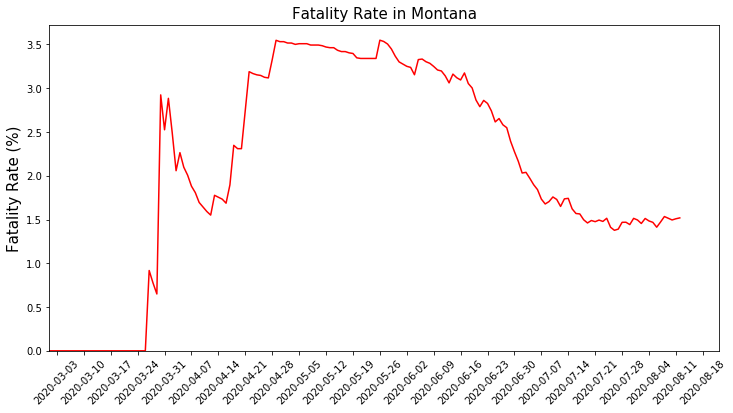

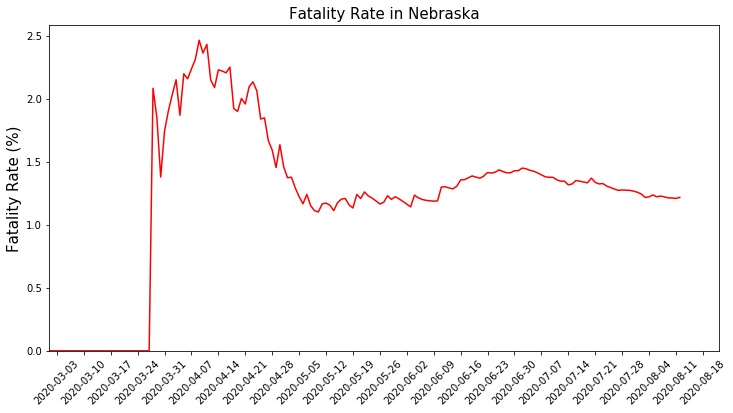

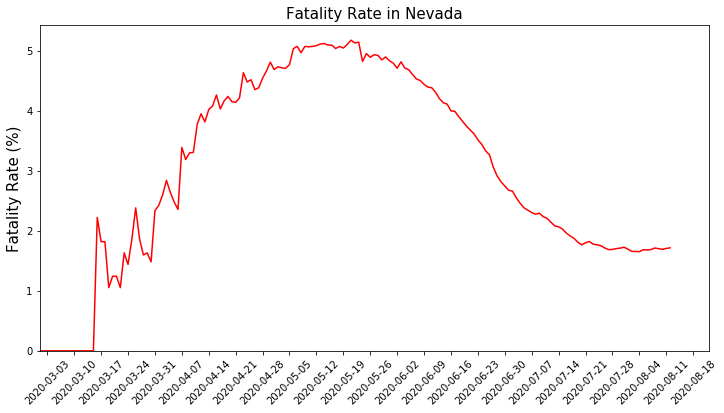

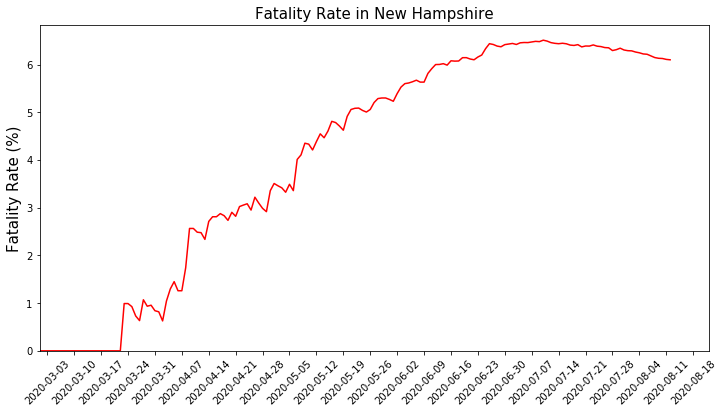

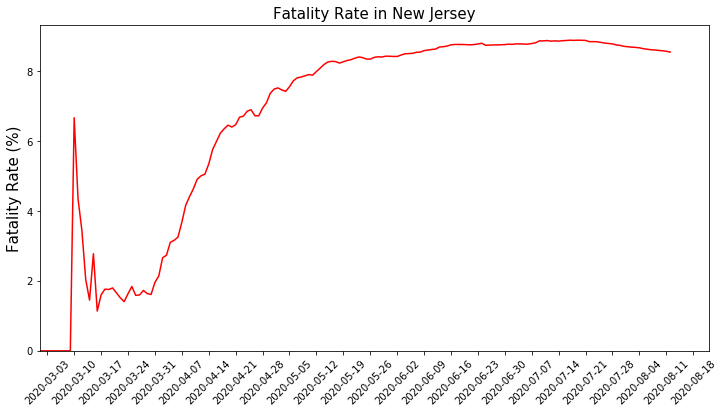

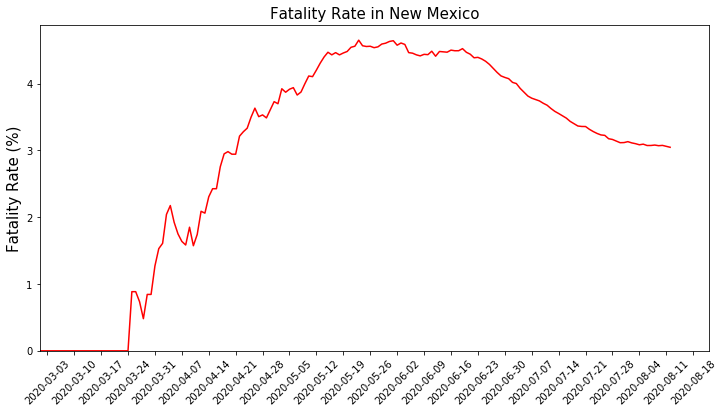

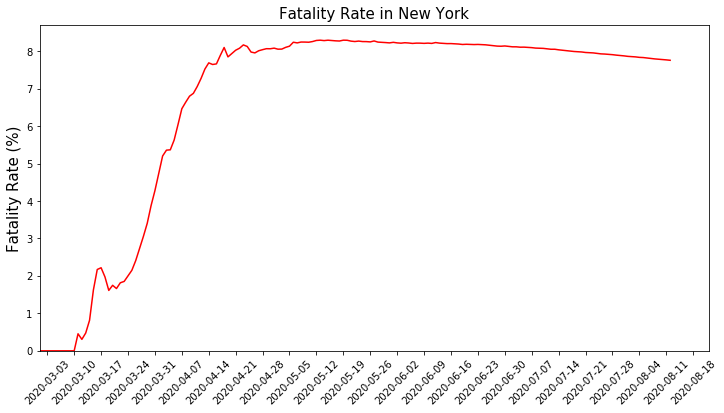

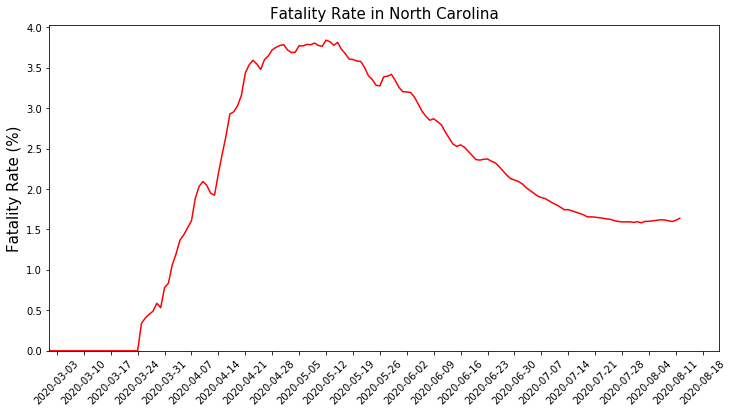

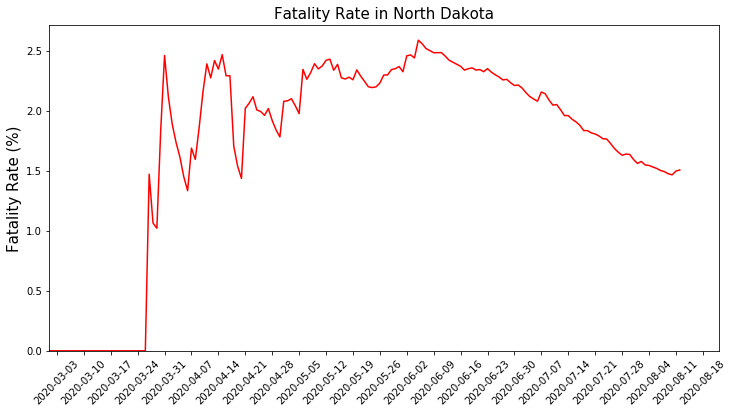

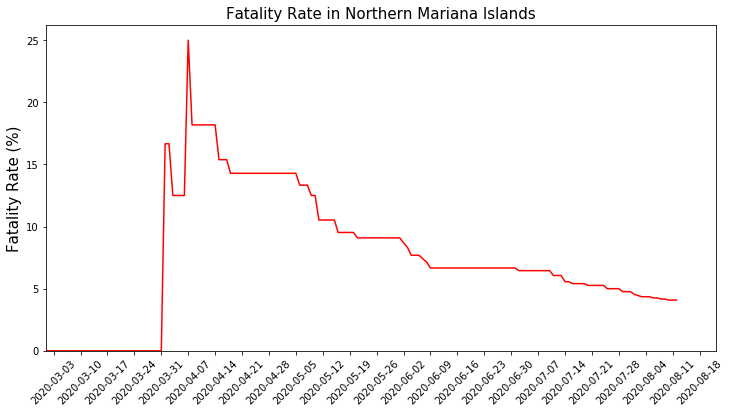

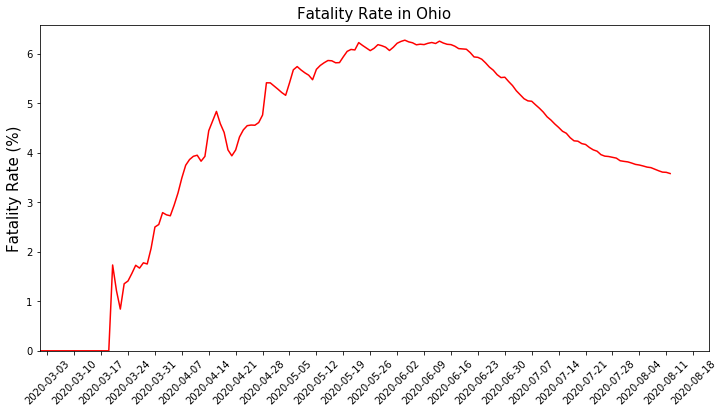

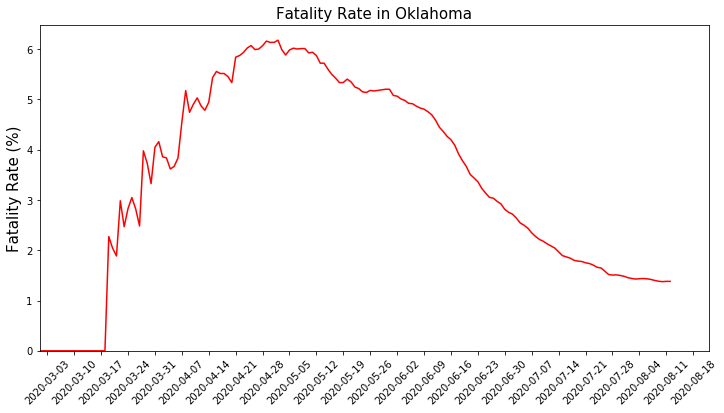

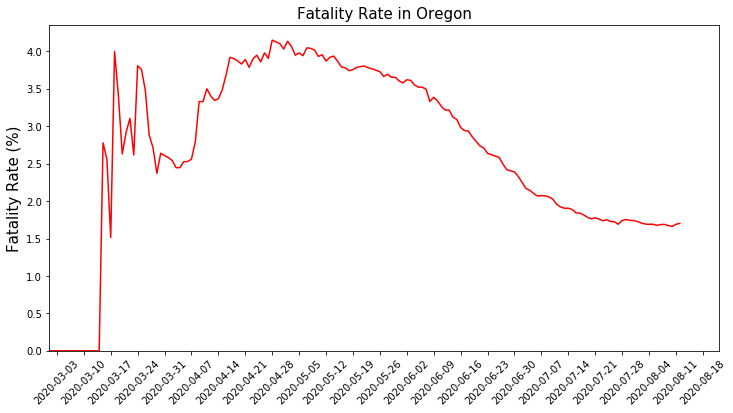

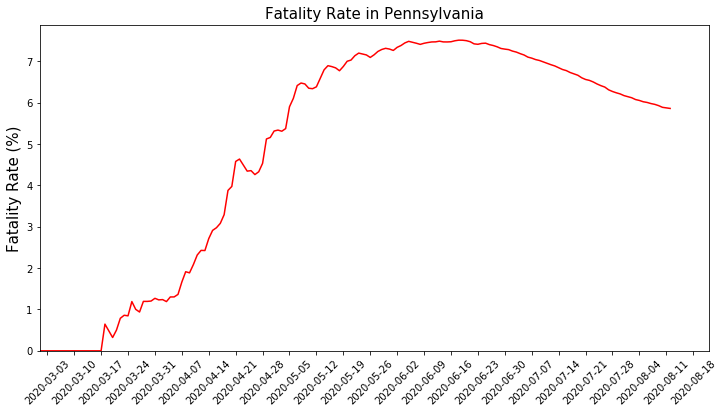

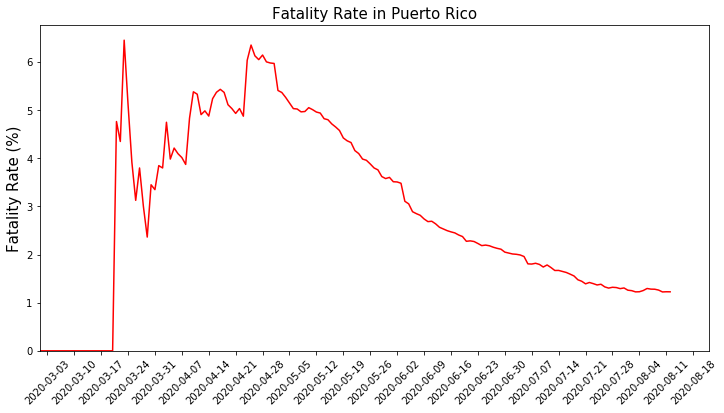

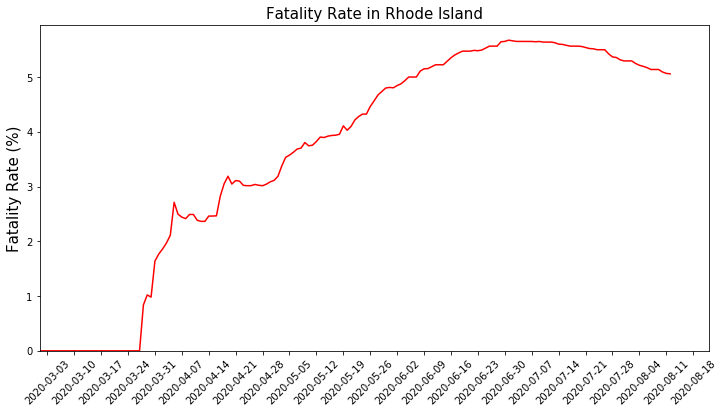

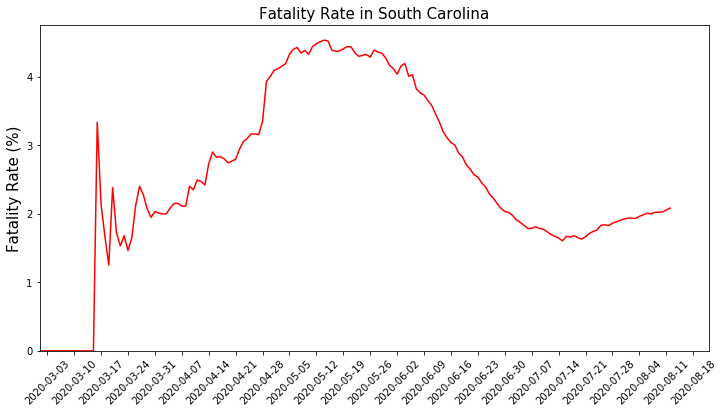

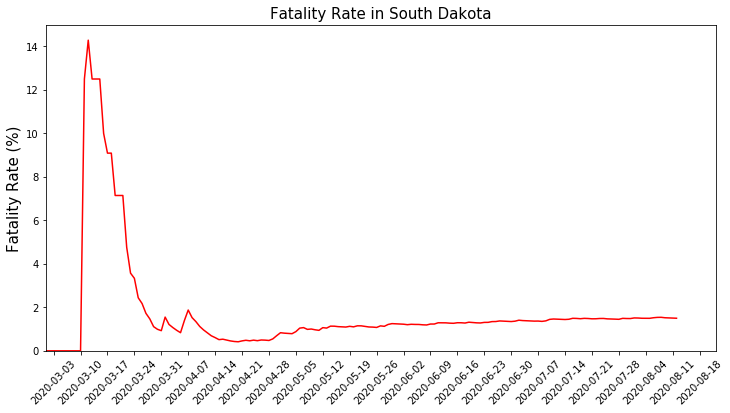

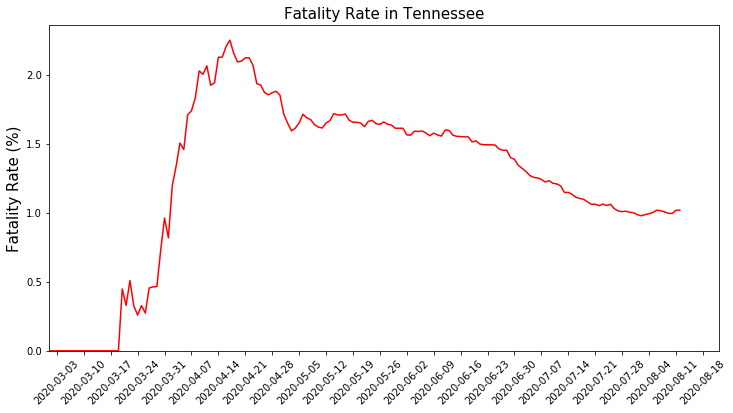

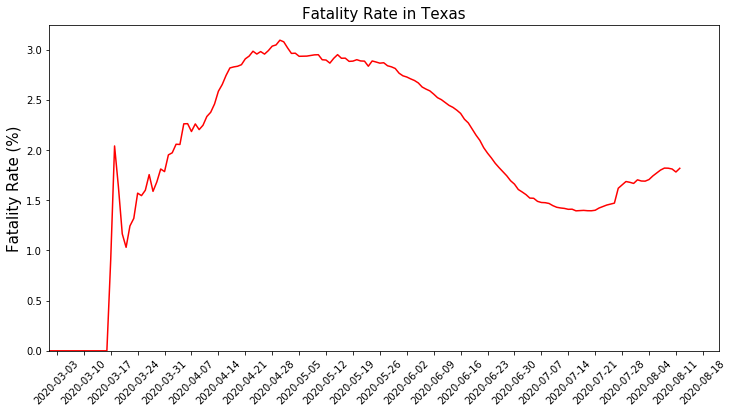

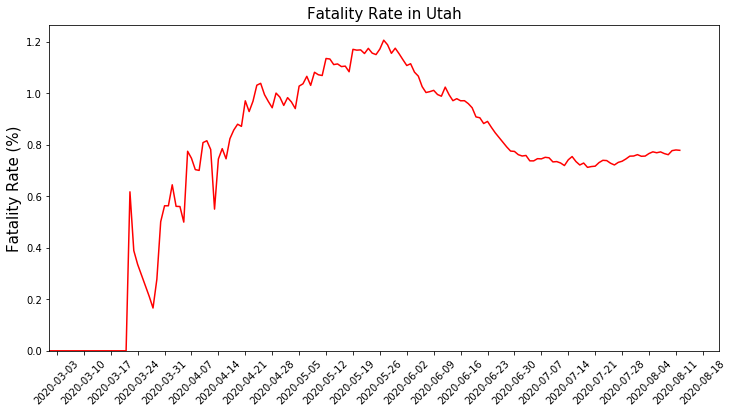

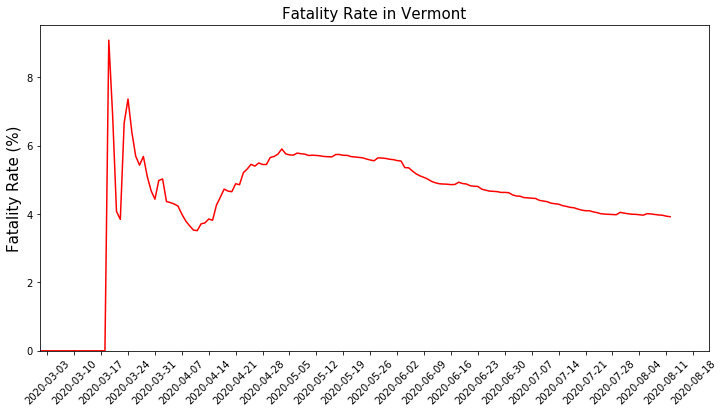

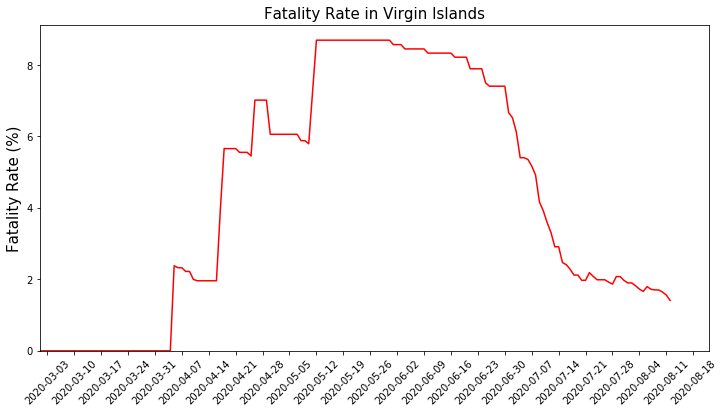

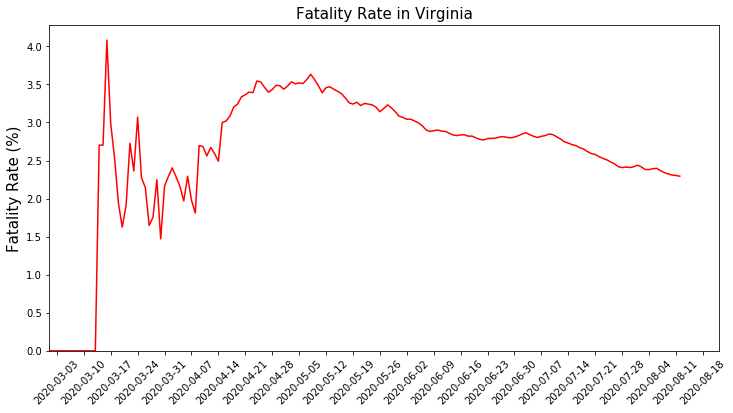

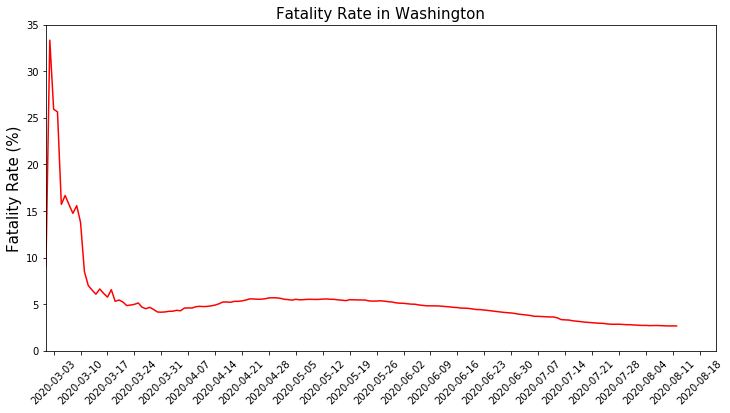

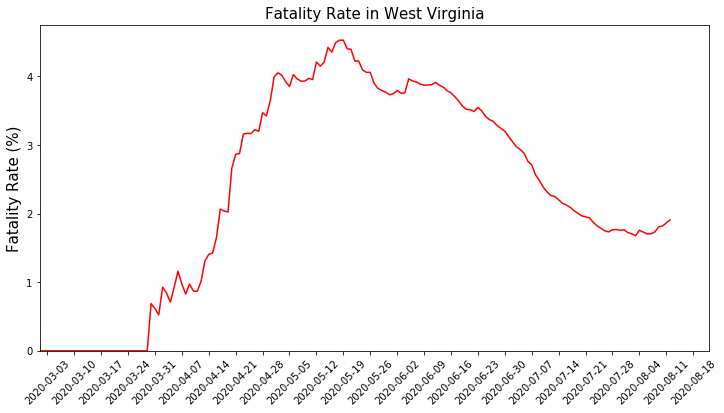

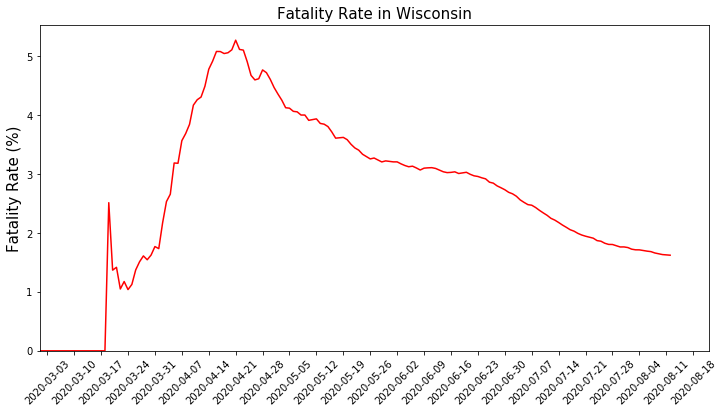

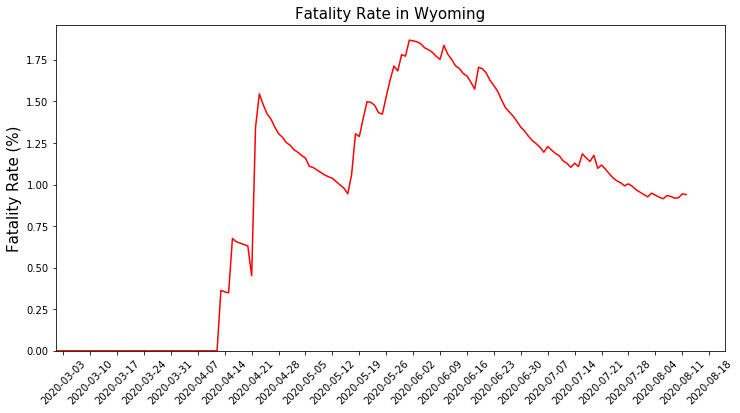

In [10]:
for state in states:
    fig,ax = plt.subplots(figsize = (12,6))
    ax.plot(data['%s' % state]['Date'], data['%s' % state]['Fatality'], 'r-')
    ax.tick_params(axis = 'x',labelrotation = 45)
    ax.set_xlim(datetime.date(2020, 3, 1))
    ax.set_ylim(0)
    ax.set_ylabel('Fatality Rate (%)', fontsize = 15)
    ax.set_title('Fatality Rate in %s' % state, fontsize = 15)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval = 1));